In [1]:
# import libraries
import numpy as np
import pandas as pd
import h5py
import json
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import compress
import os
from datetime import datetime
from calfews_src import *
from calfews_src.util import get_results_sensitivity_number_outside_model
from calfews_src.visualizer import Visualizer


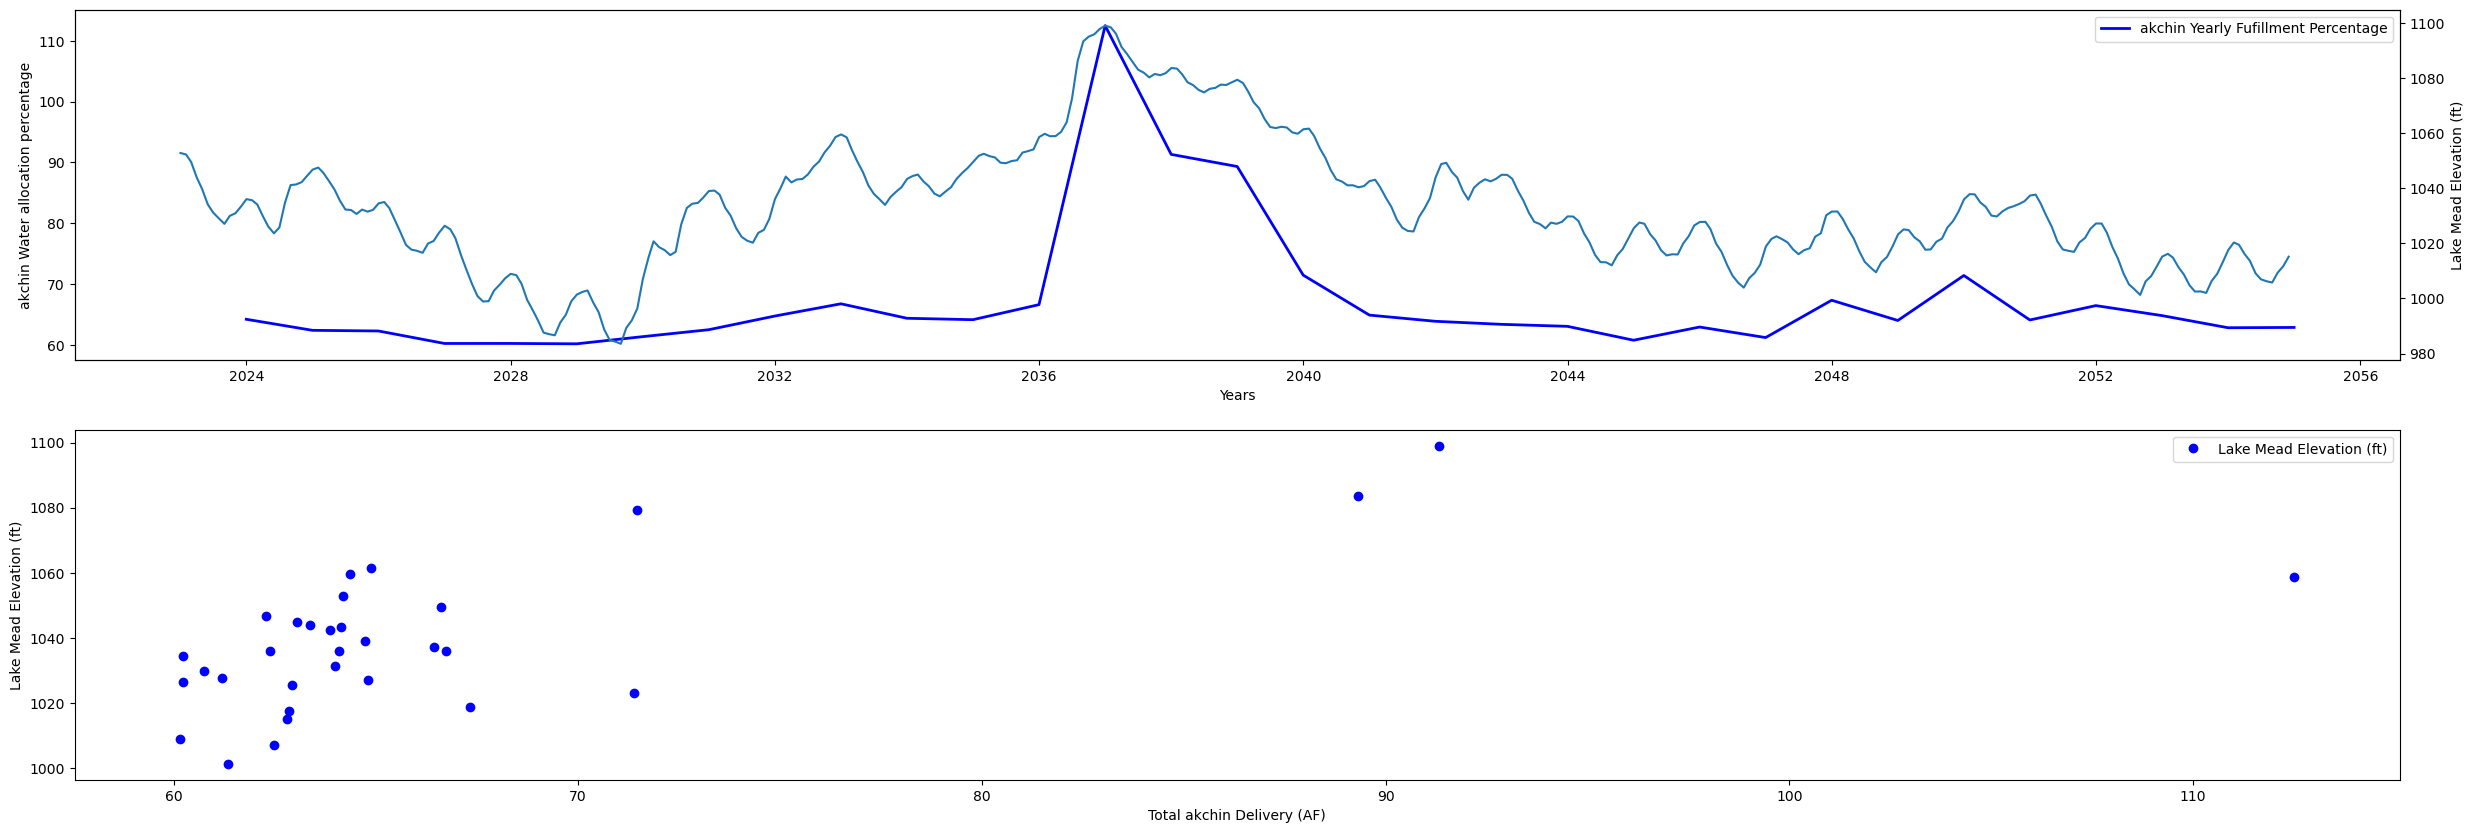

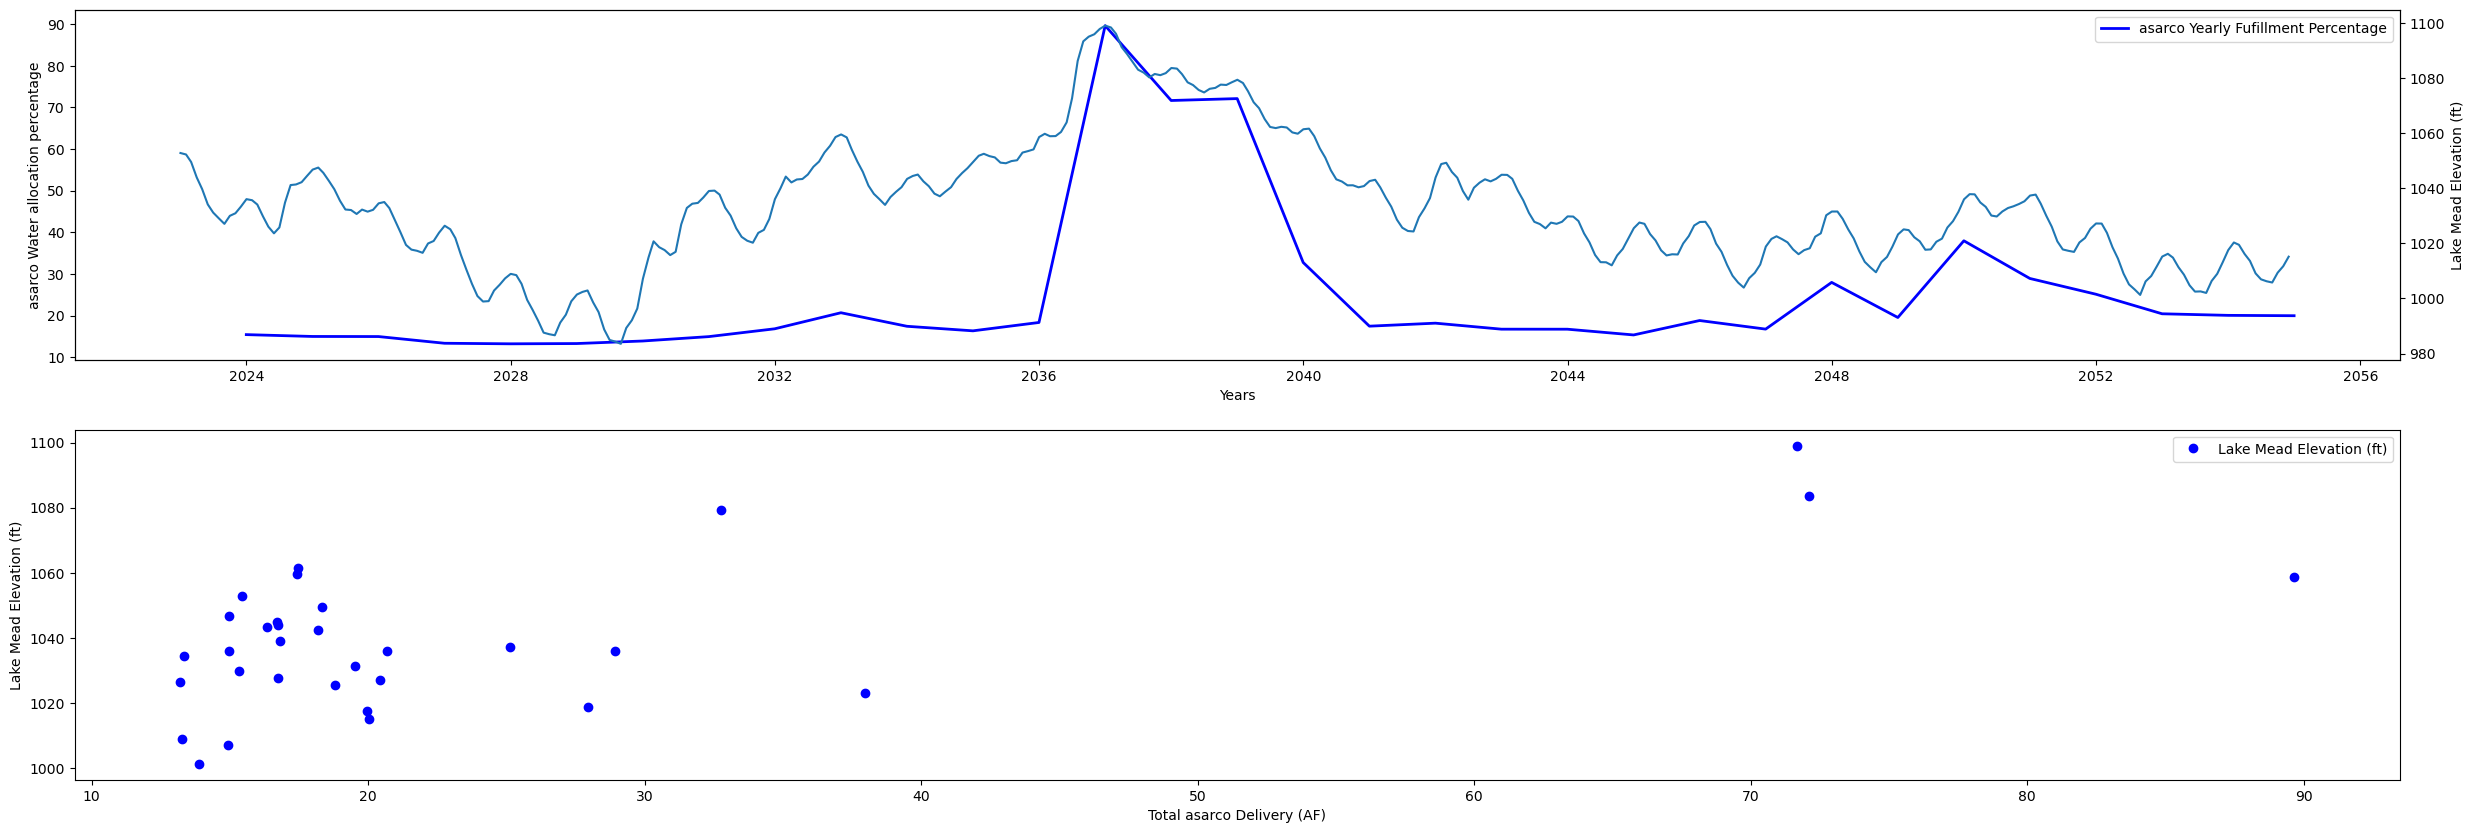

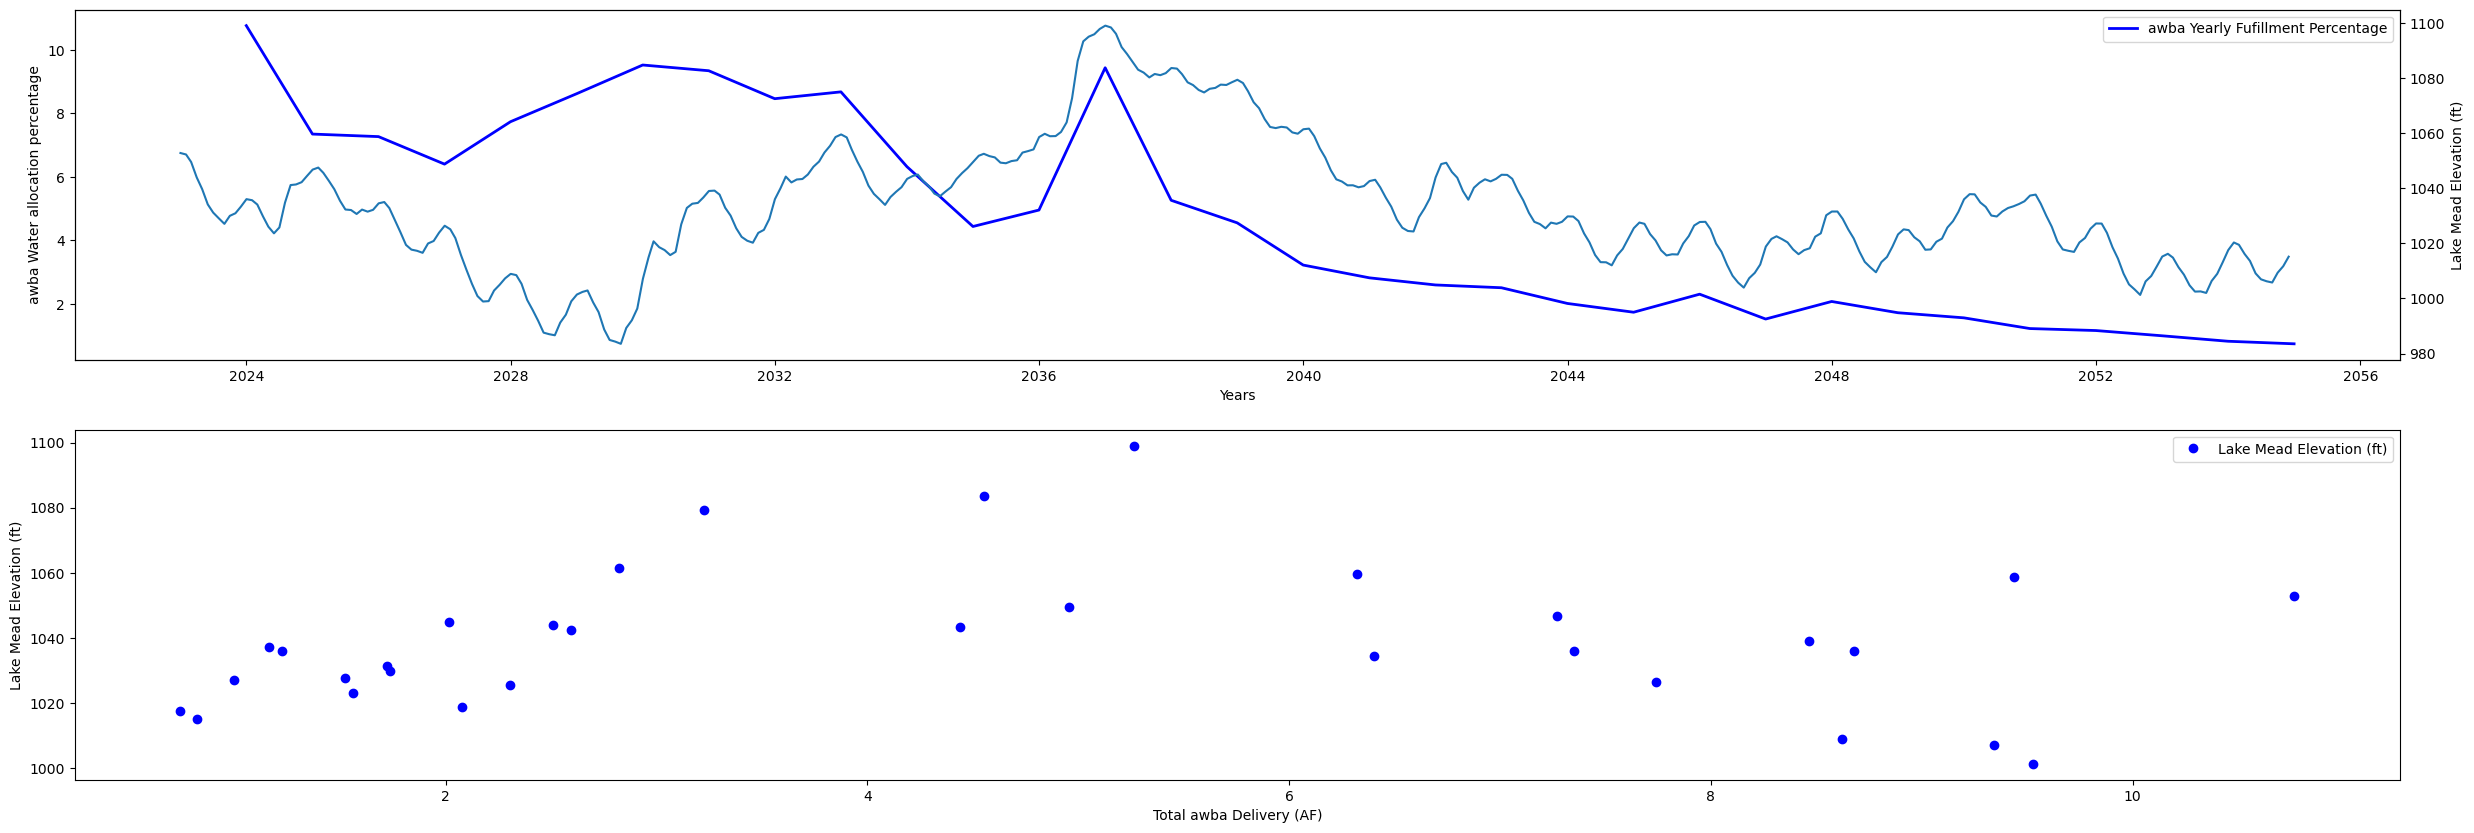

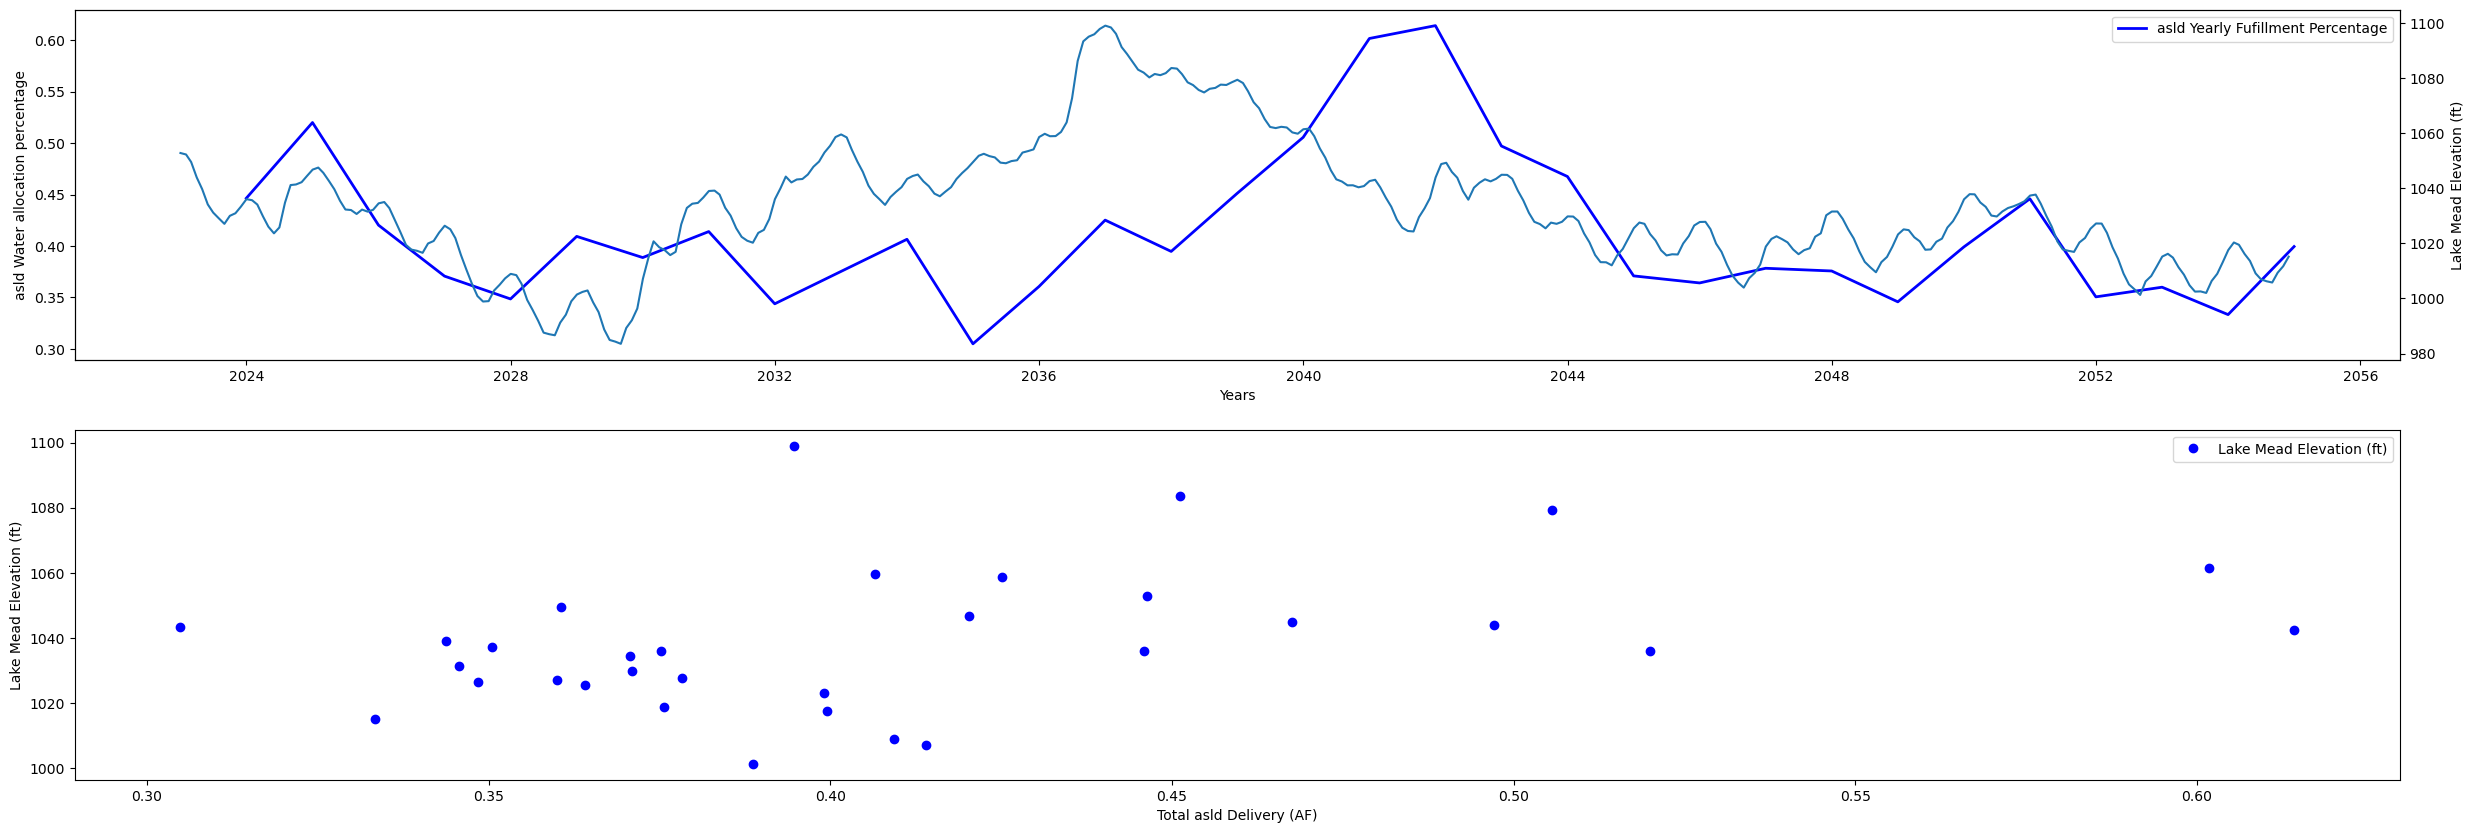

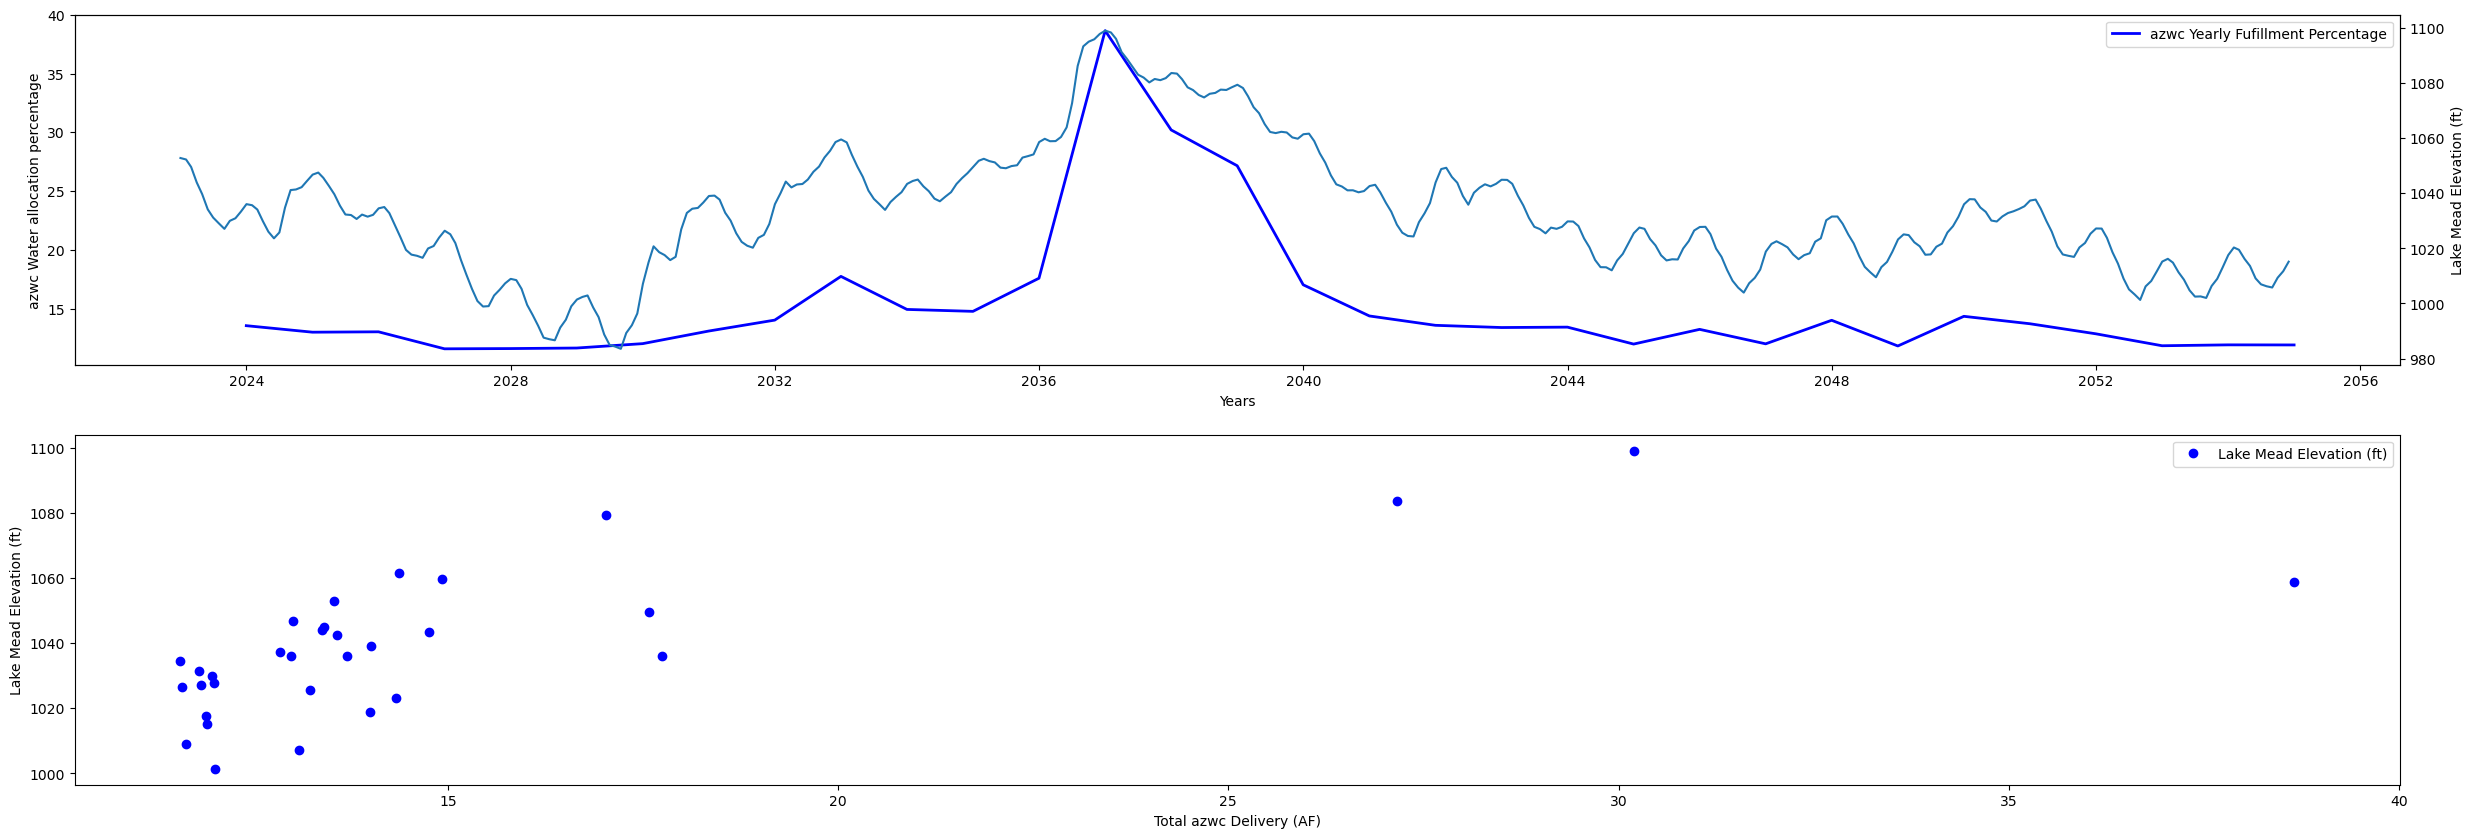

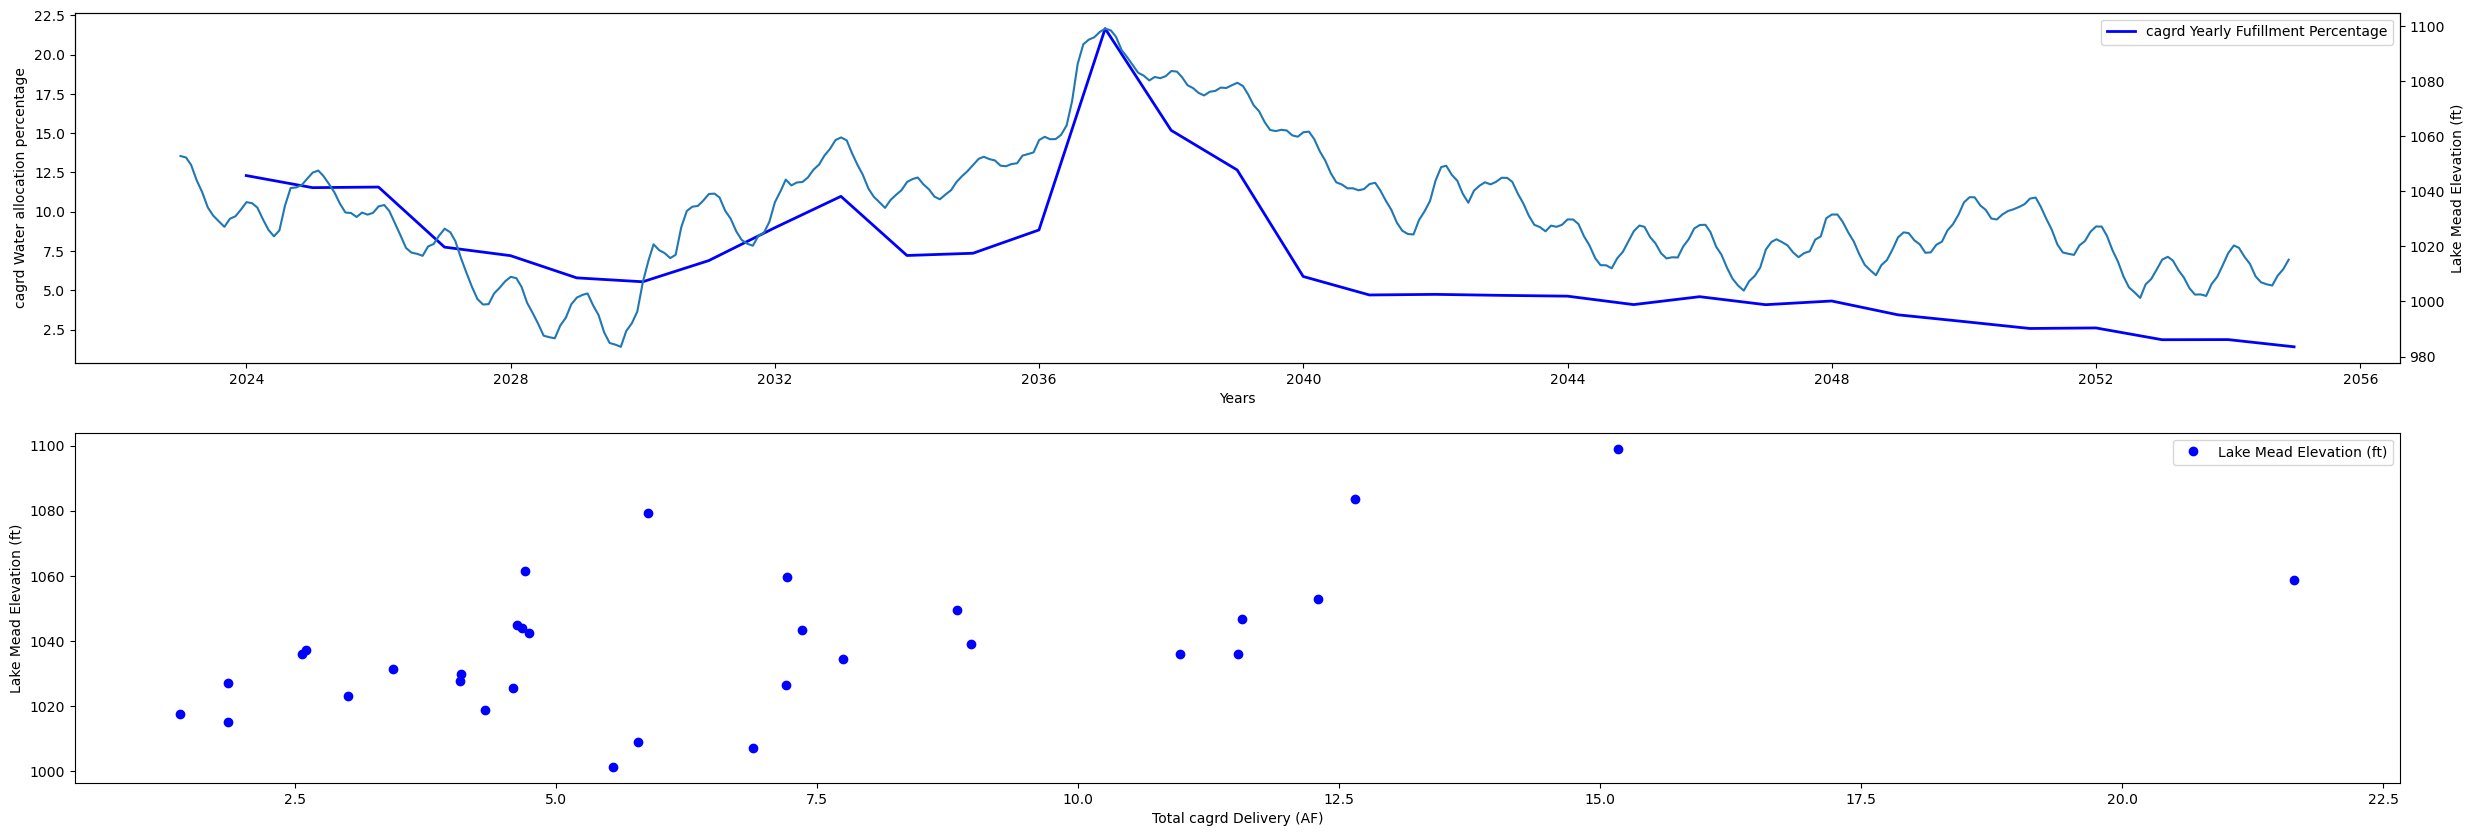

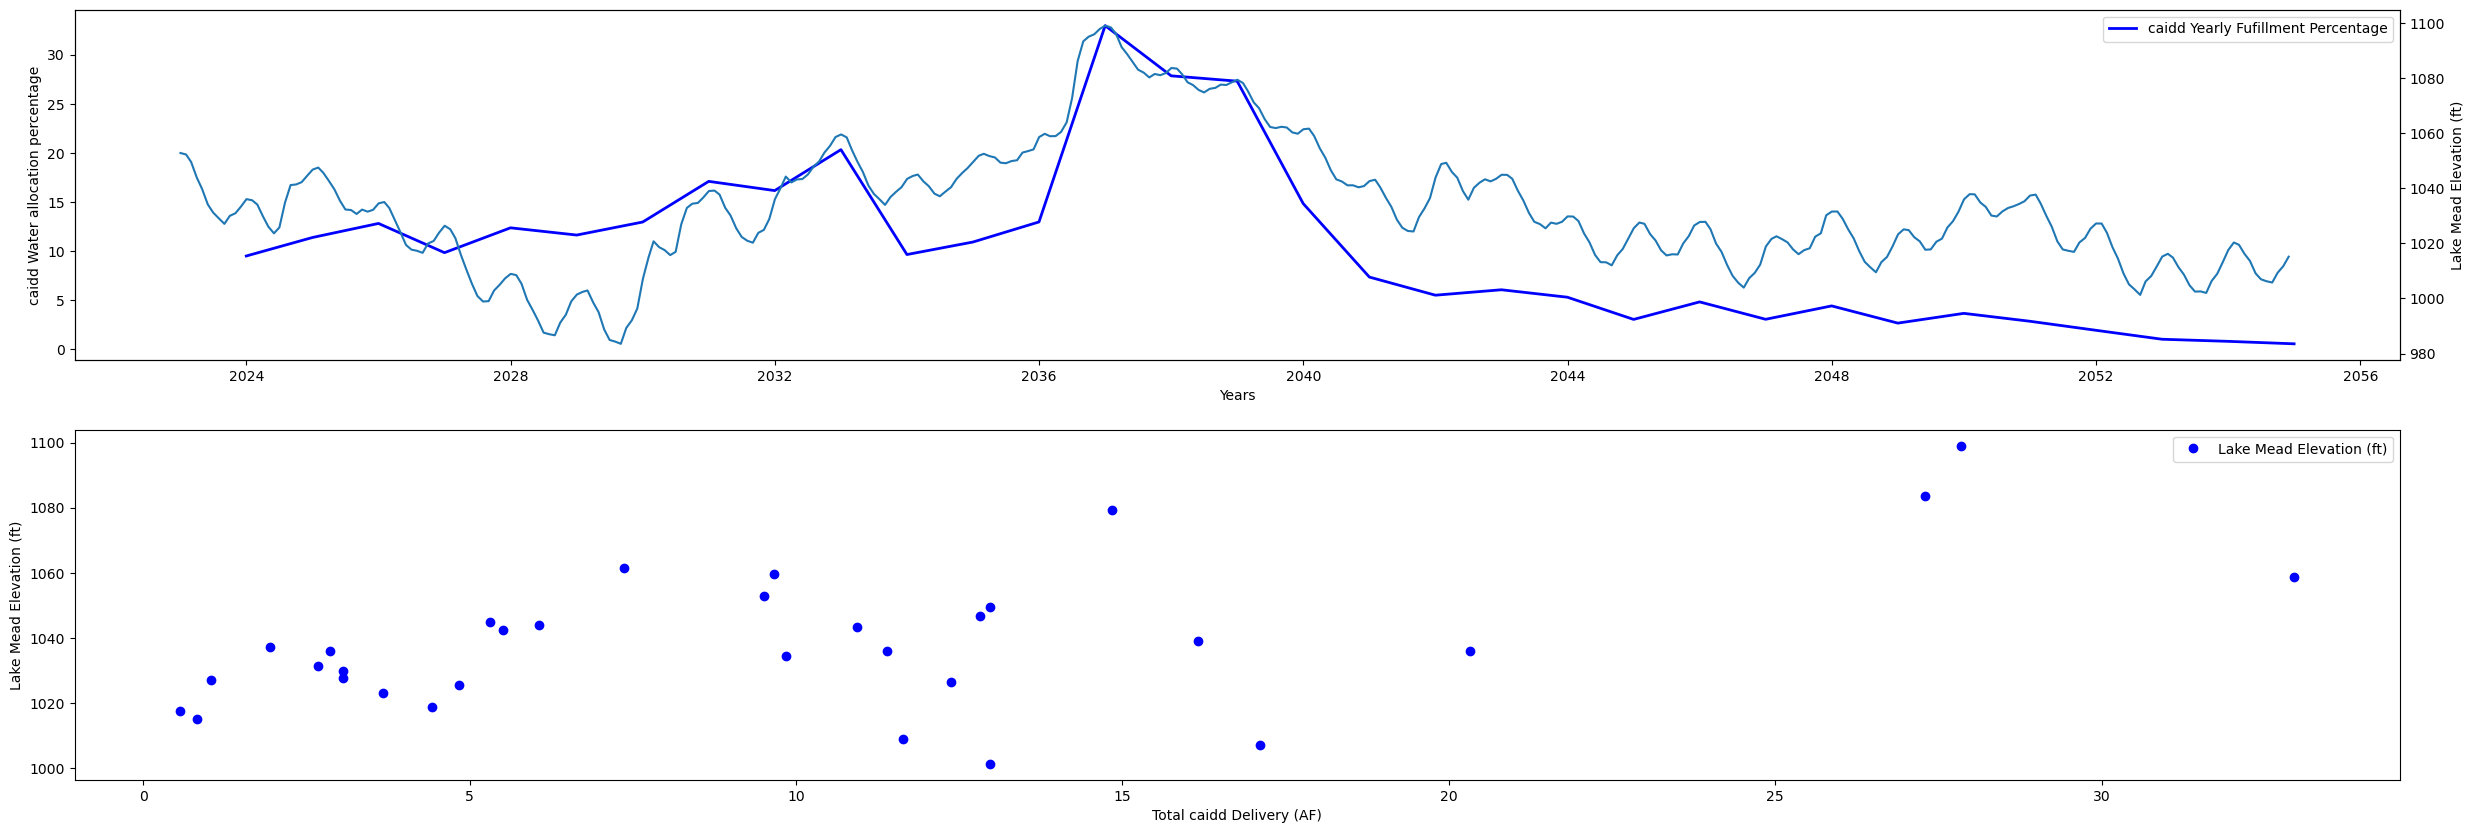

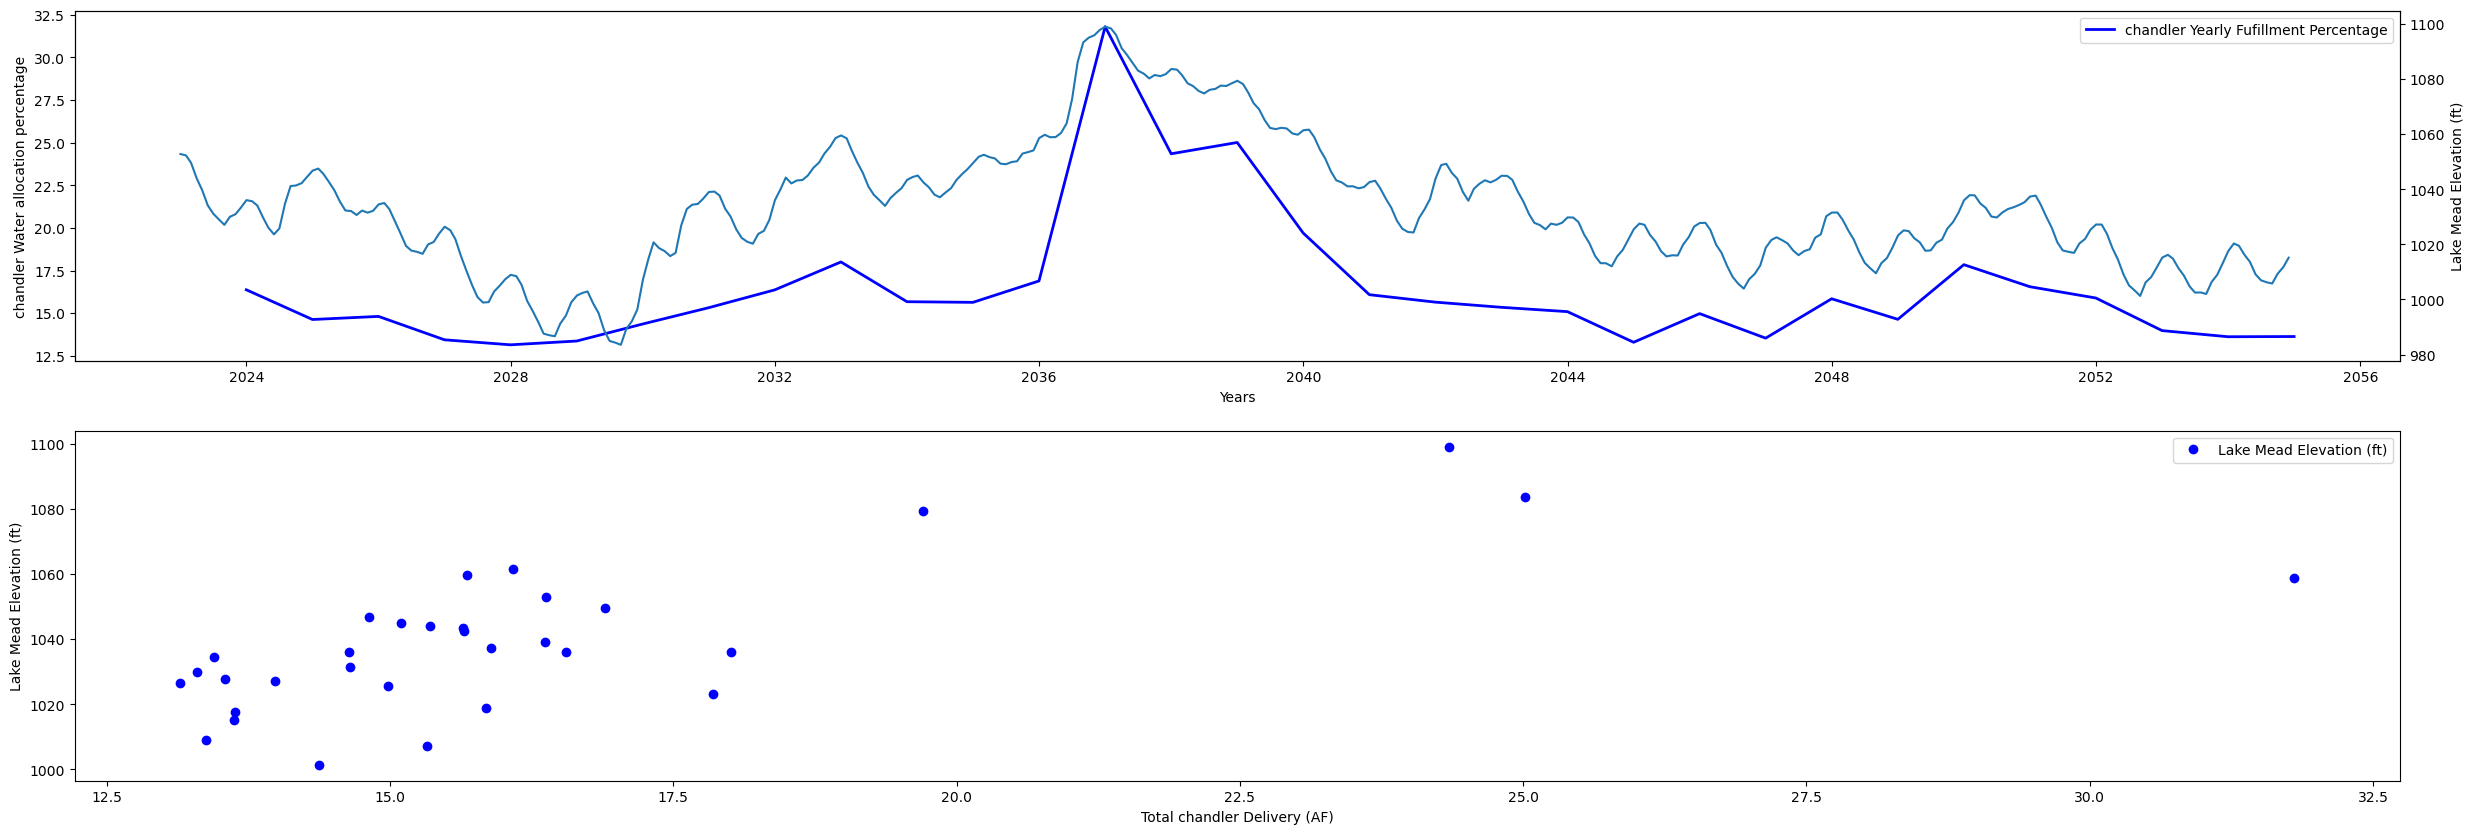

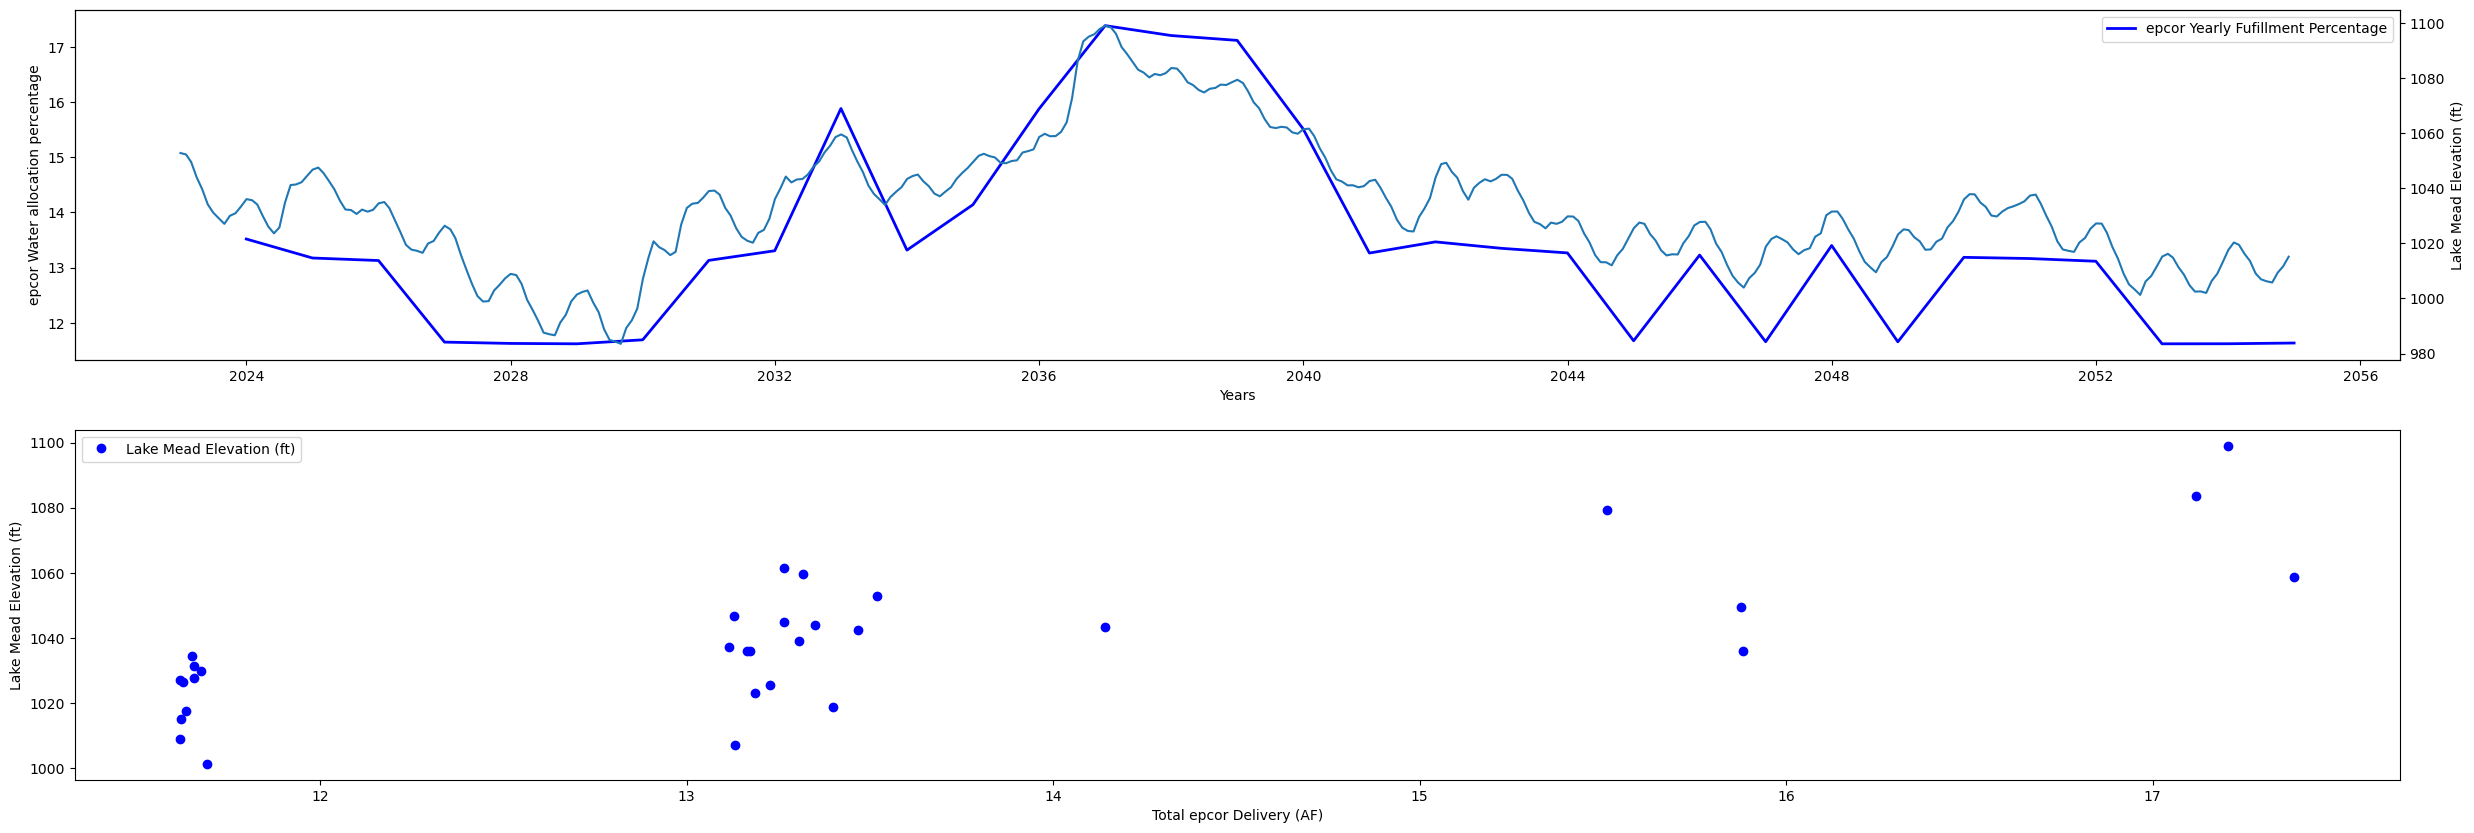

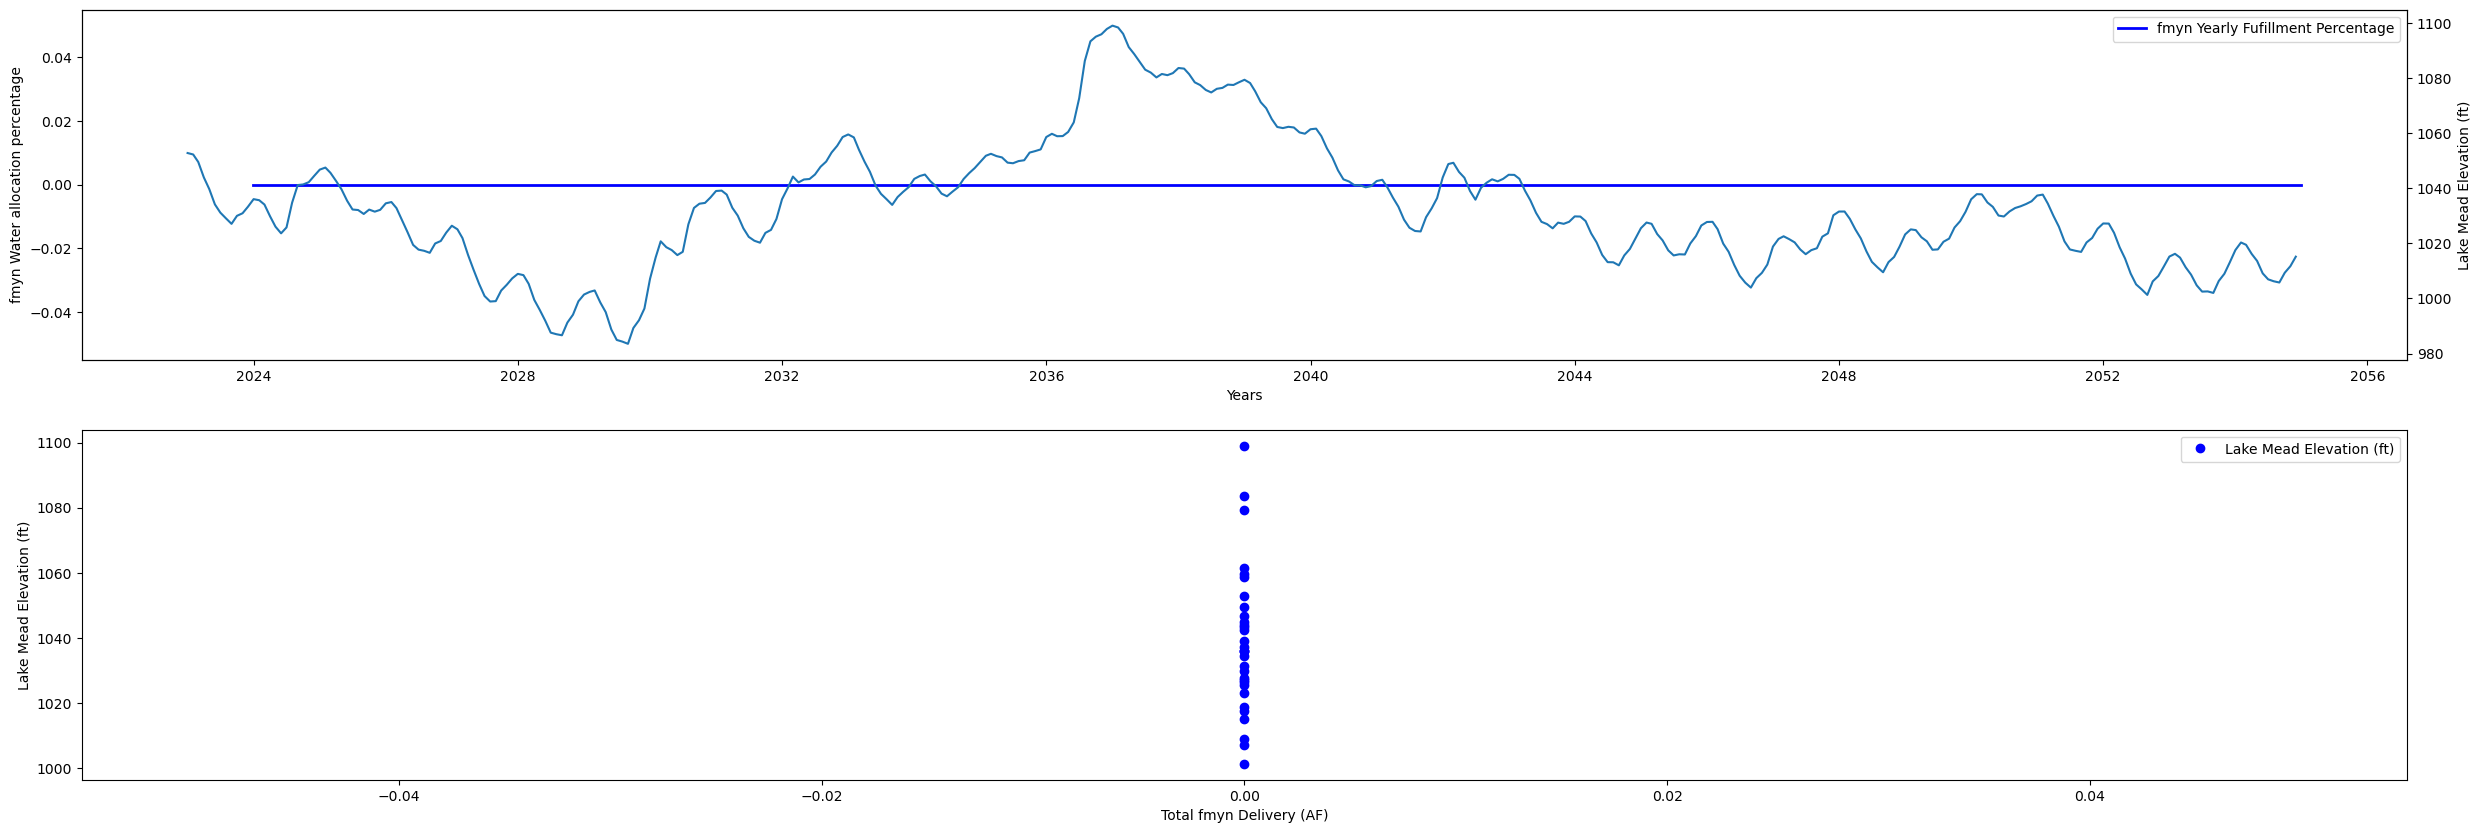

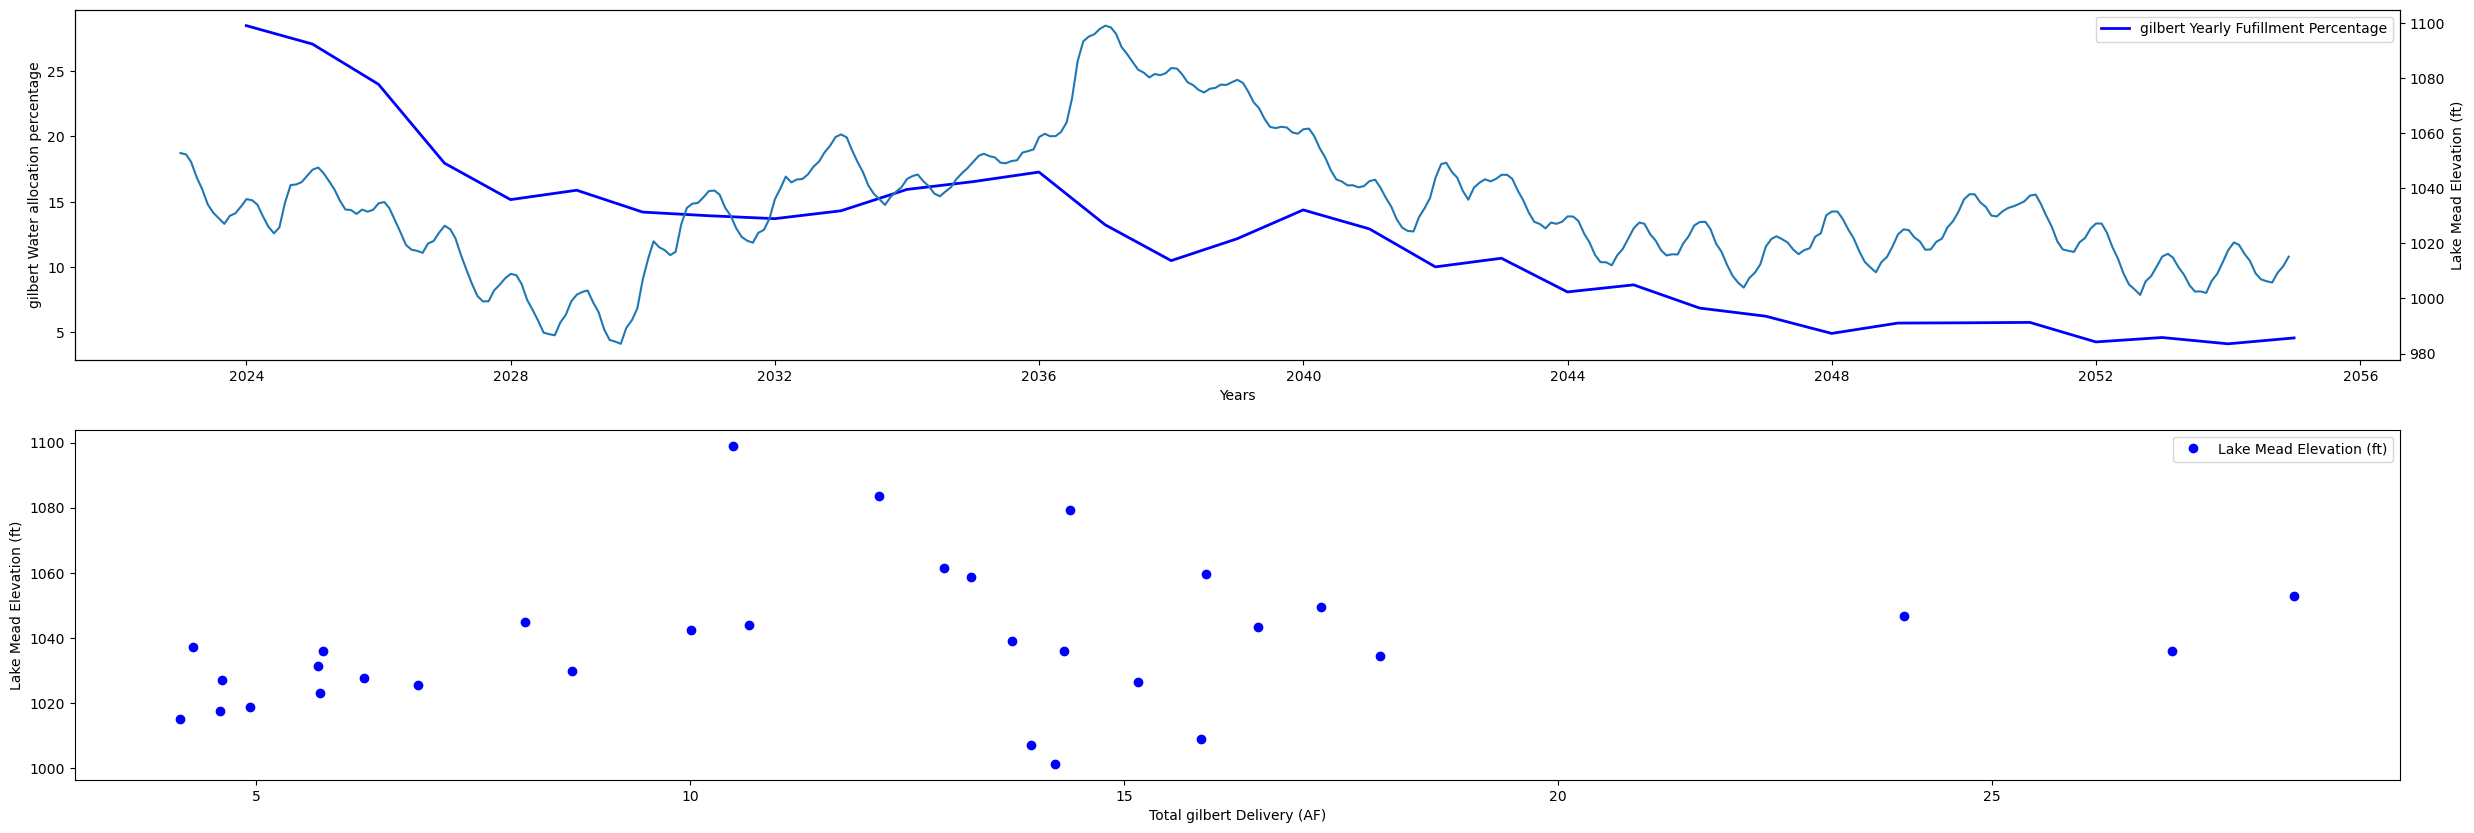

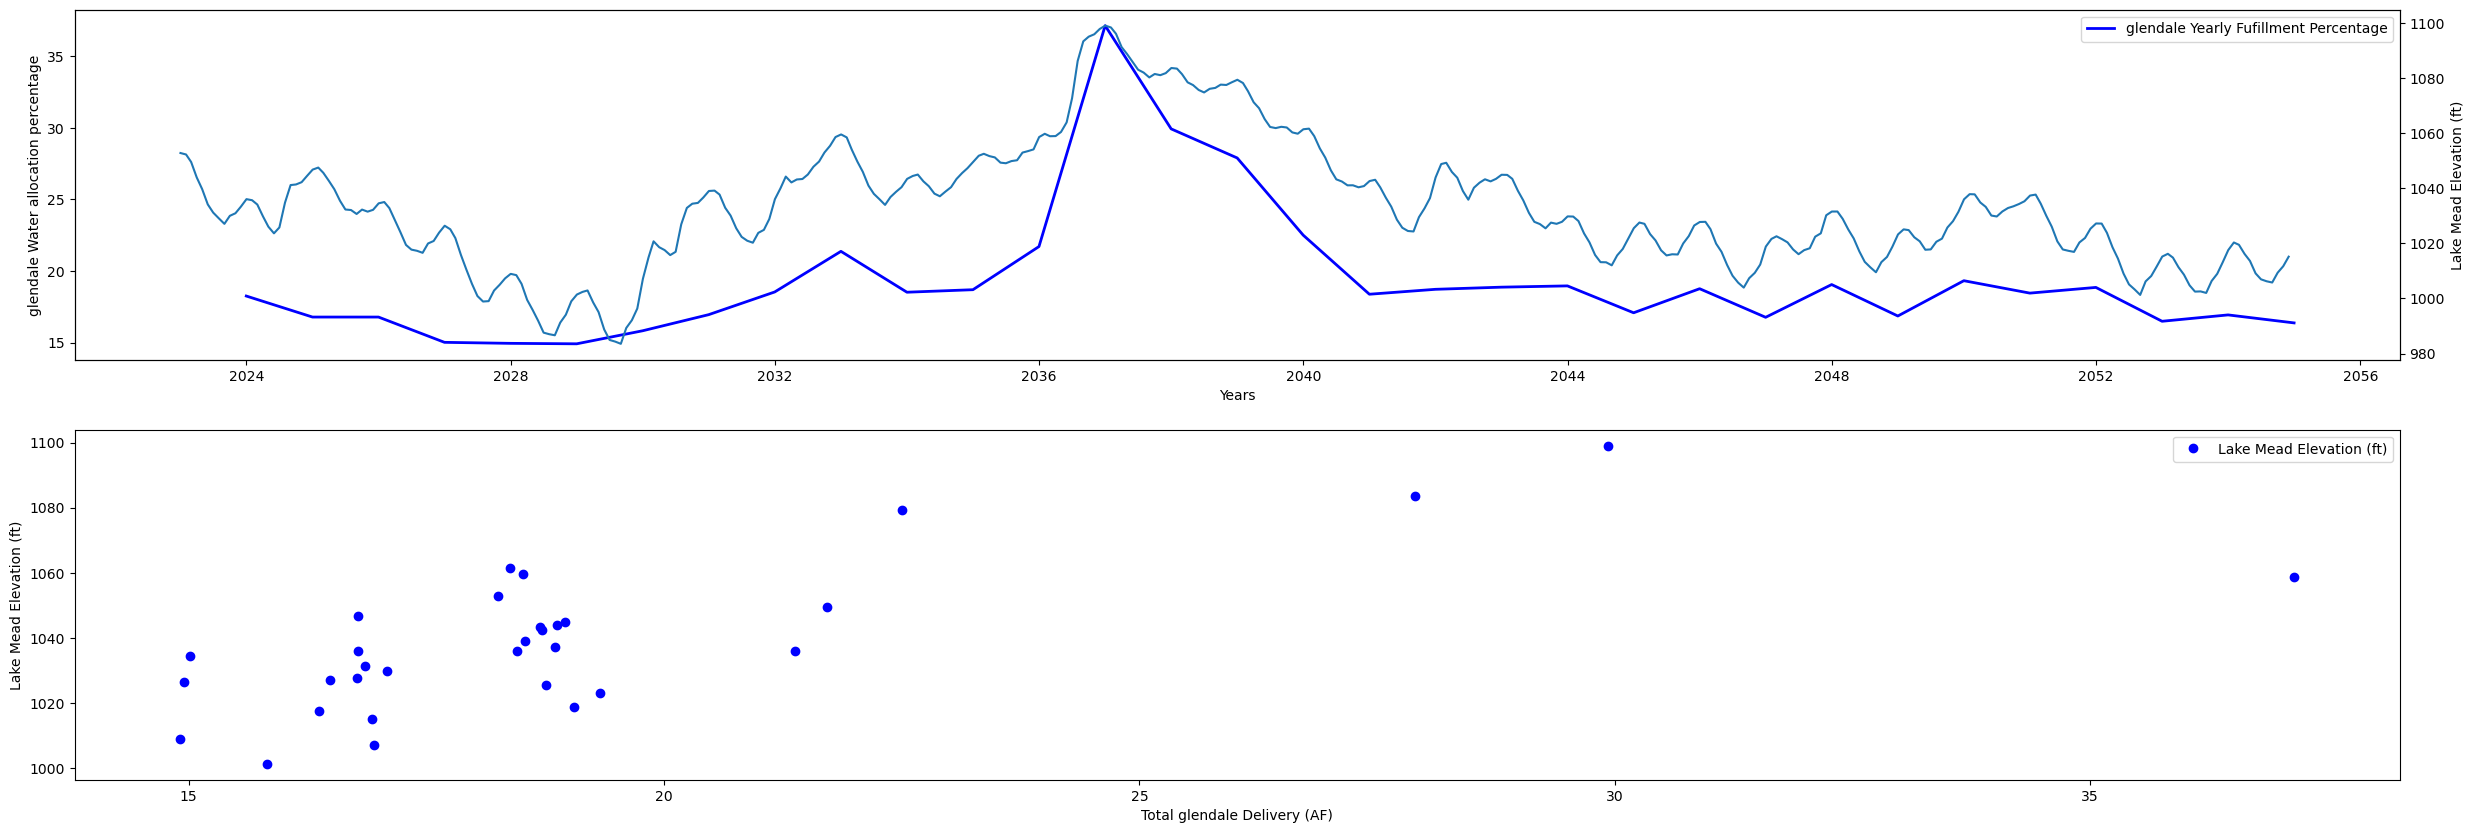

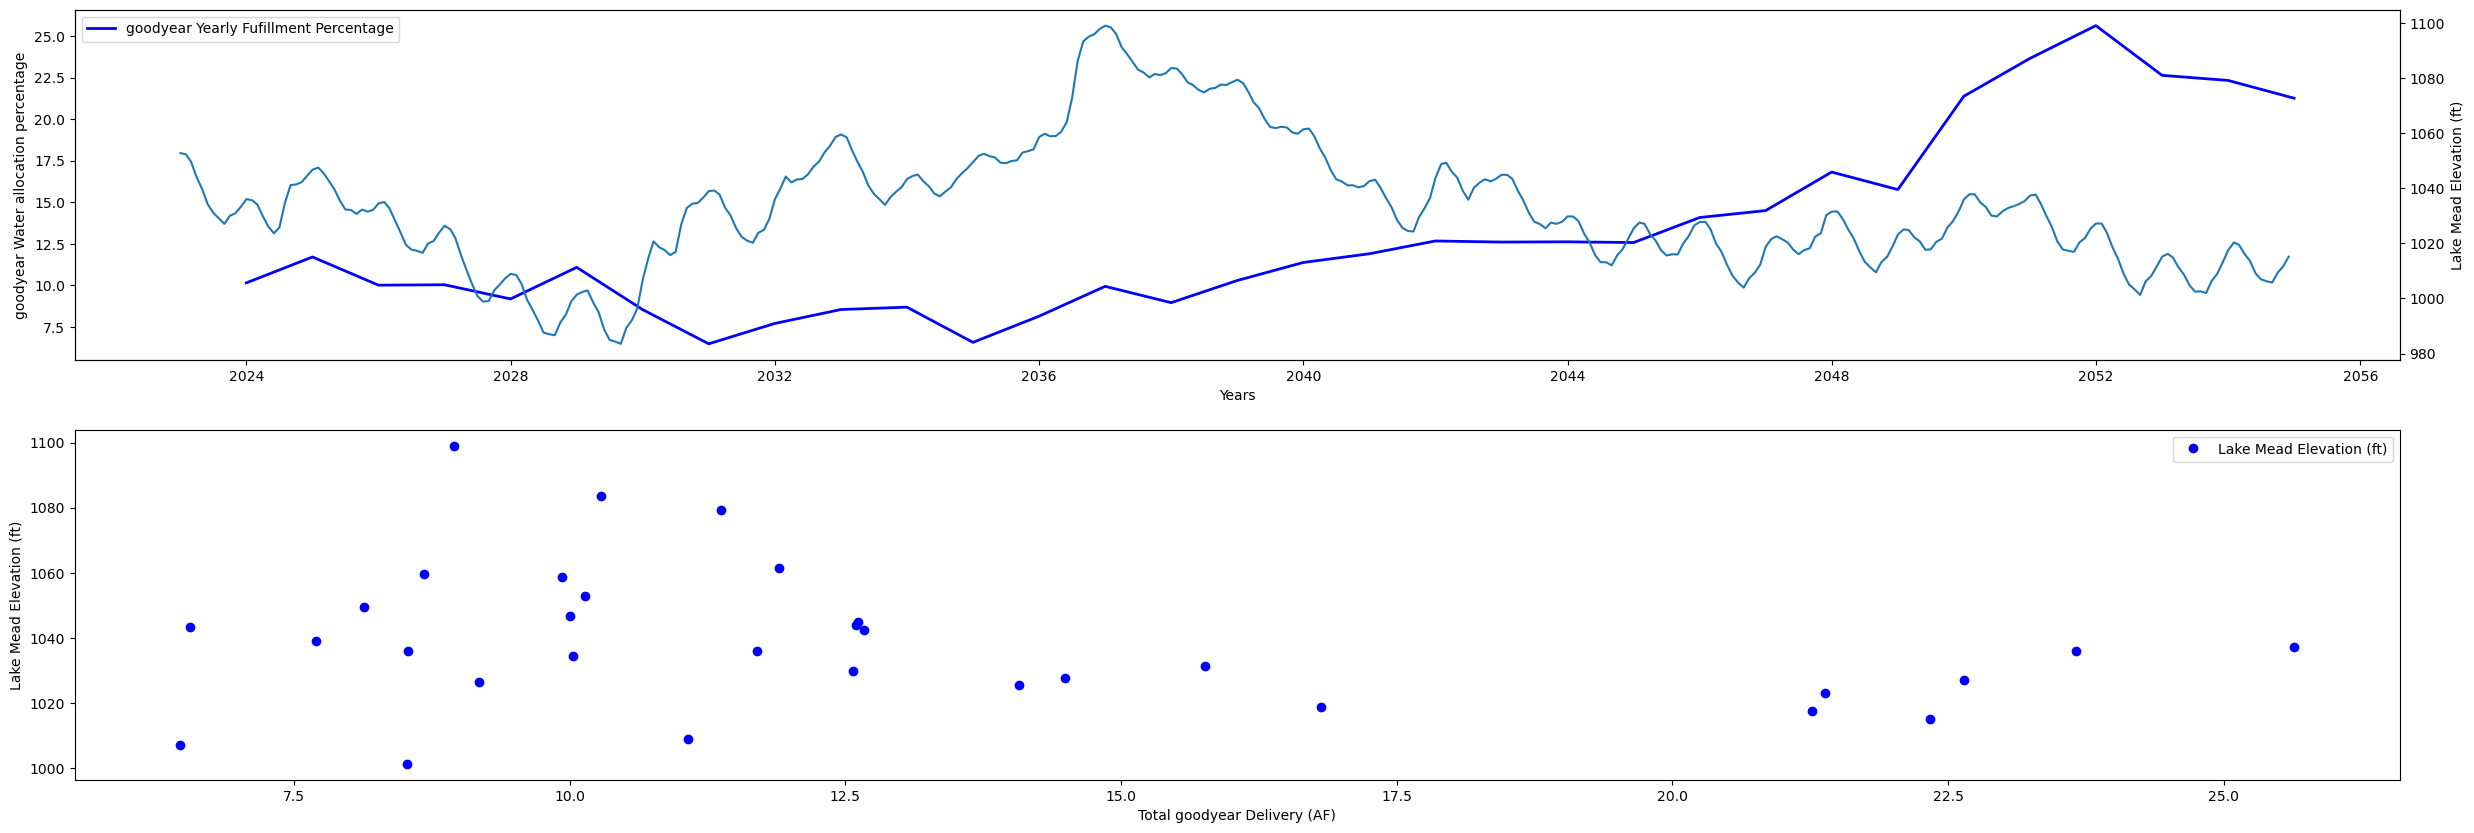

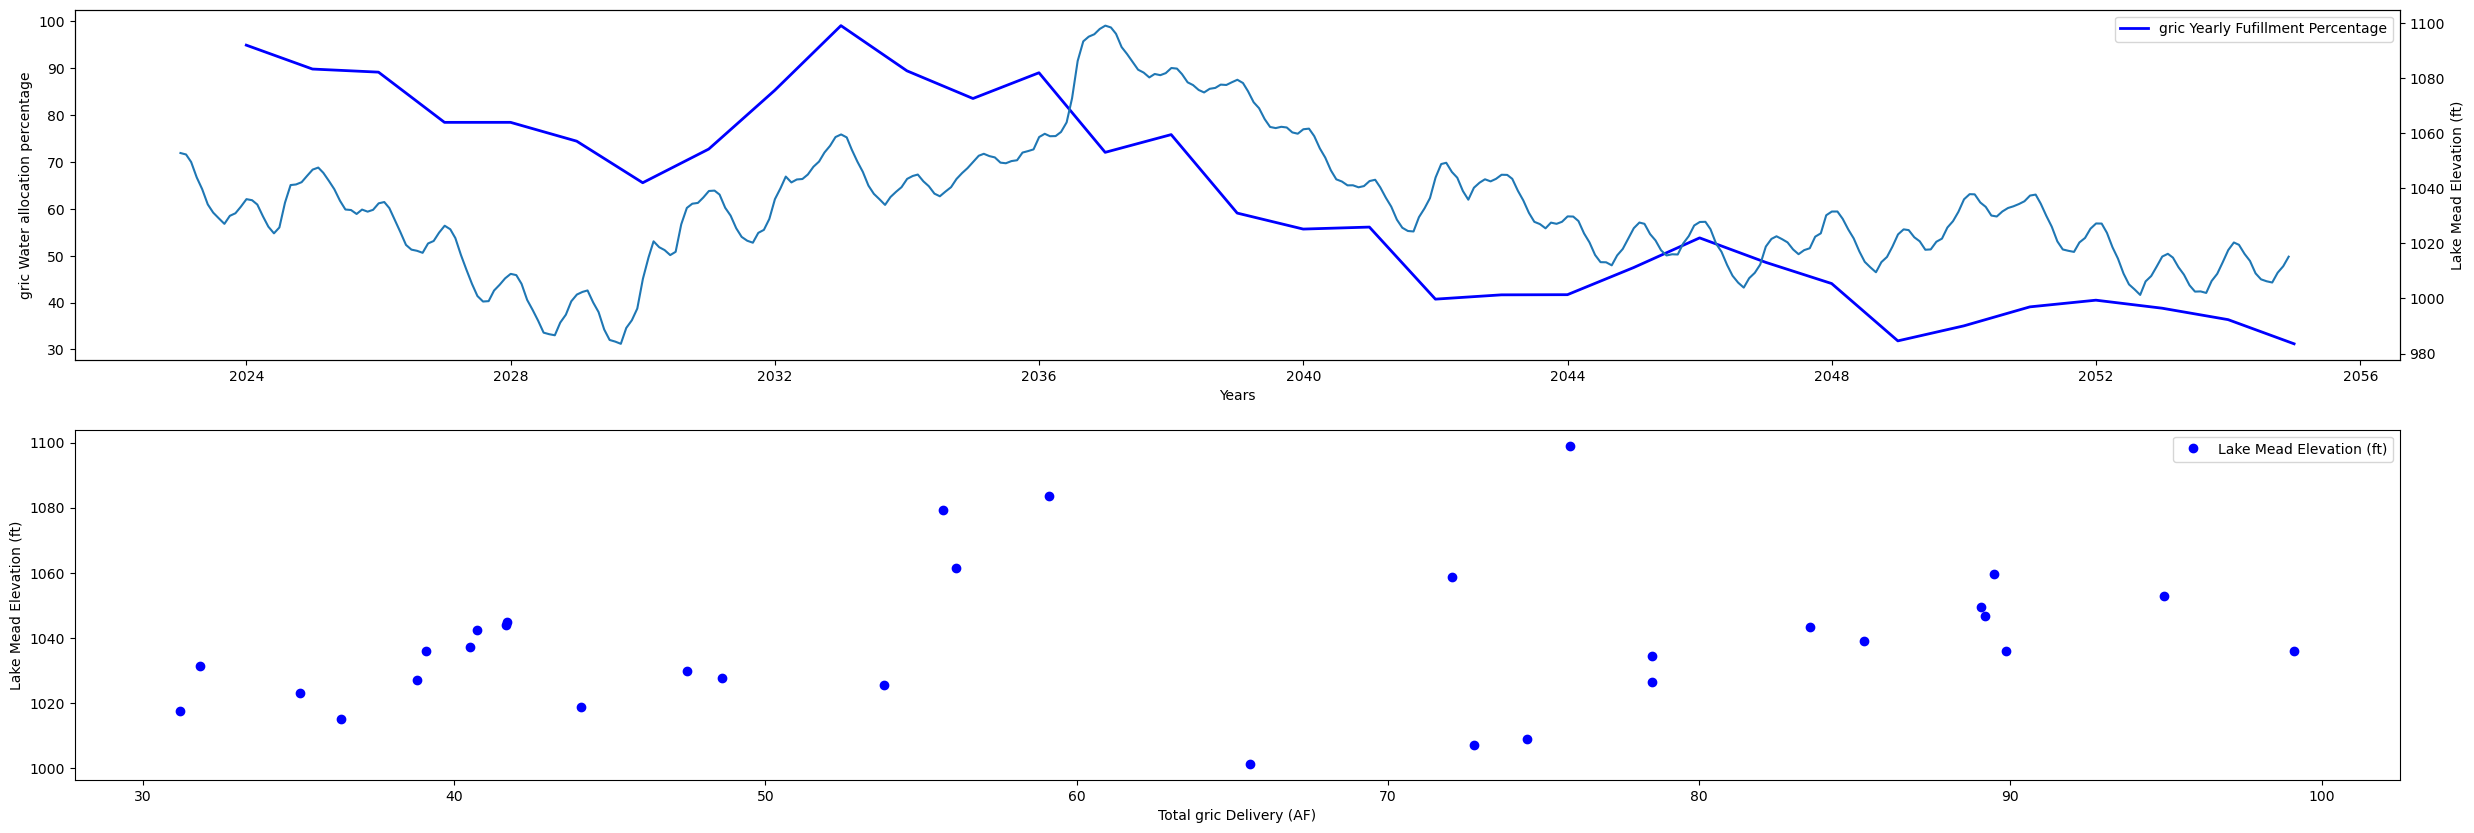

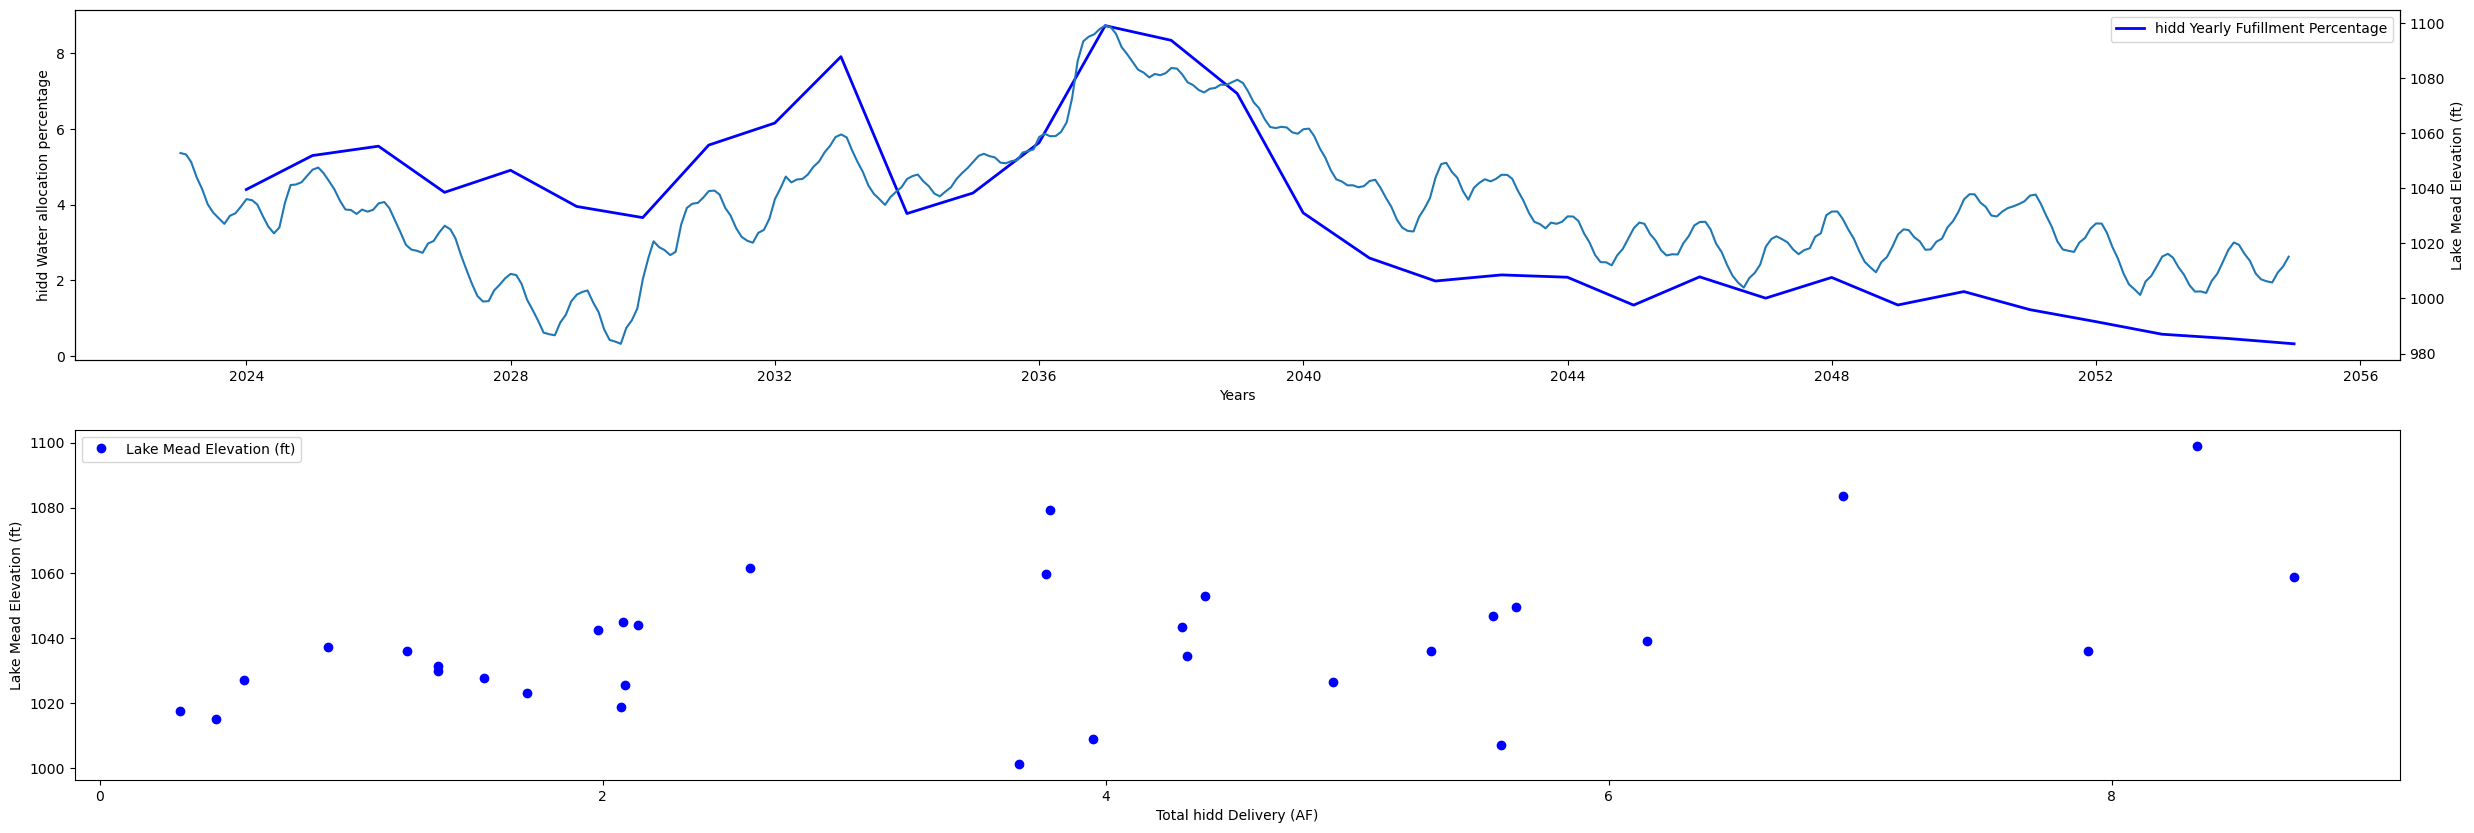

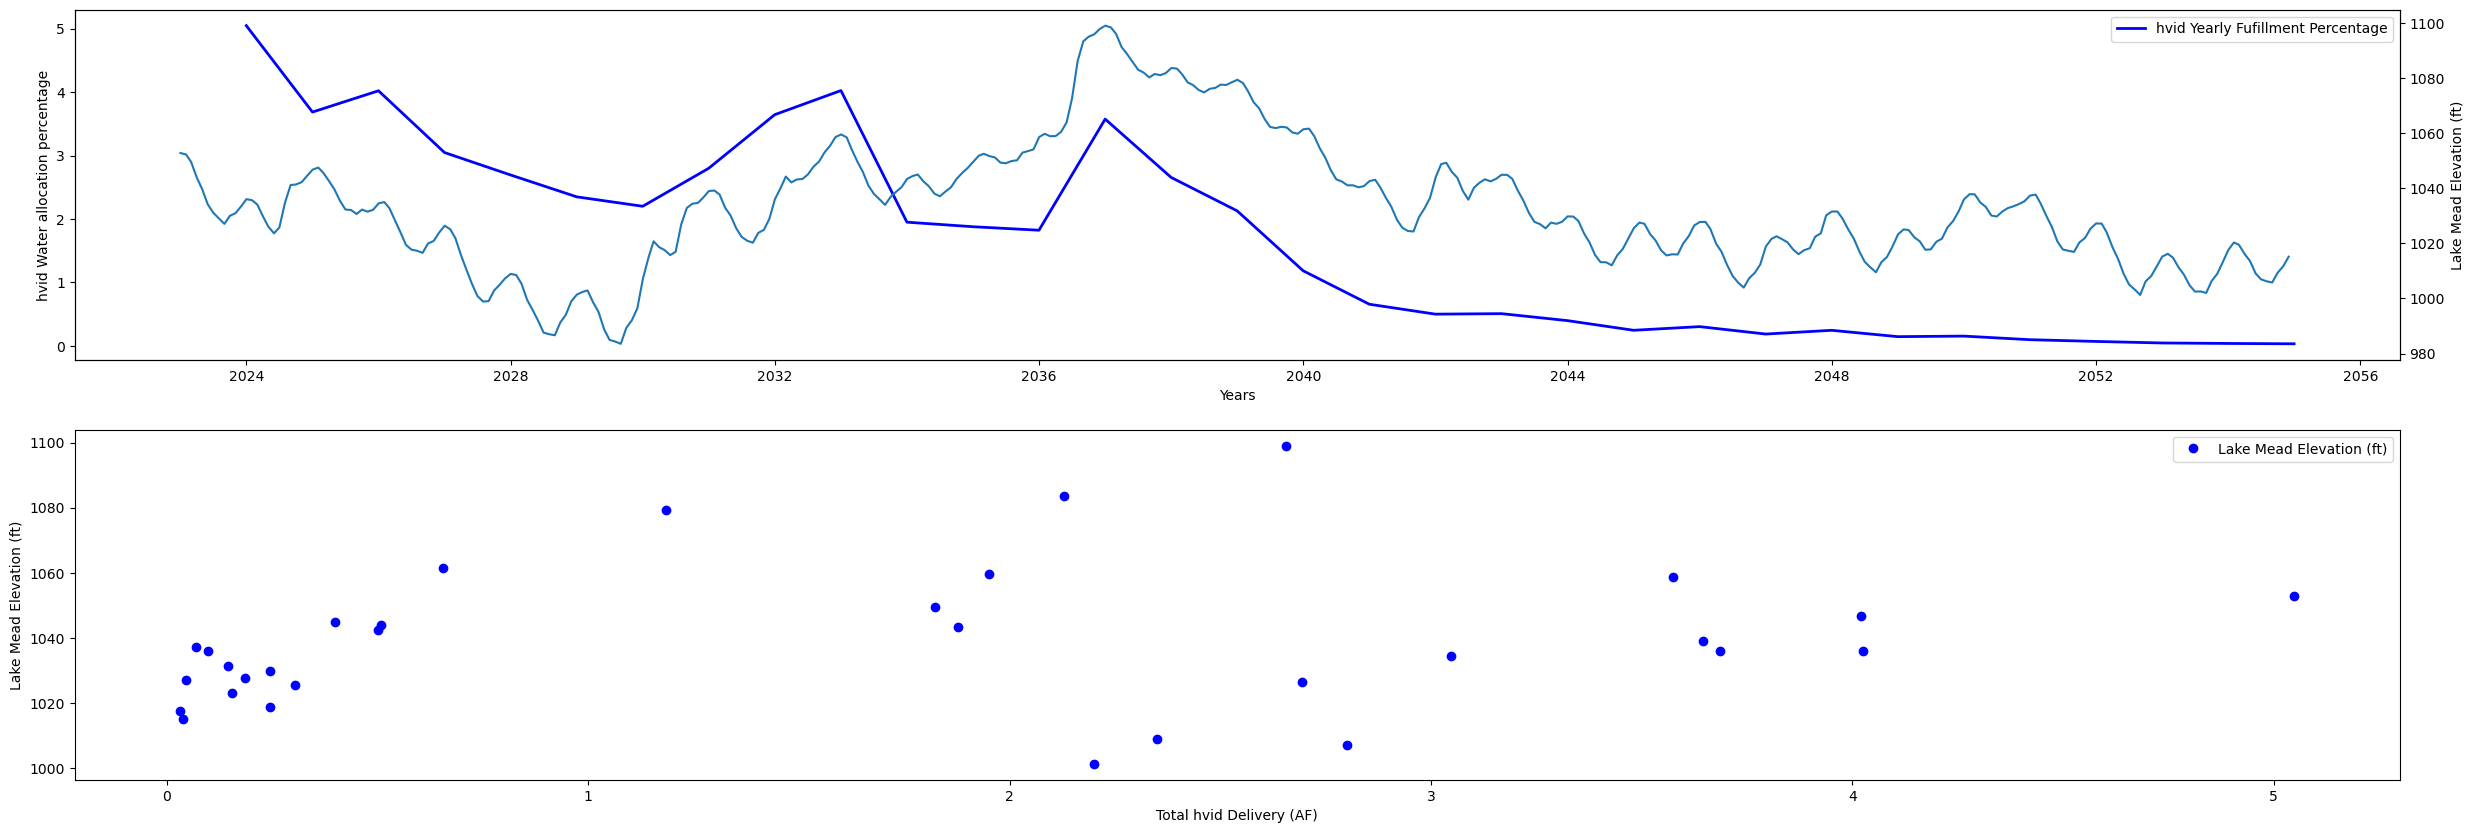

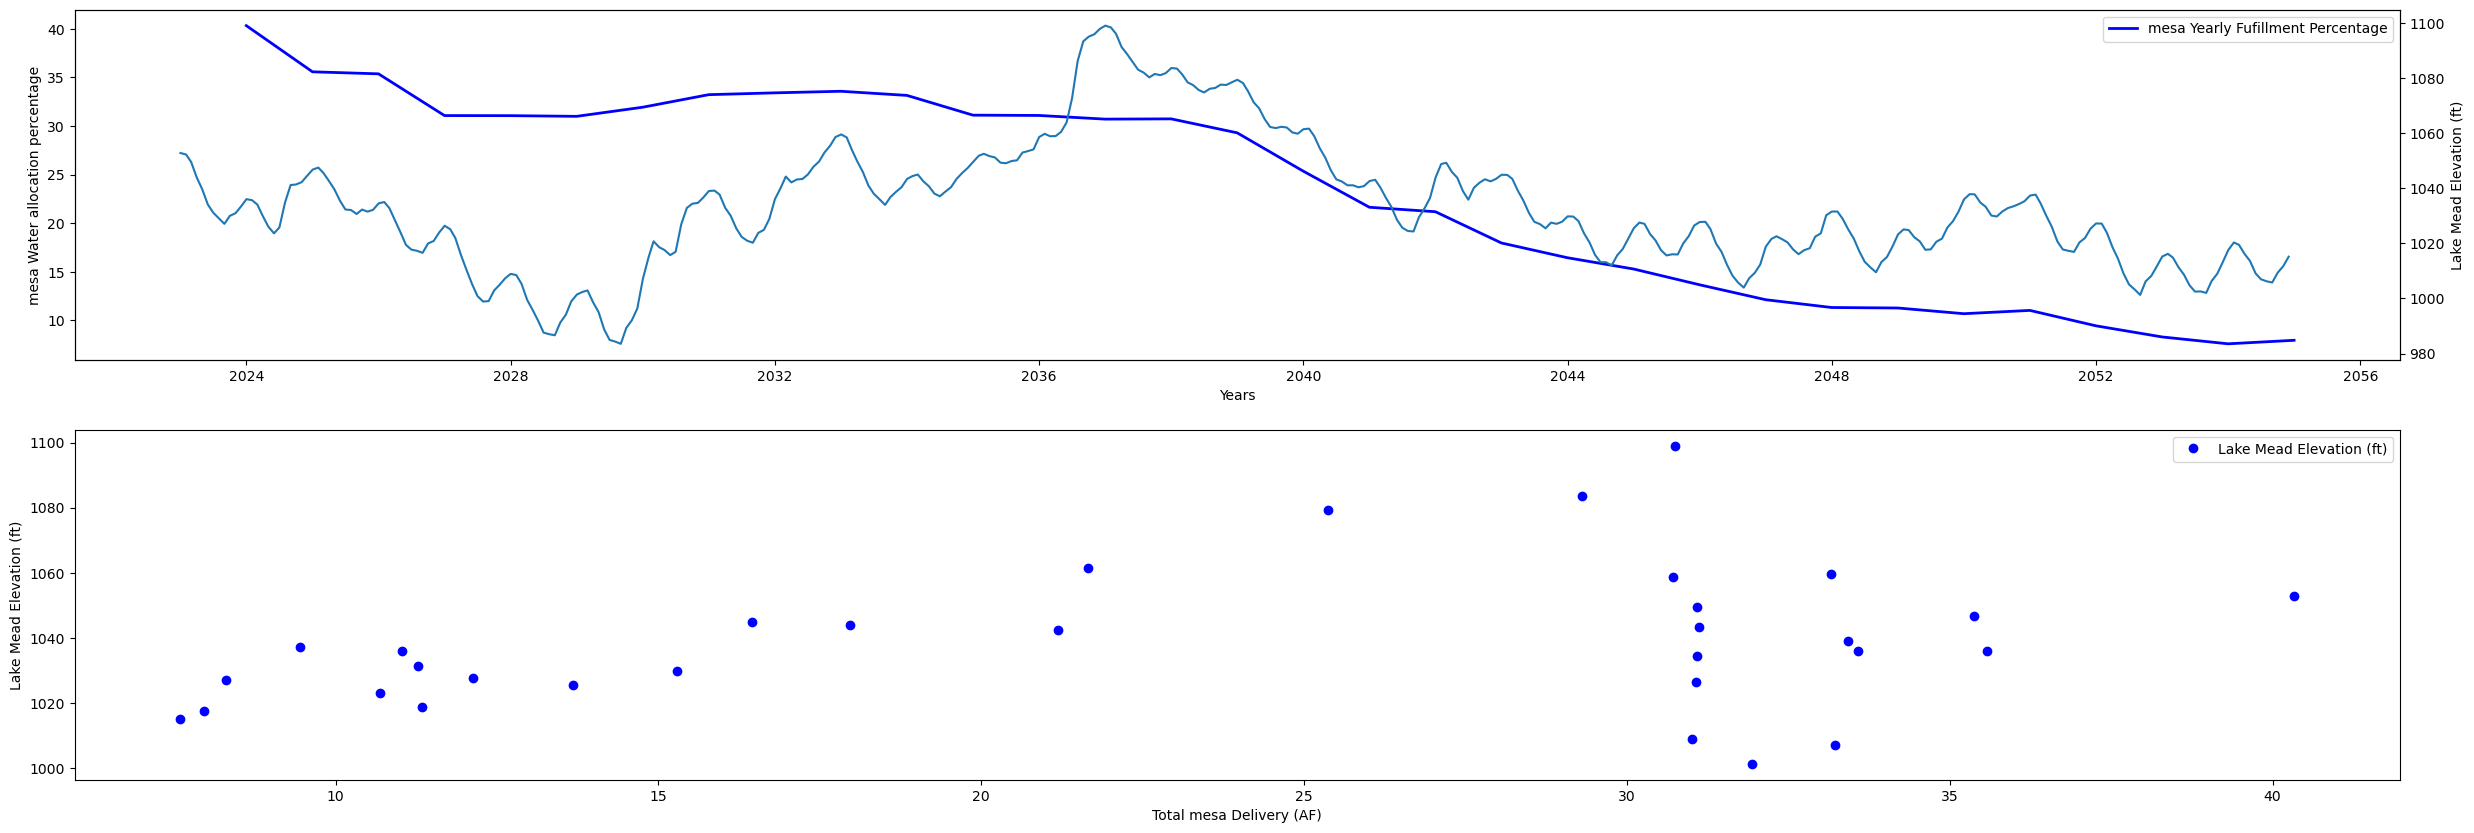

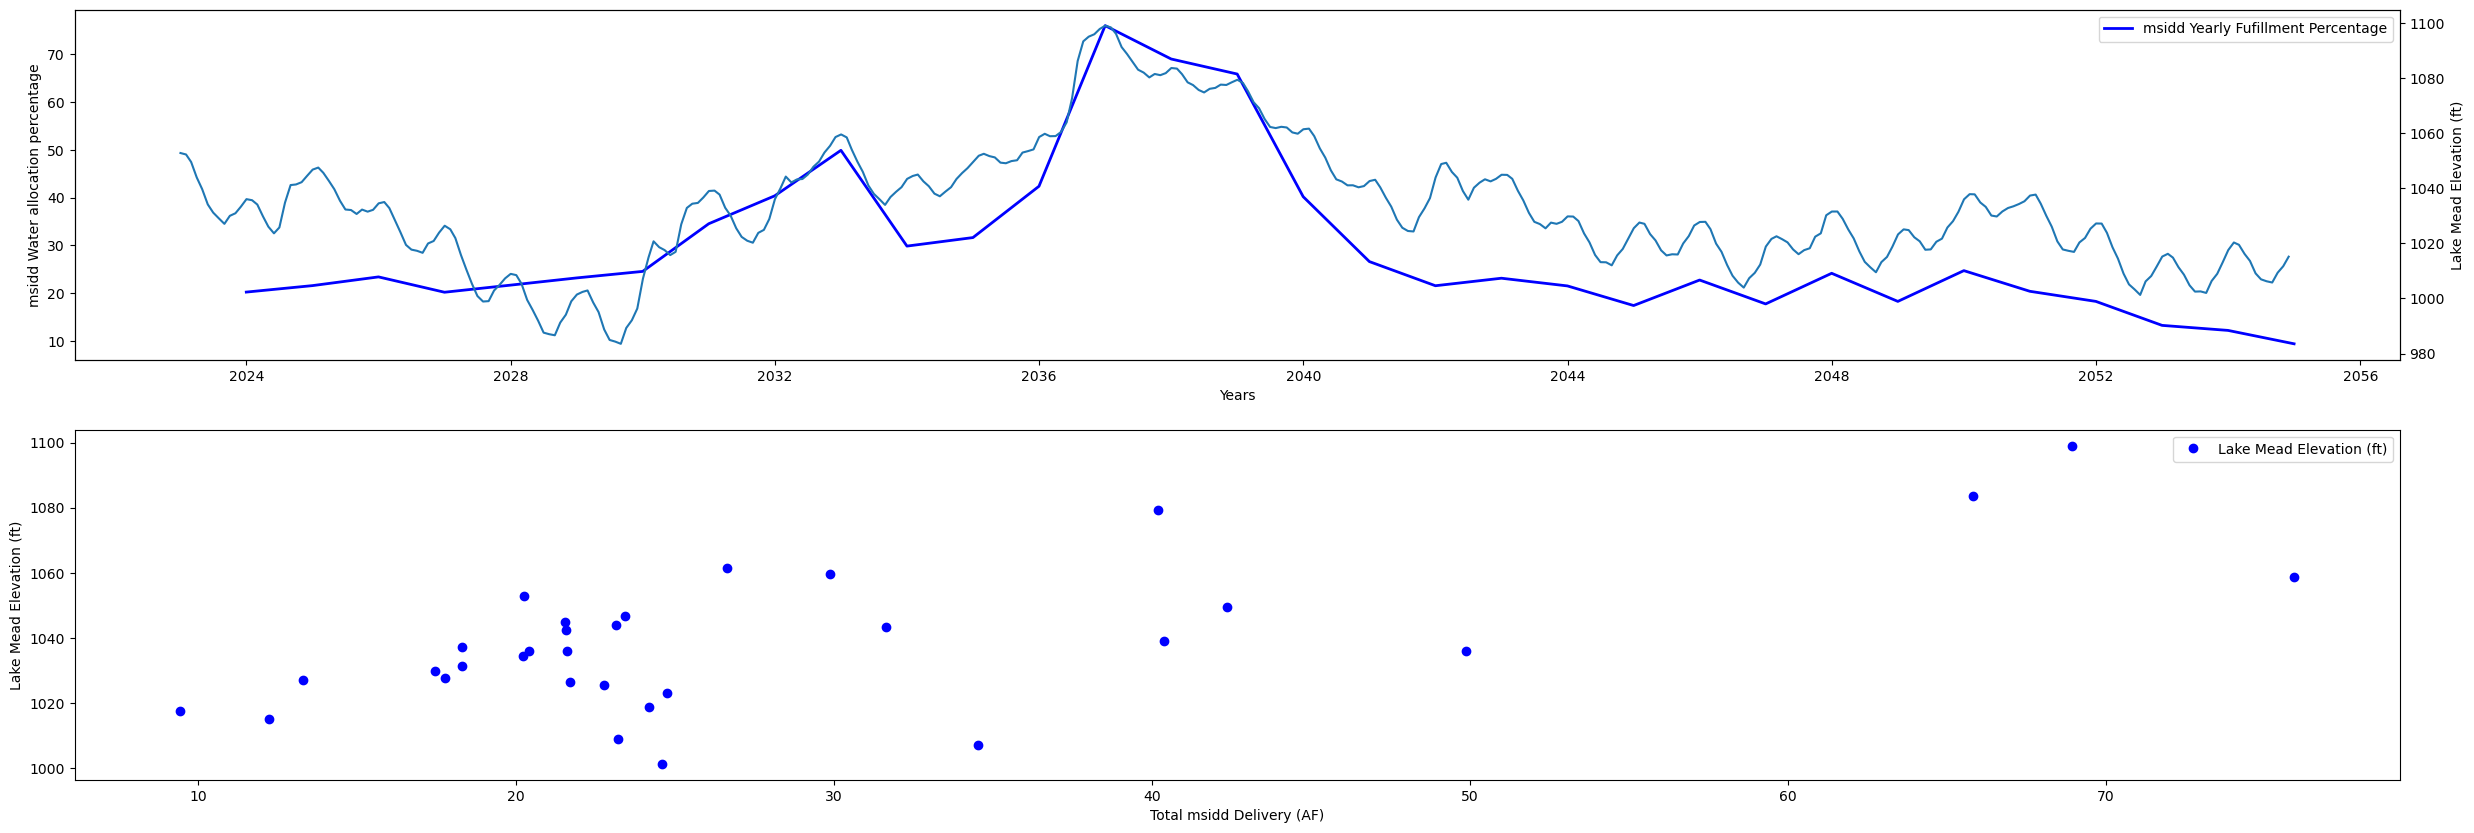

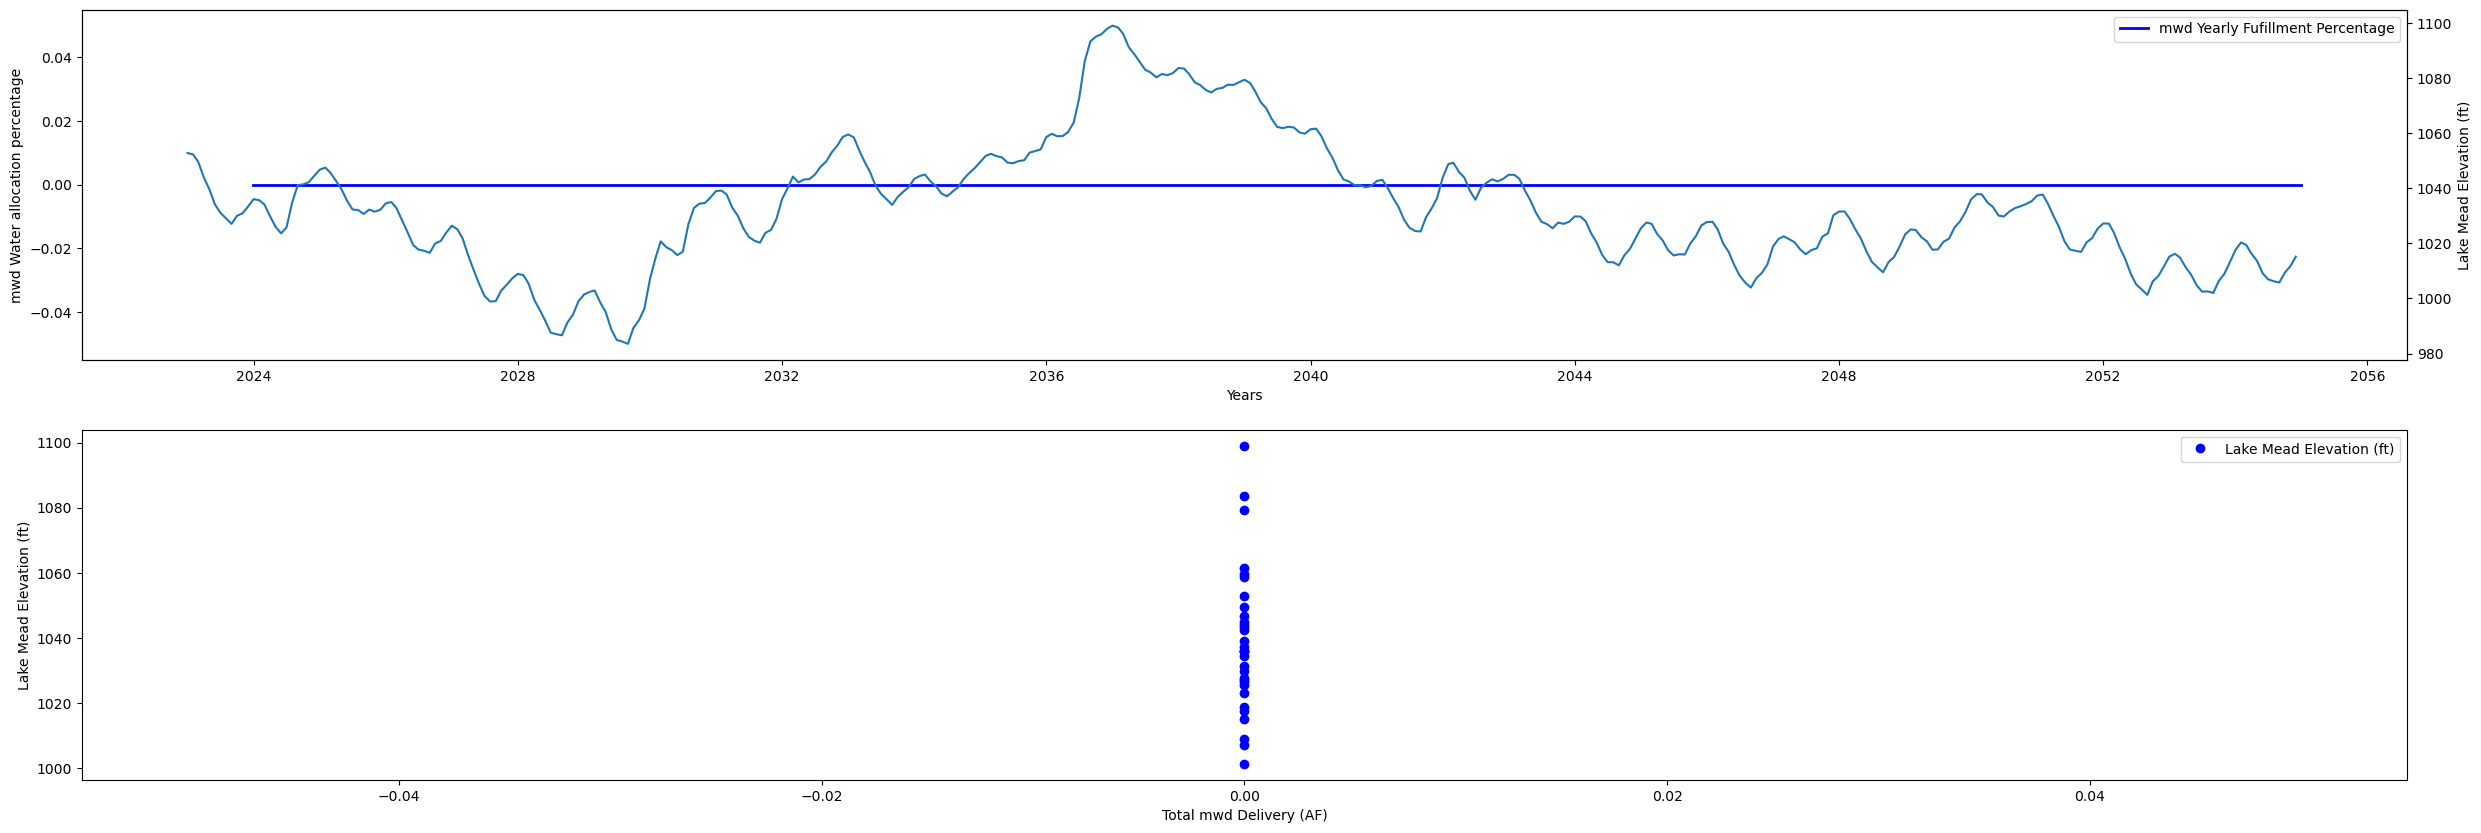

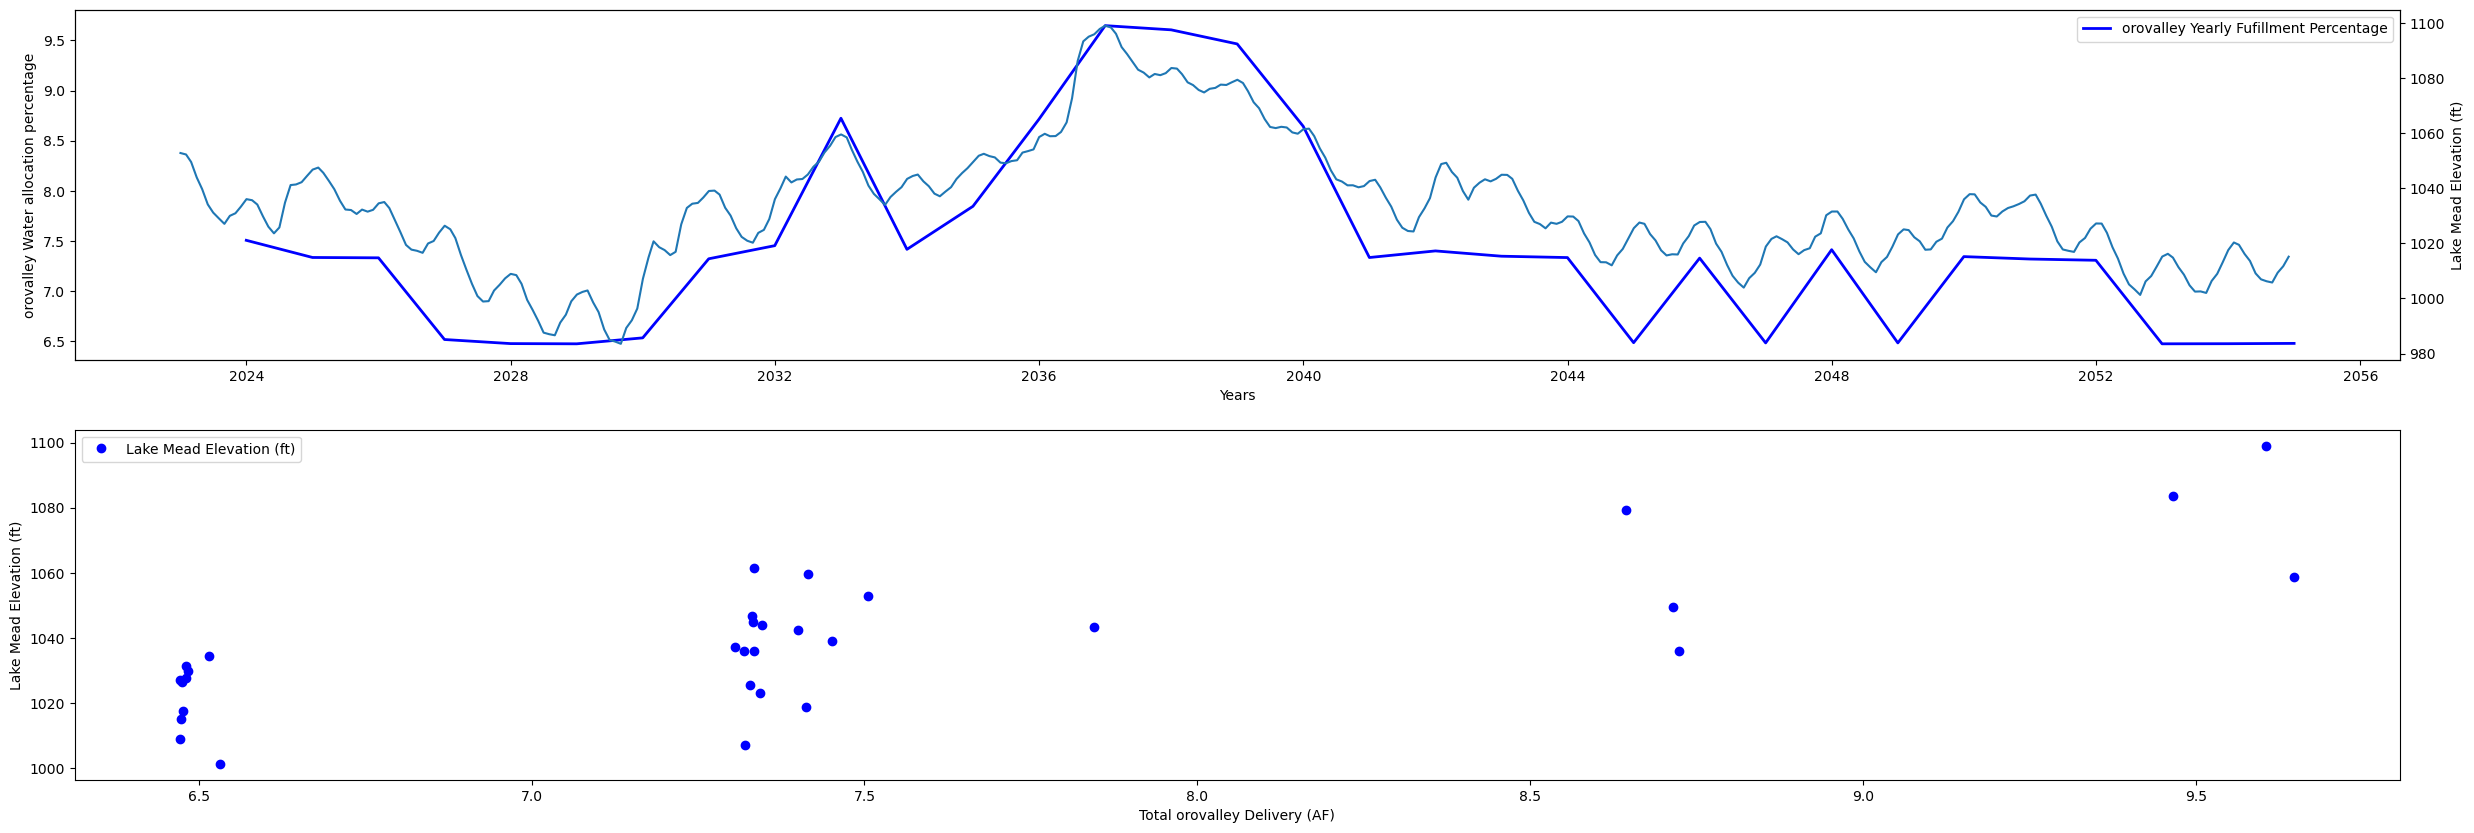

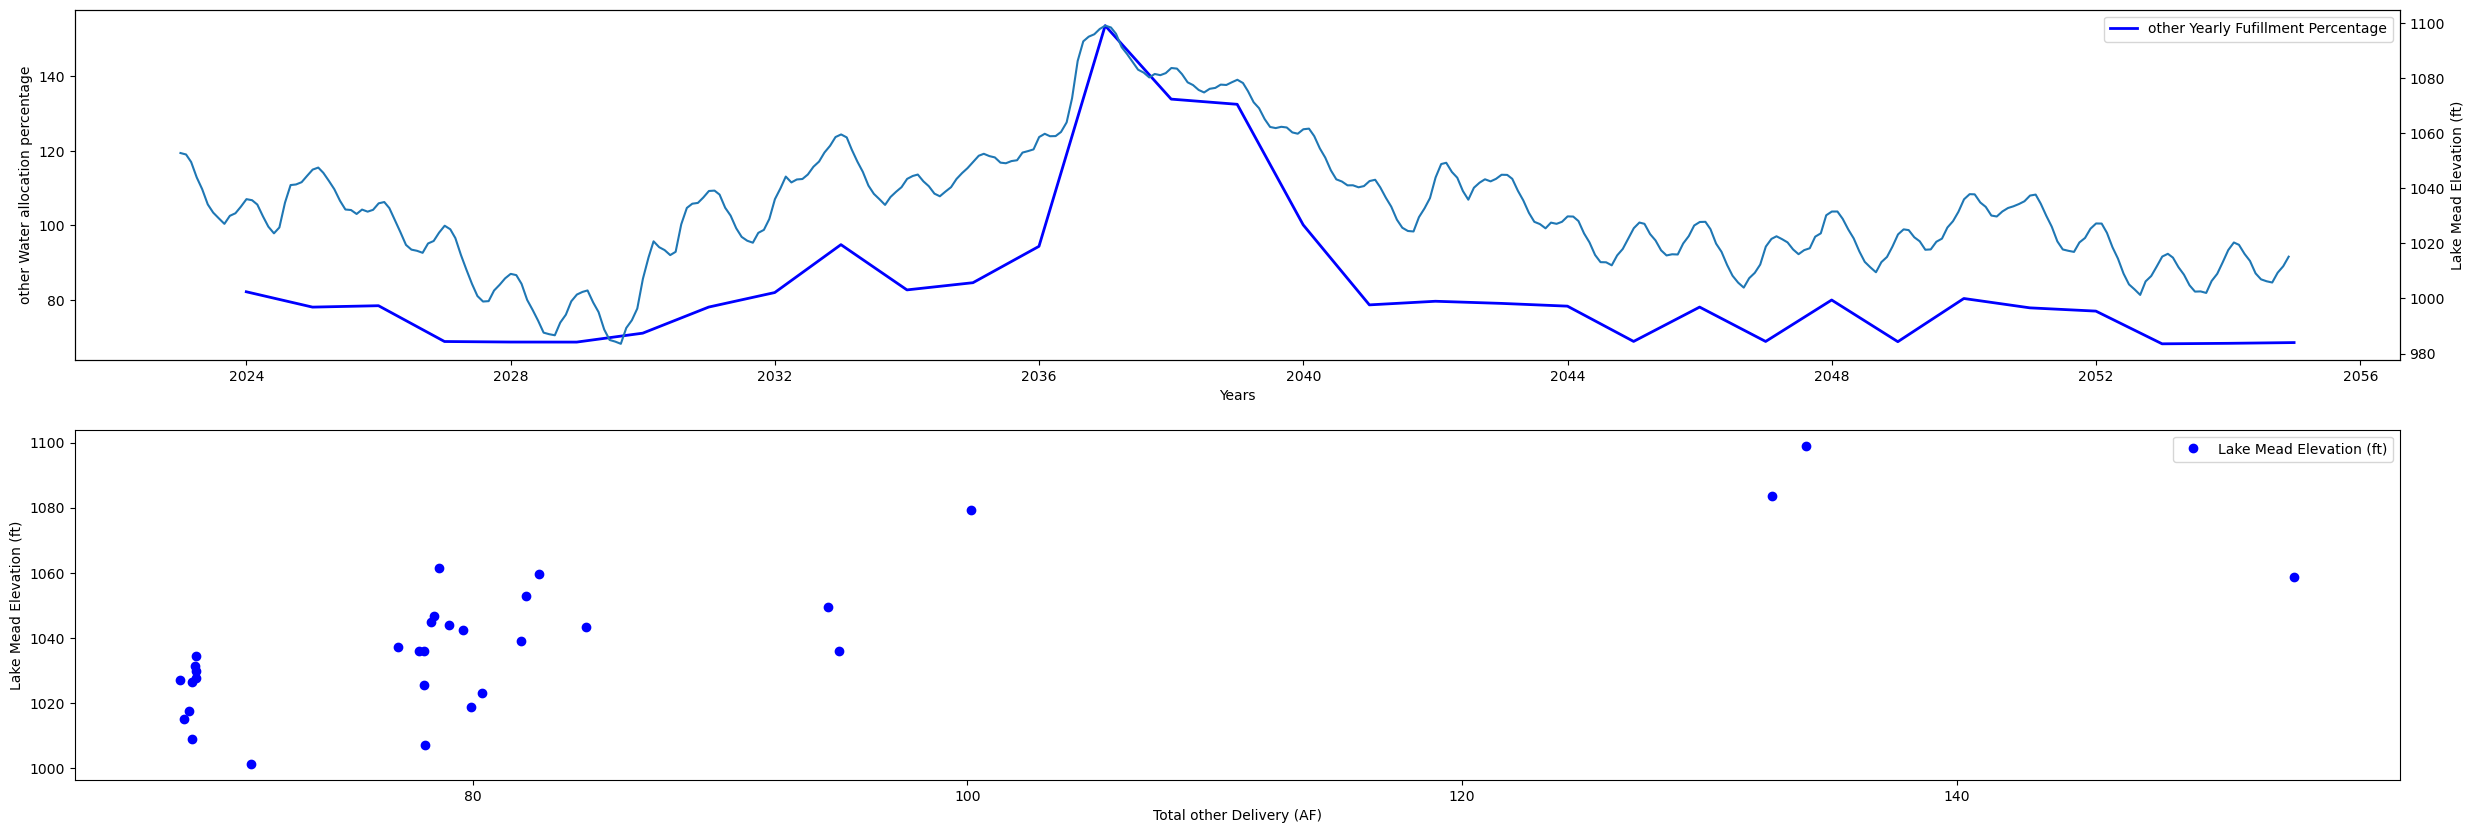

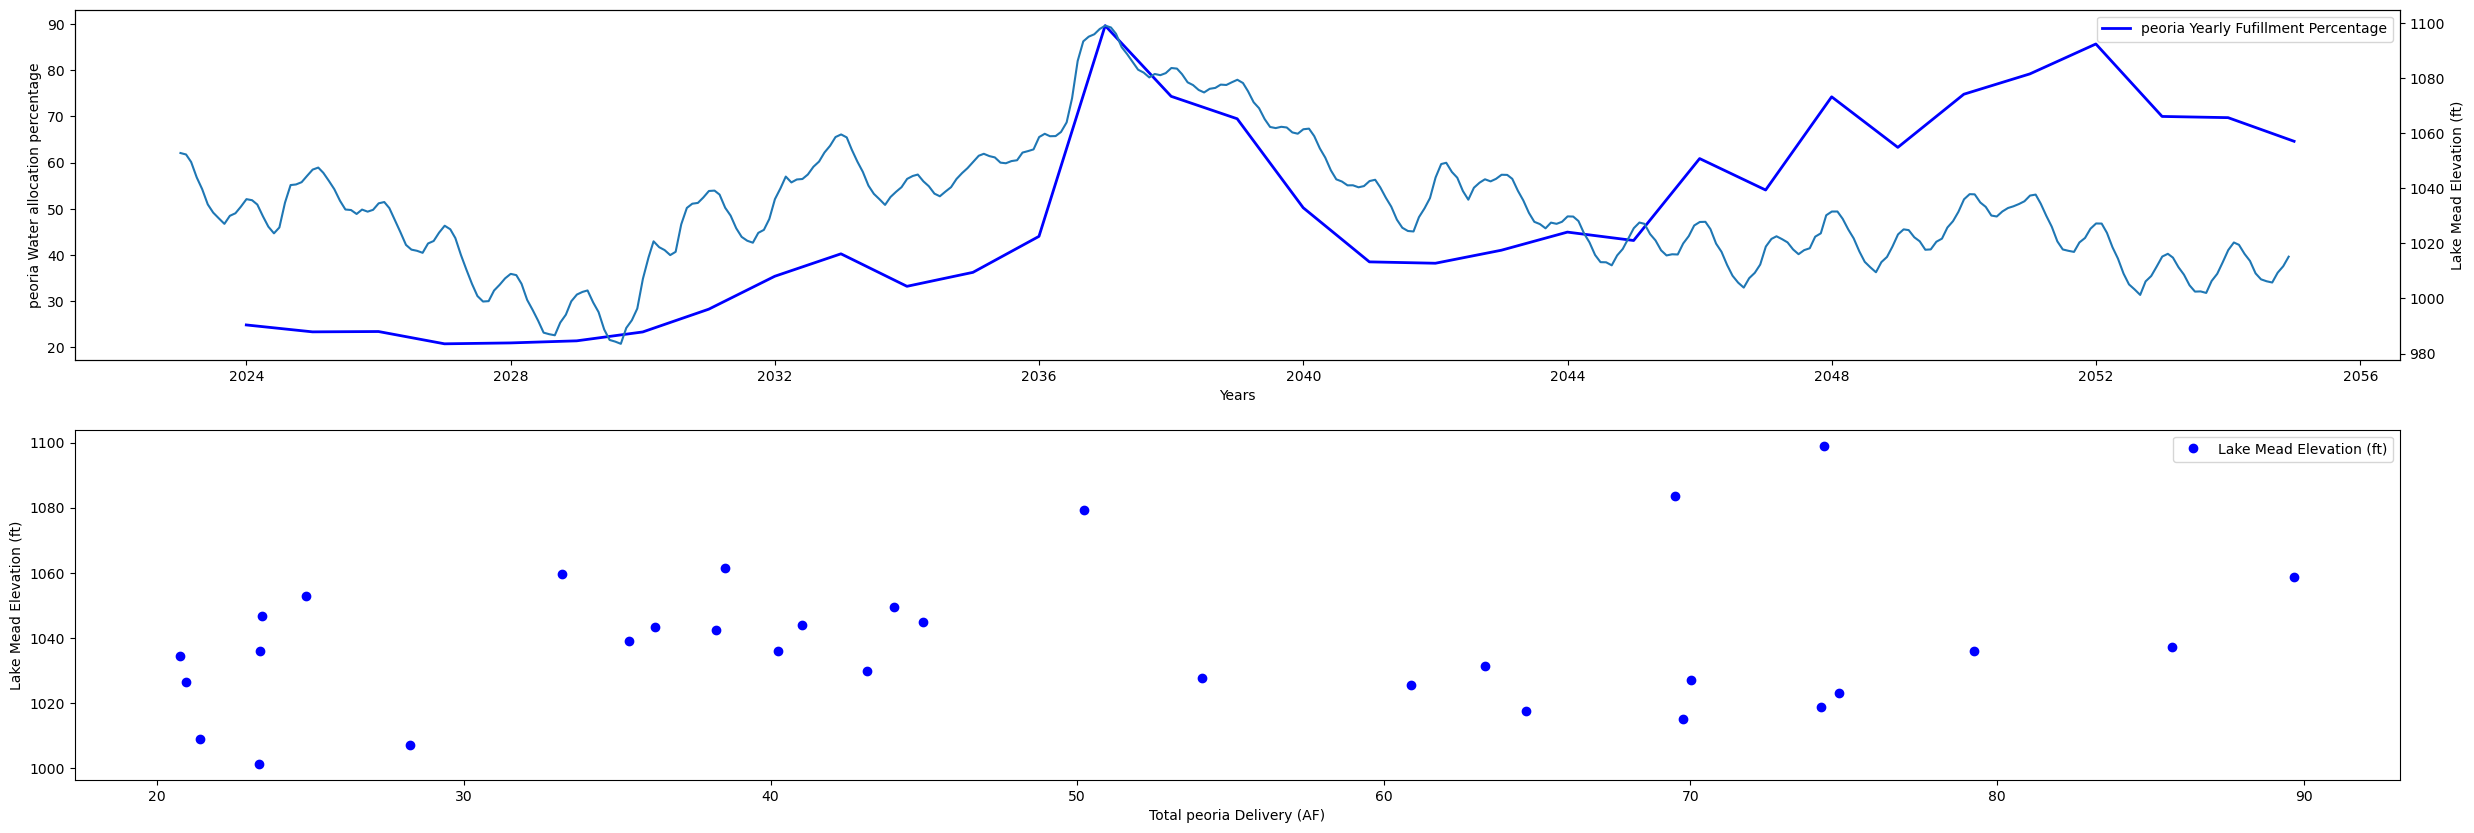

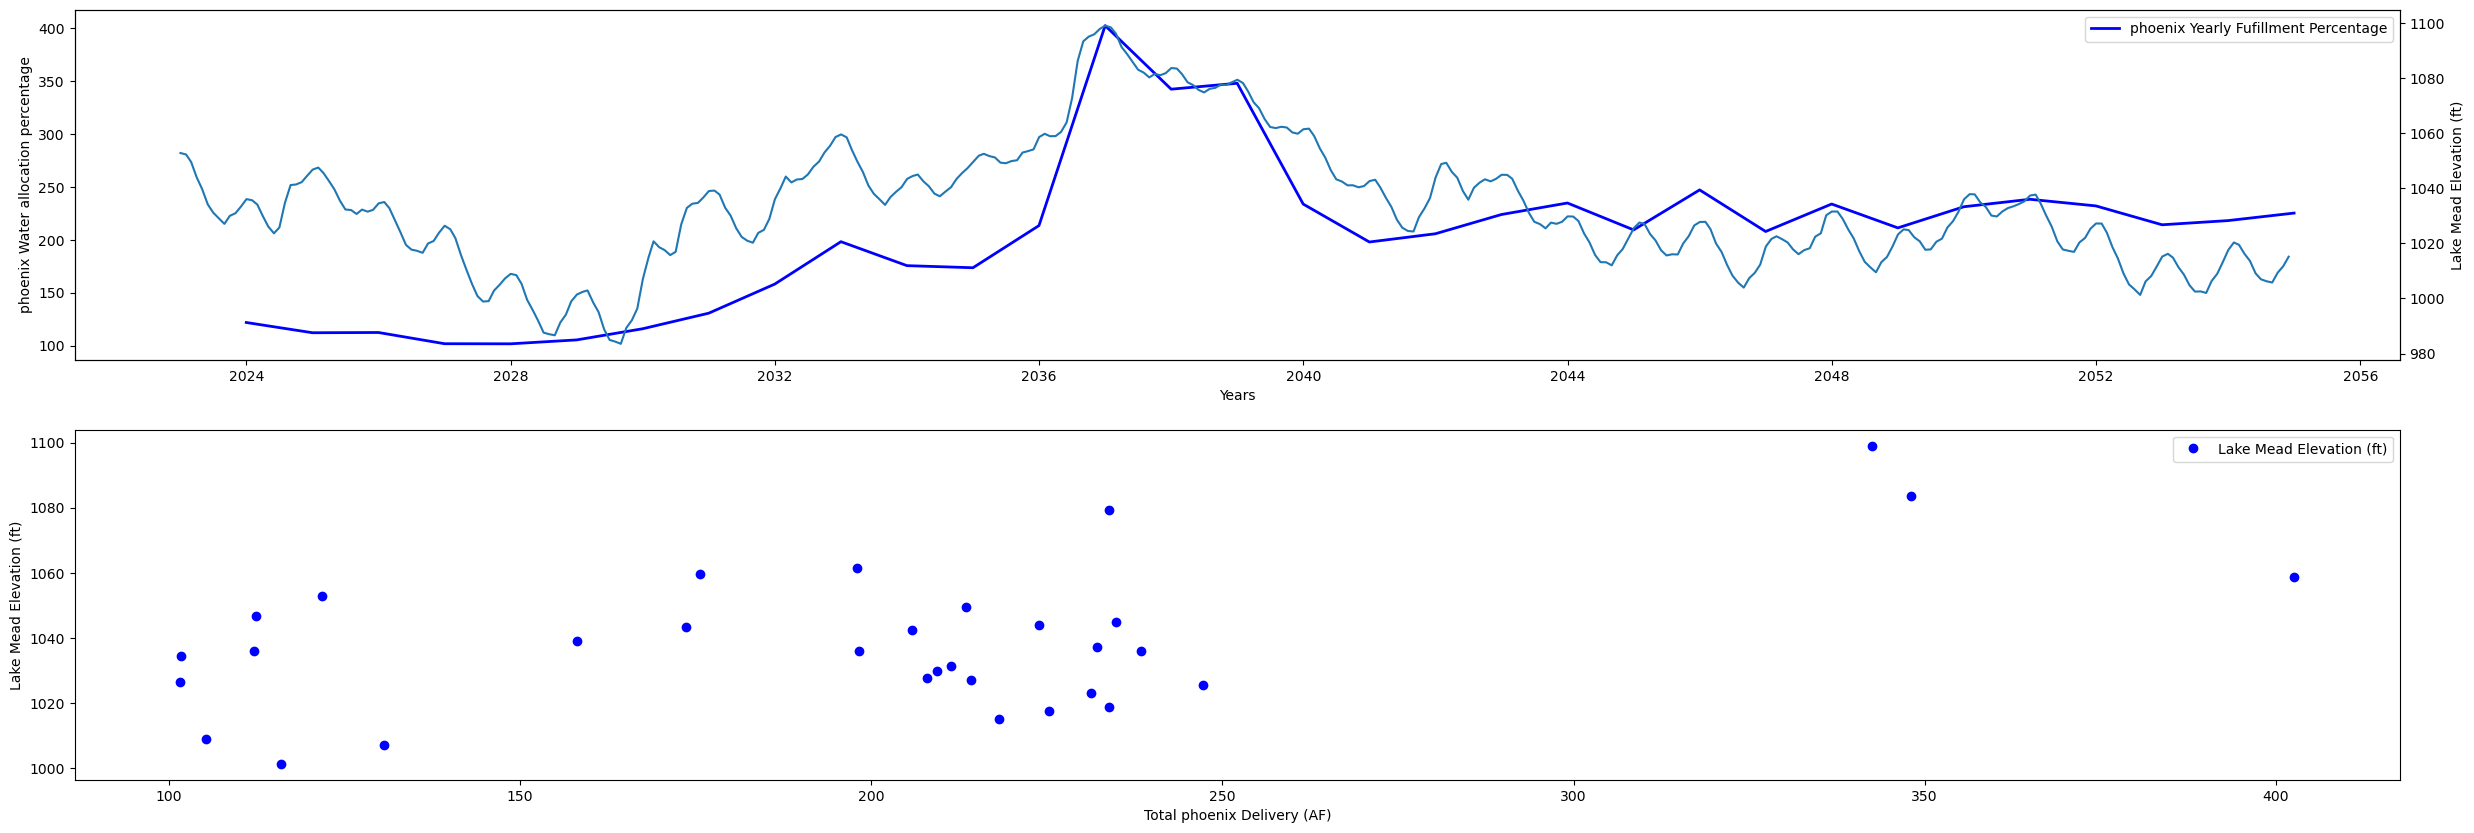

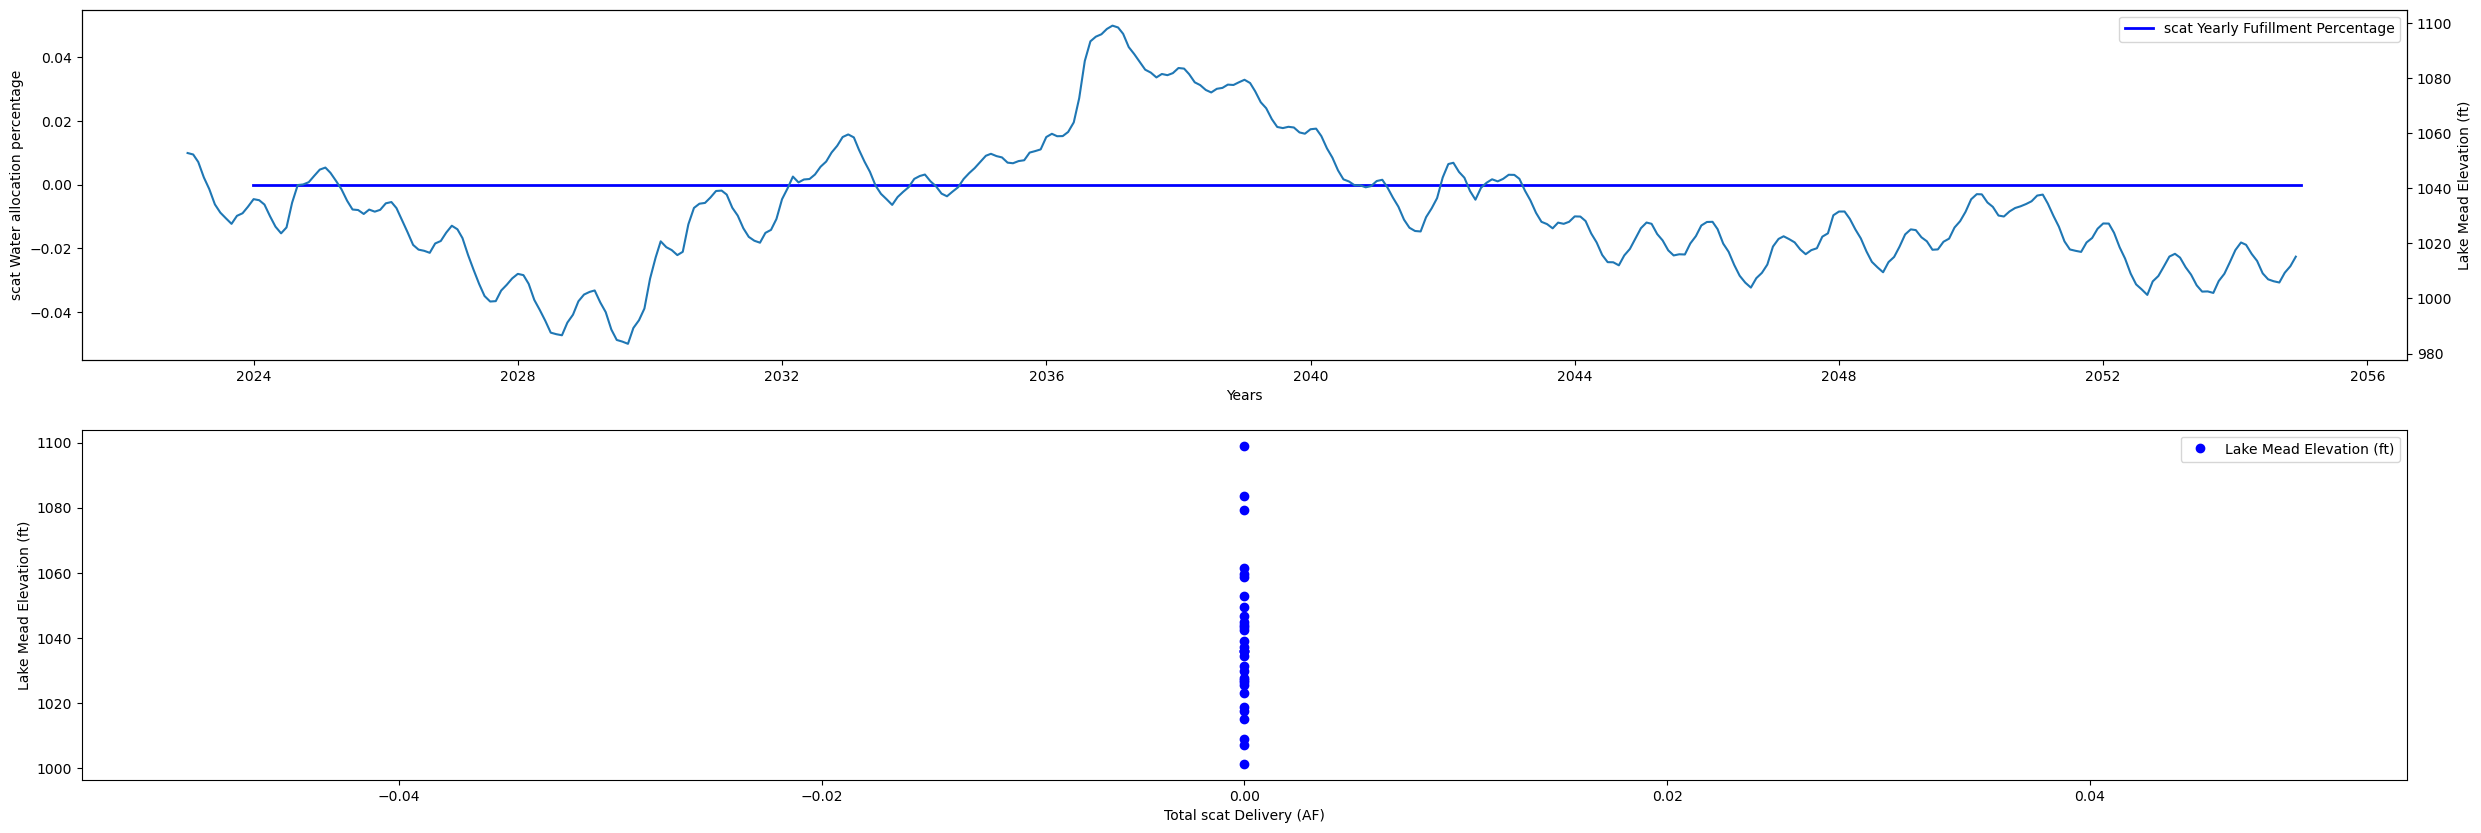

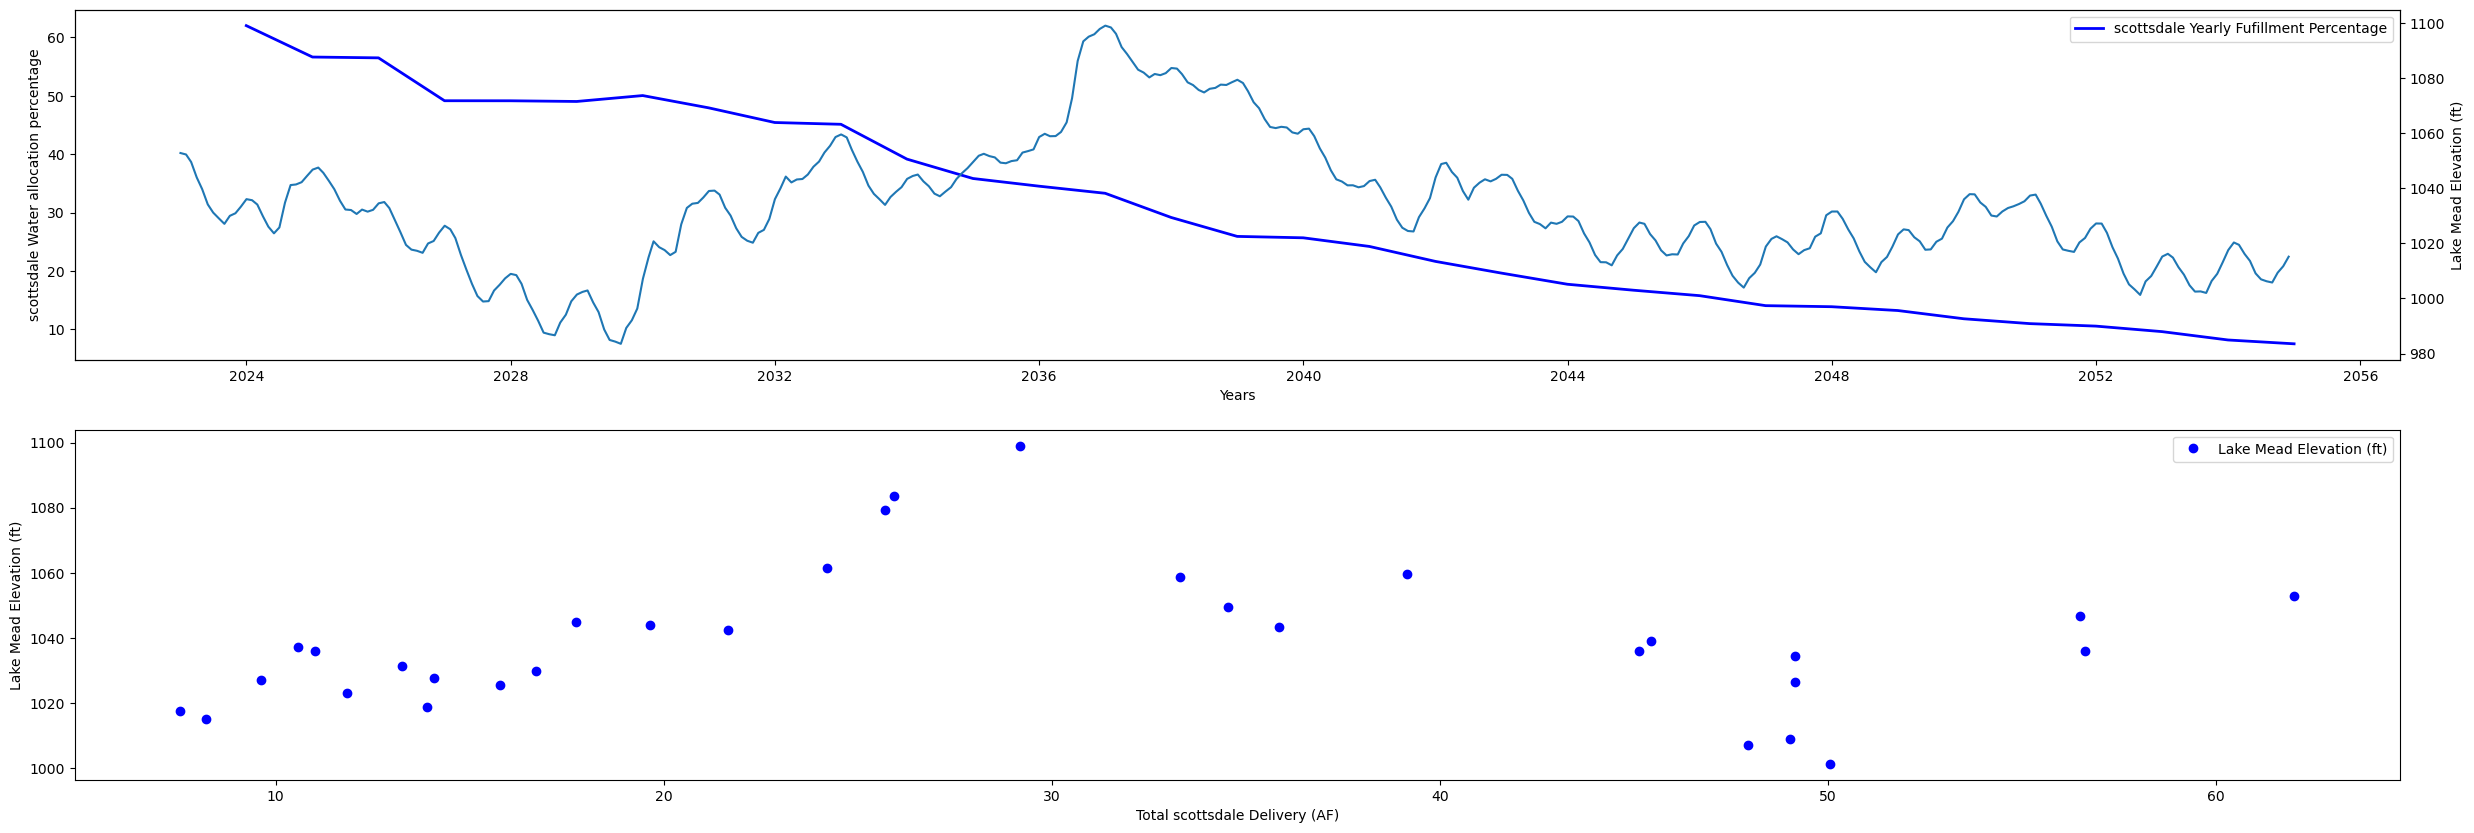

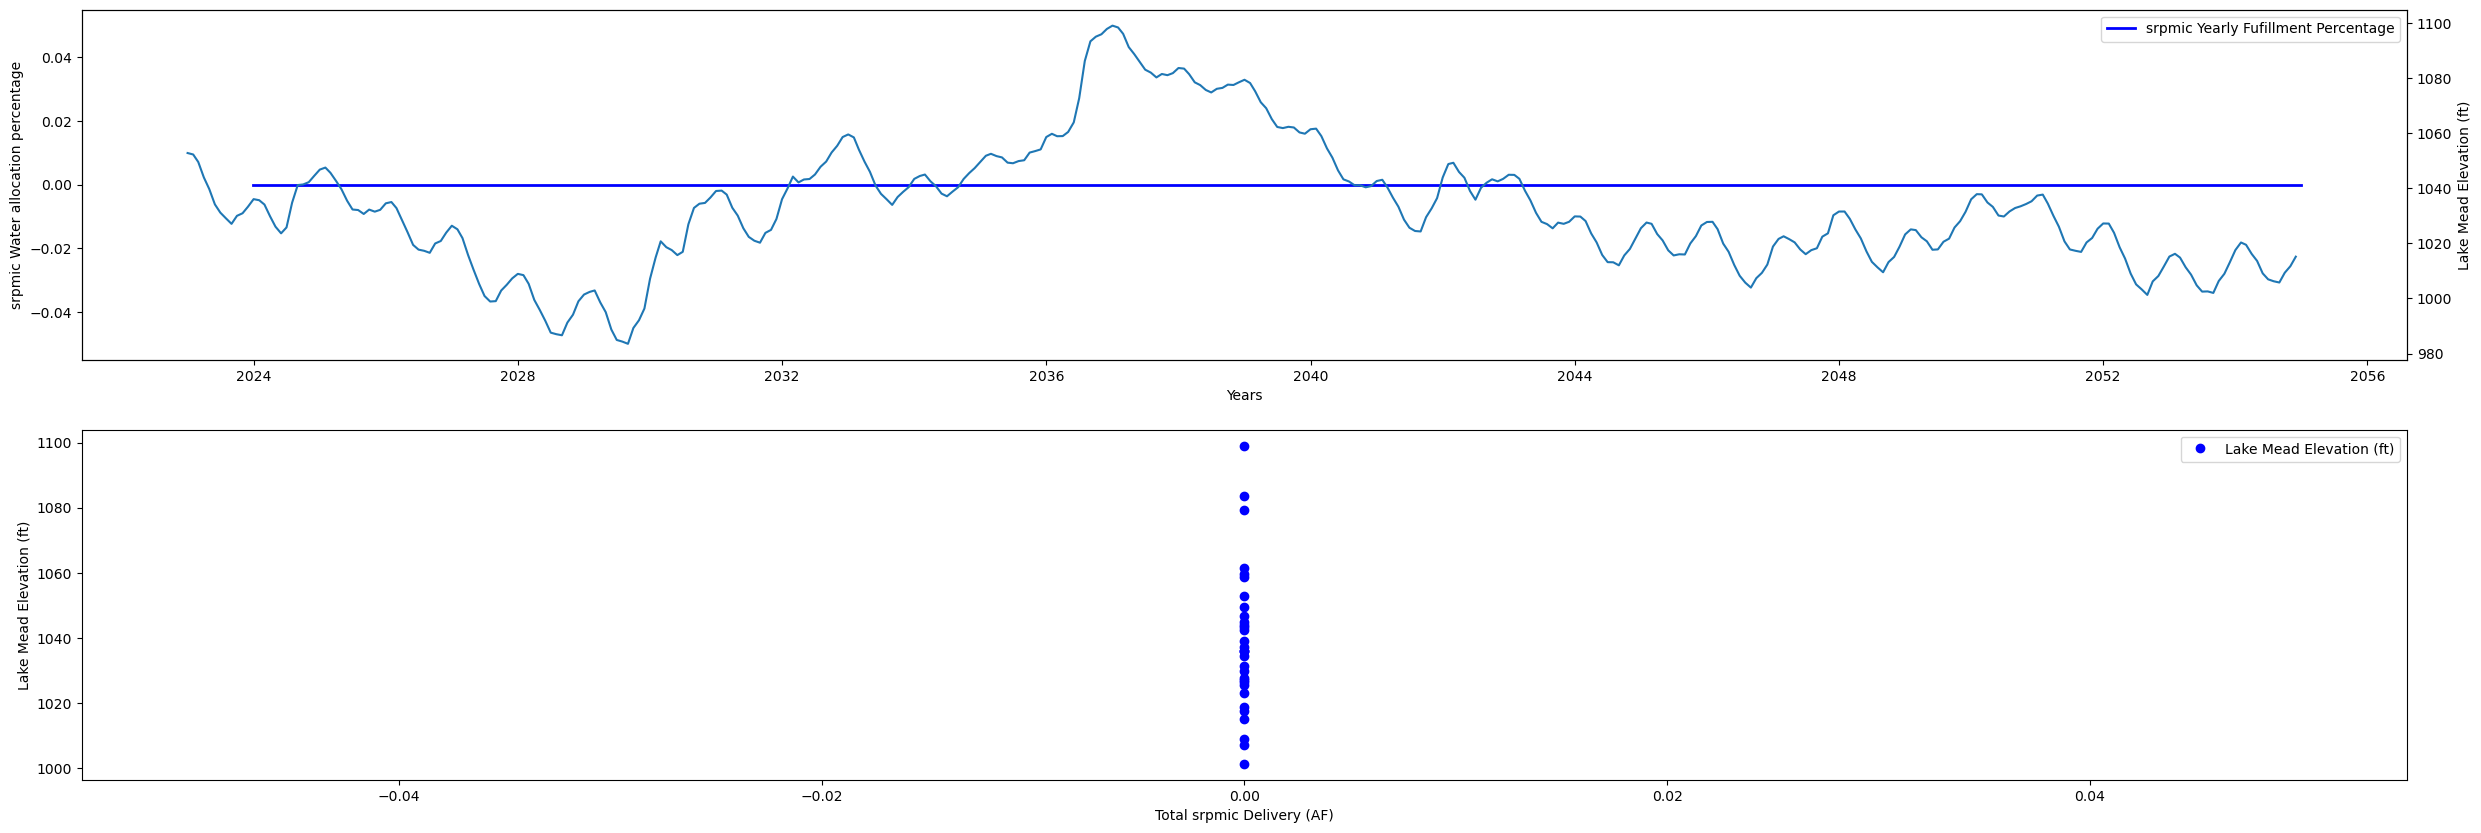

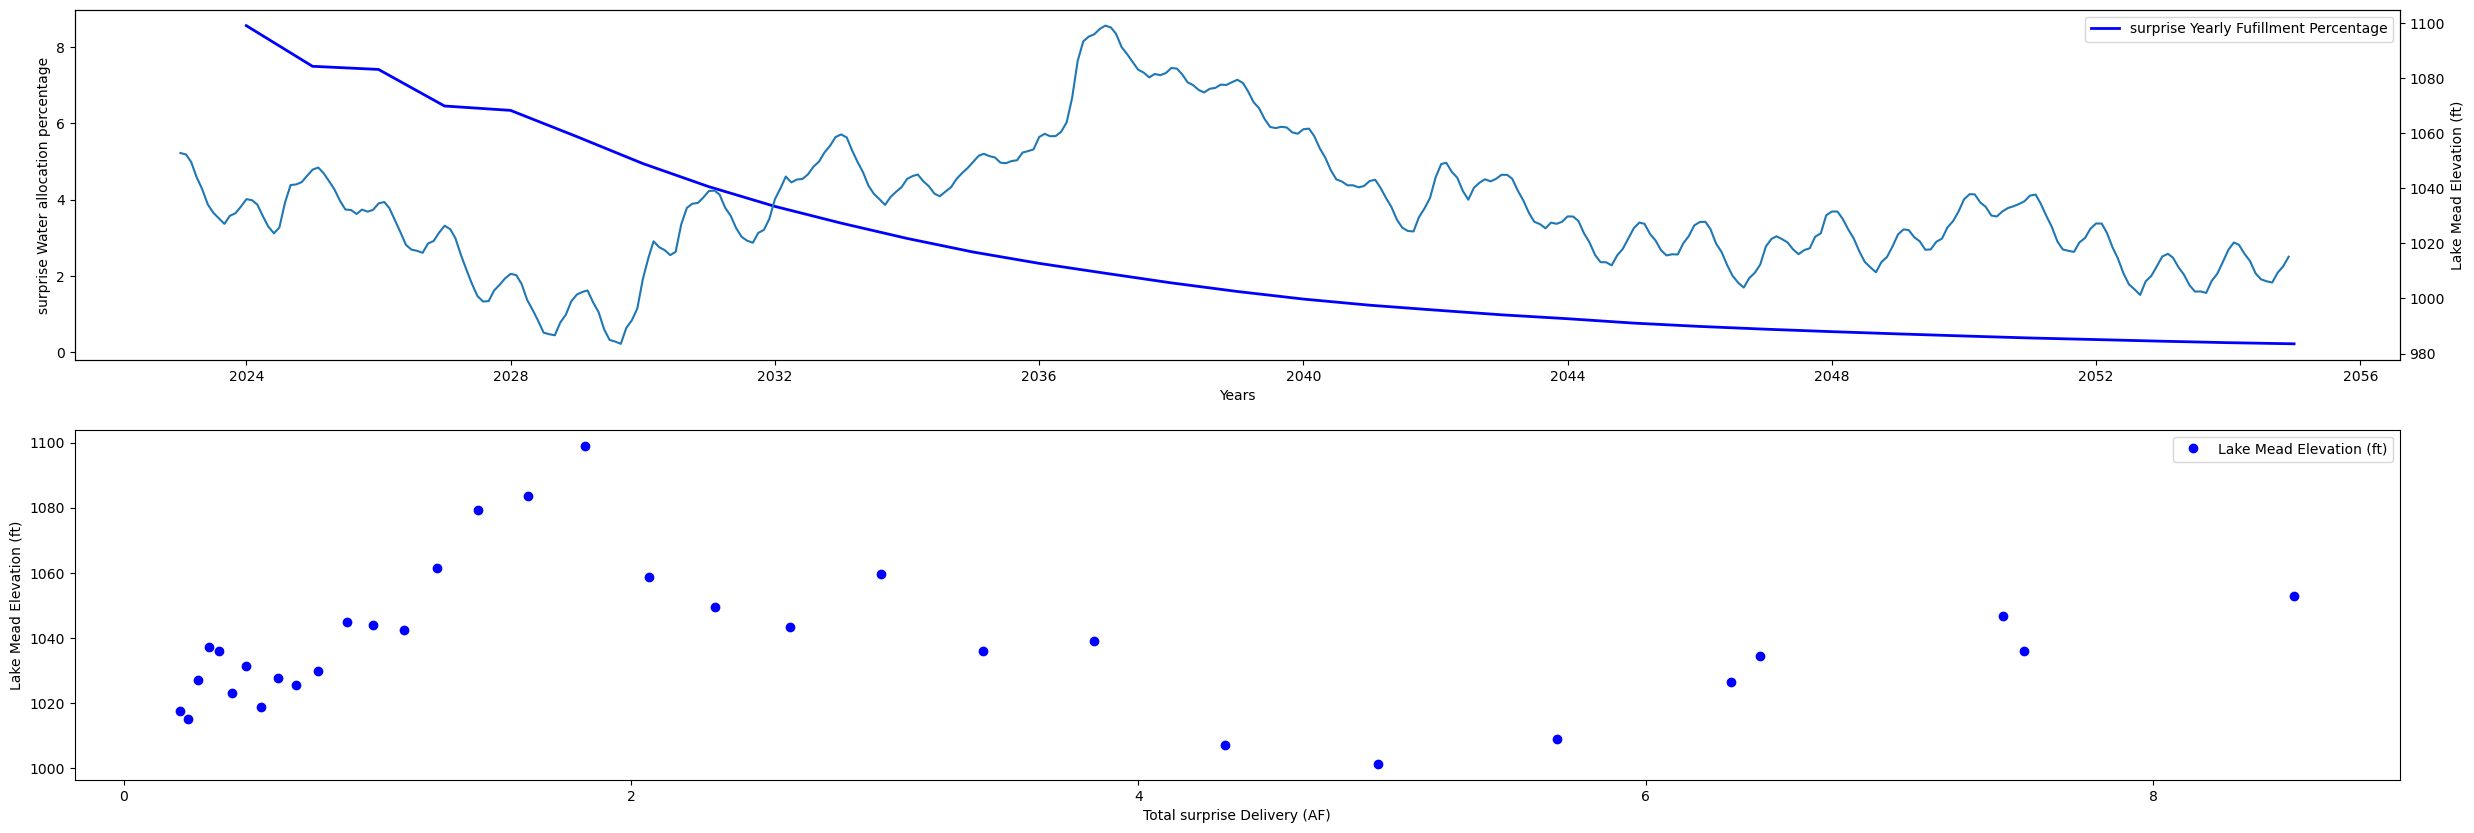

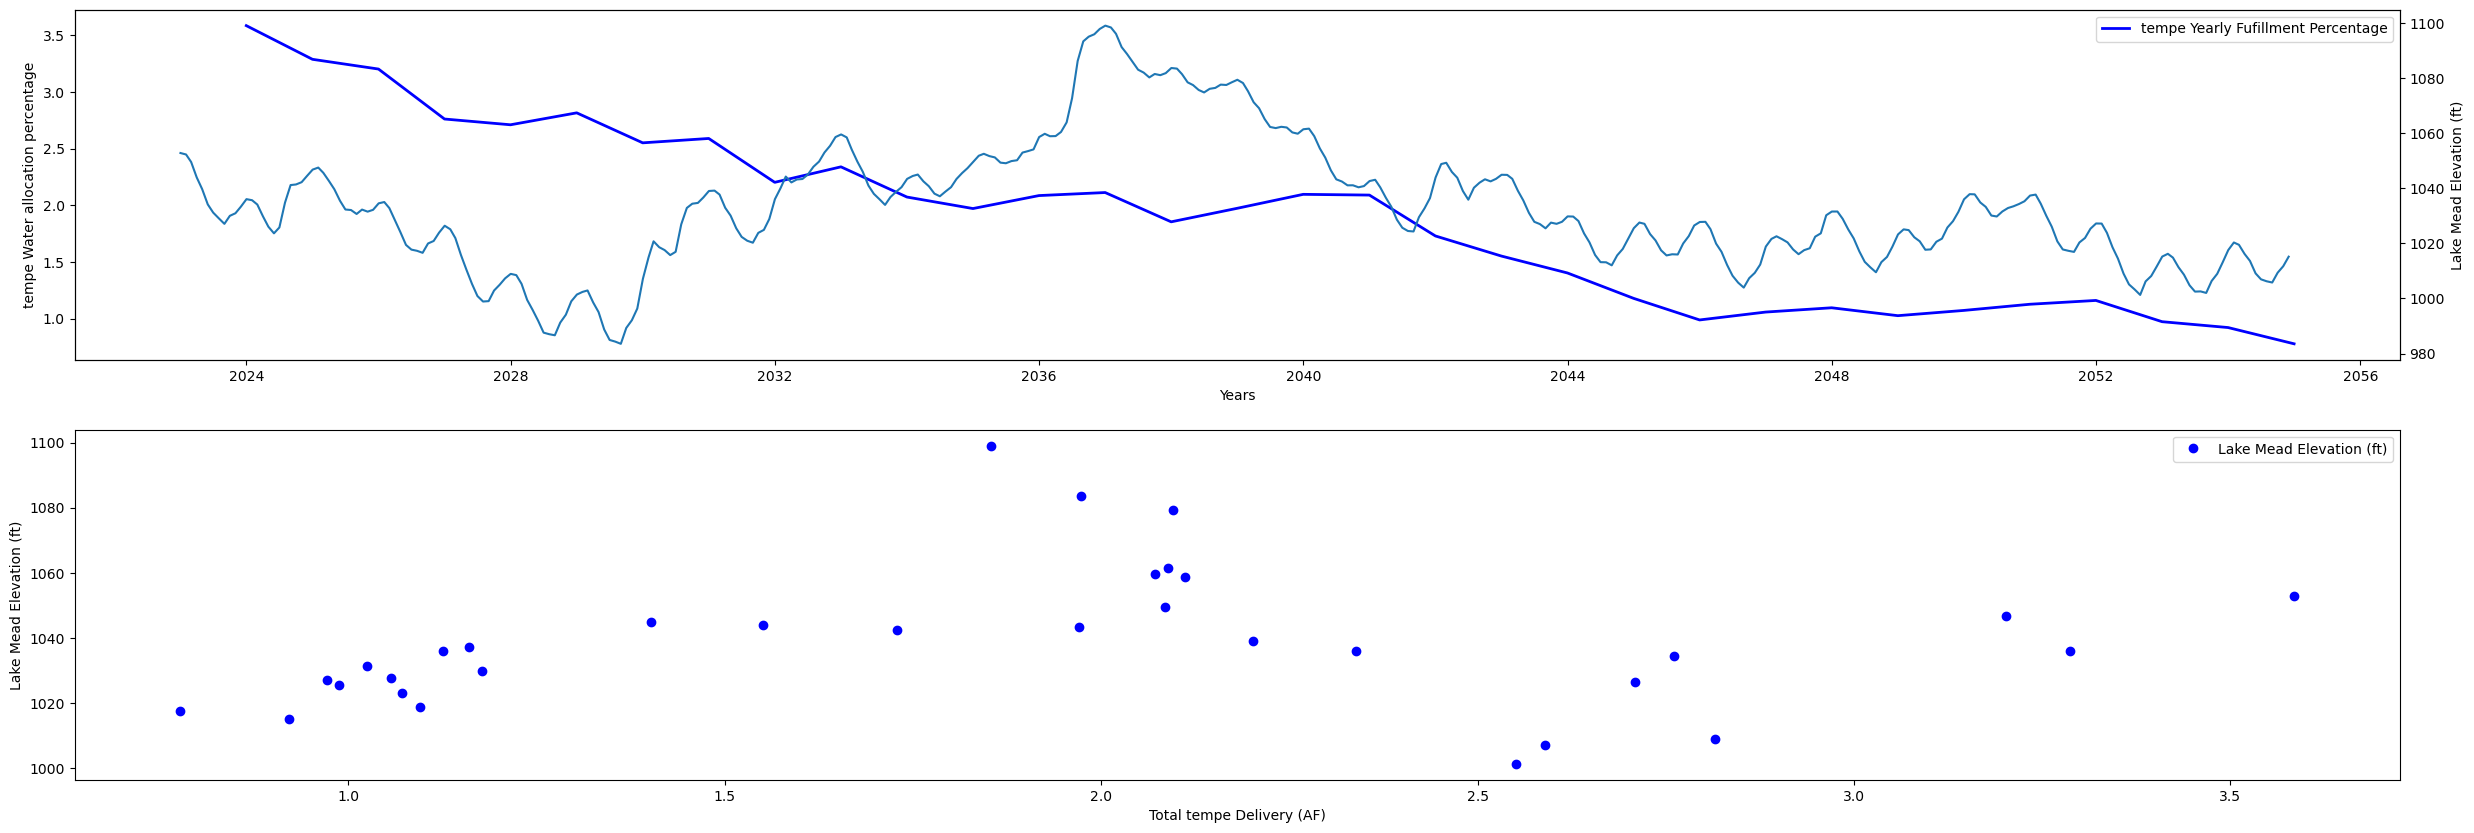

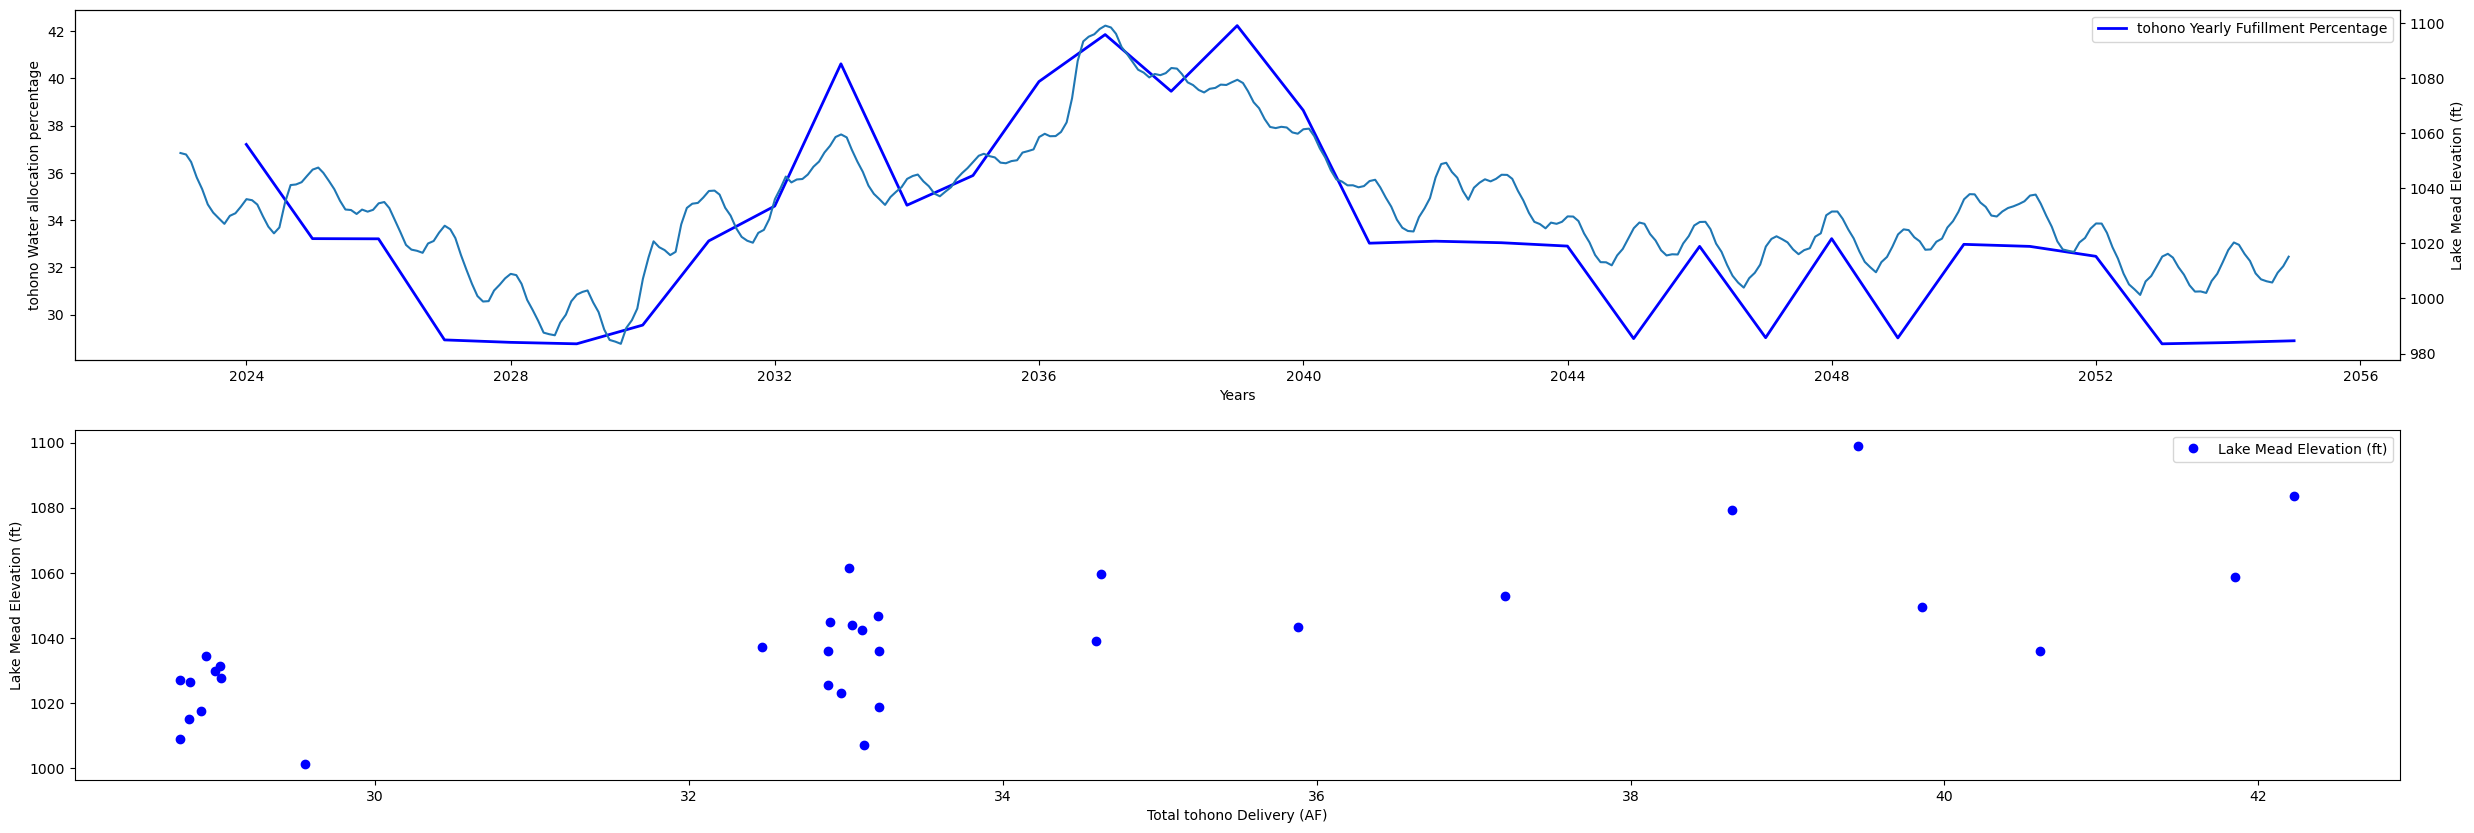

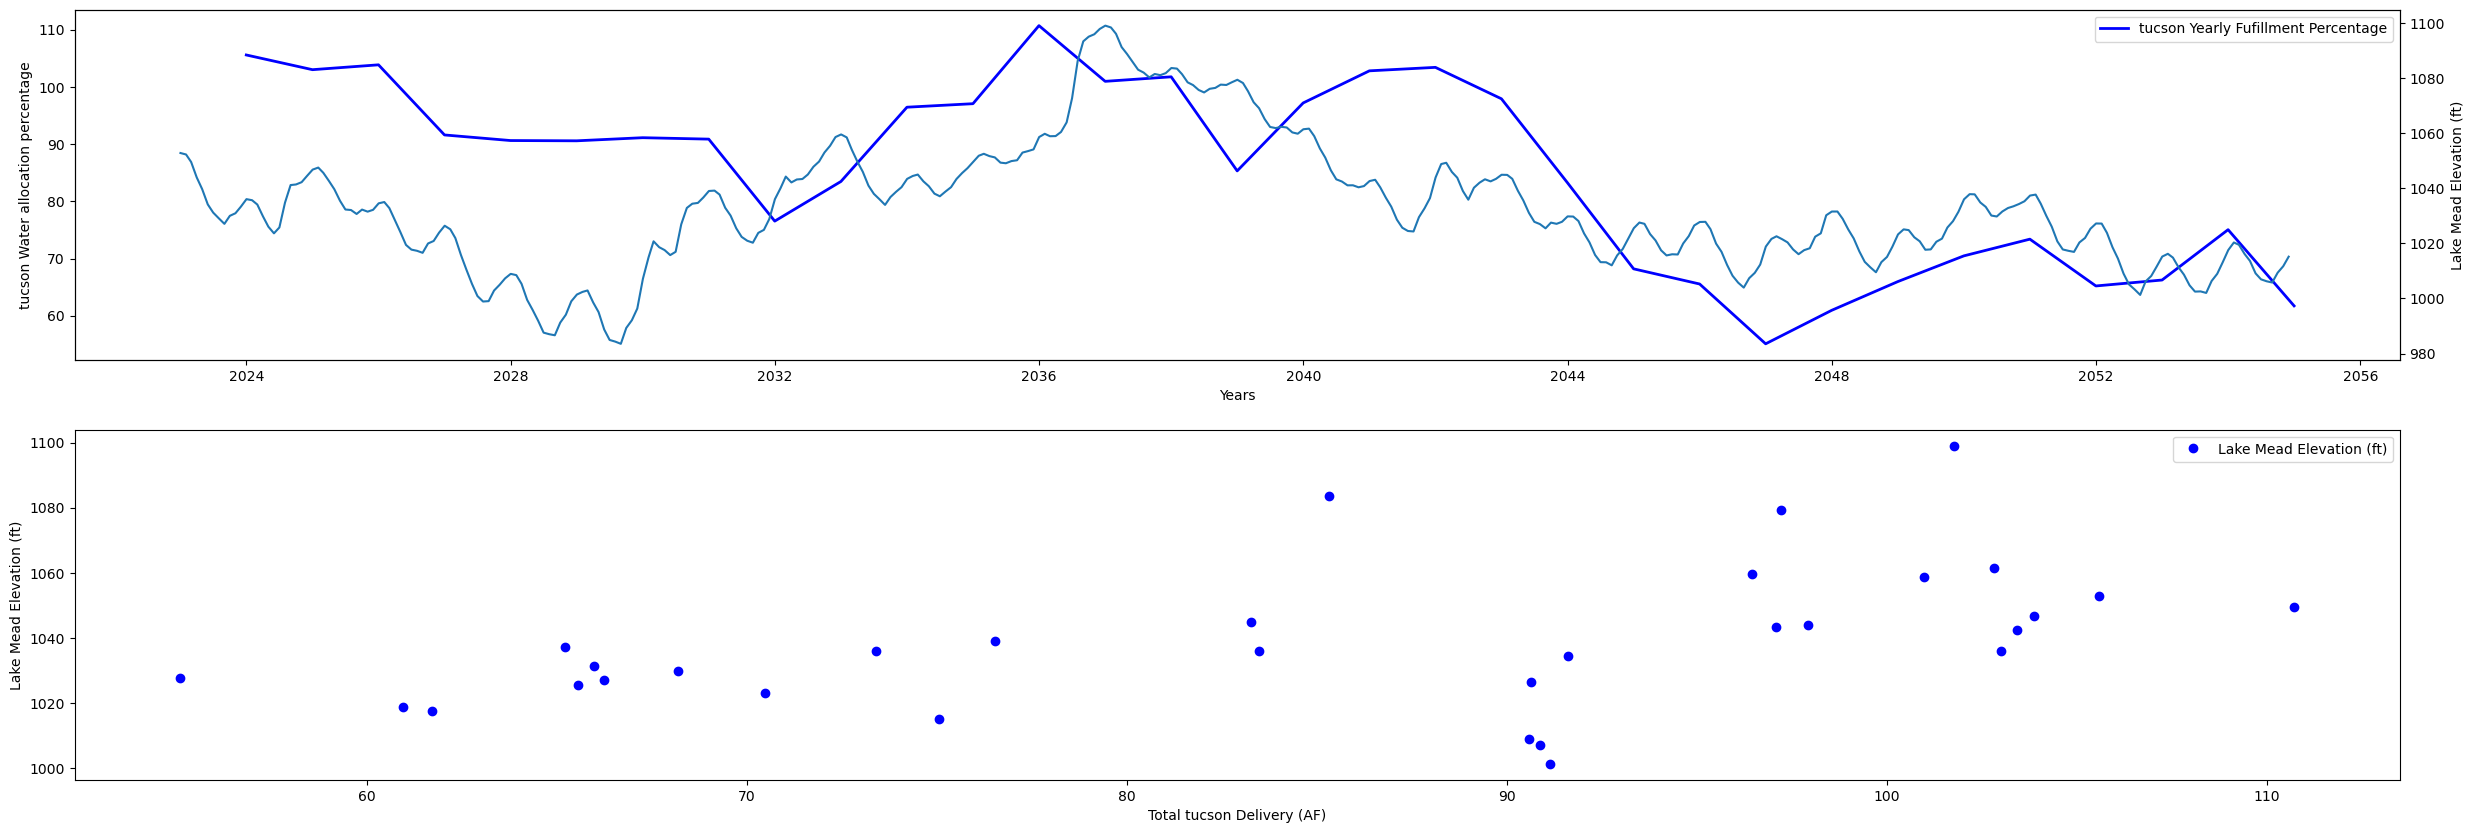

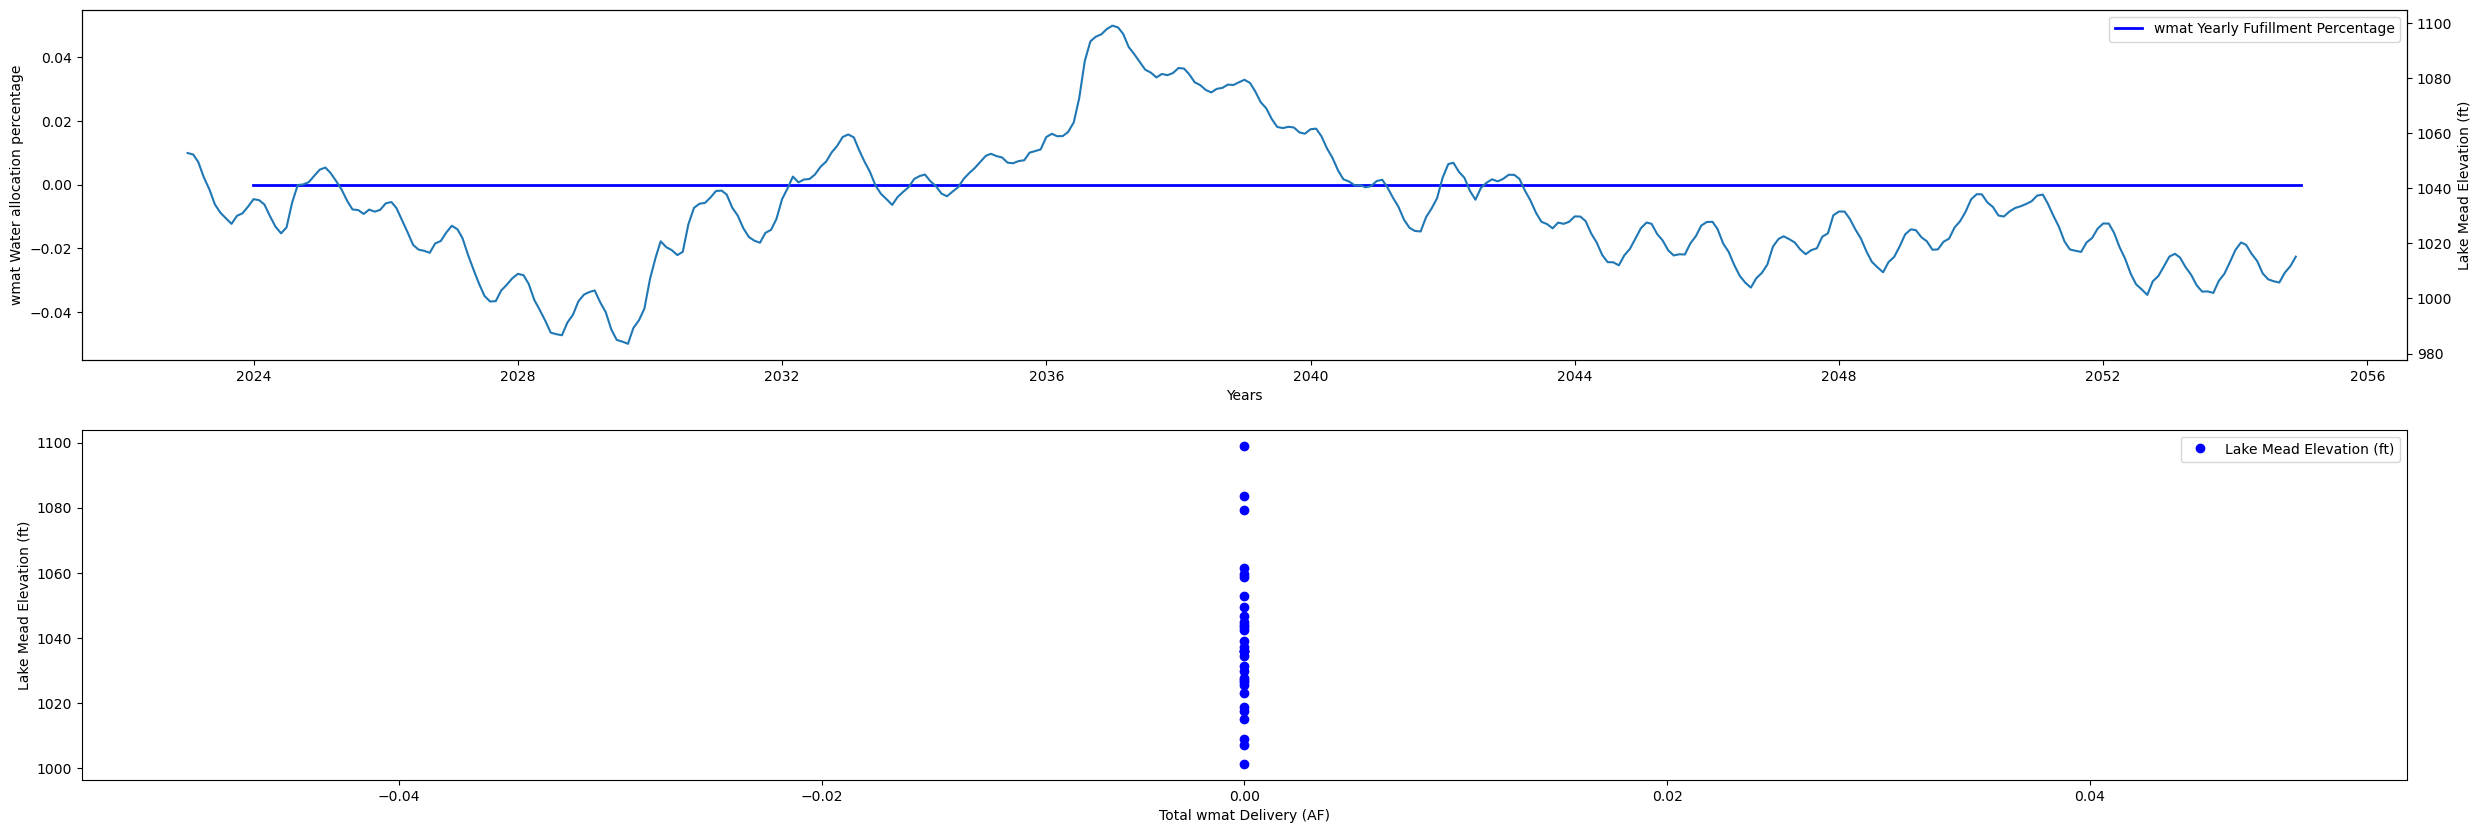

In [ ]:

# results hdf5 file location from CALFEWS simulations
#output_file = 'Jeff_results/'+str(i)+'/results.hdf5'
#fig_folder = 'Jeff_results/'+str(i)+'/figs/'# this code was taken out of a for loop, in order to run, put back in for loop
# now load simulation output
datDaily = get_results_sensitivity_number_outside_model(output_file, '')

## Uncomment line below to see a List all time series names
#datDaily        

inputData=pd.read_csv('calfews_src/data/input/cap-data-crss-1.csv', index_col=0, parse_dates=True)
datDaily.index = inputData.index
# Resample daily data to yearly data
datYearly = datDaily.resample('Y').sum()
# Getting August Mead Elevation values
augustMeadElevation = [1061, ]
for index, row in datDaily.iterrows():
    if index.month == 8:
        augustMeadElevation.append(row['mead_elevation'])
augustMeadElevation.pop()
datFOY = datDaily.resample('Y').first()
# Plotting Akchin water allocation percentage
# List the districts to plot
districts =['akchin','asarco','awba','asld','azwc','cagrd','caidd','chandler','epcor','fmyn','gilbert','glendale','goodyear','gric','hidd','hvid','mesa','msidd','mwd','orovalley','other','peoria','phoenix','scat','scottsdale','srpmic','surprise','tempe','tohono','tucson','wmat']
for district in districts:
    fig, ax = plt.subplots(2, figsize=(30,10))
    totalAkchinDelivery = datYearly[district + '_PTR'] + datYearly[district + '_MUI'] + datYearly[district + '_FED'] + datYearly[district + '_NIA']+datYearly[district+'_EXCESS'] 
    ax2 = ax[0].twinx()
    ax2.plot(datDaily['mead_elevation'])
    ax2.set_ylabel('Lake Mead Elevation (ft)', color='black')

    ax[0].plot(totalAkchinDelivery, label=district+' Yearly Fufillment Percentage', color='blue', linewidth=2.0)
    ax[0].legend()
    ax[0].set_xlabel('Years')
    ax[0].set_ylabel(district + ' Water allocation percentage')
    t = plt.xticks(rotation=315)

    ax[1].plot(totalAkchinDelivery, datFOY['mead_elevation'], marker='o', label='Lake Mead Elevation (ft)', color='blue', linewidth=0.0)
    ax[1].legend()
    ax[1].set_xlabel('Total ' + district + ' Delivery (AF)')
    ax[1].set_ylabel('Lake Mead Elevation (ft)')
    t = plt.xticks(rotation=315)
    plt.show()
    plt.close()

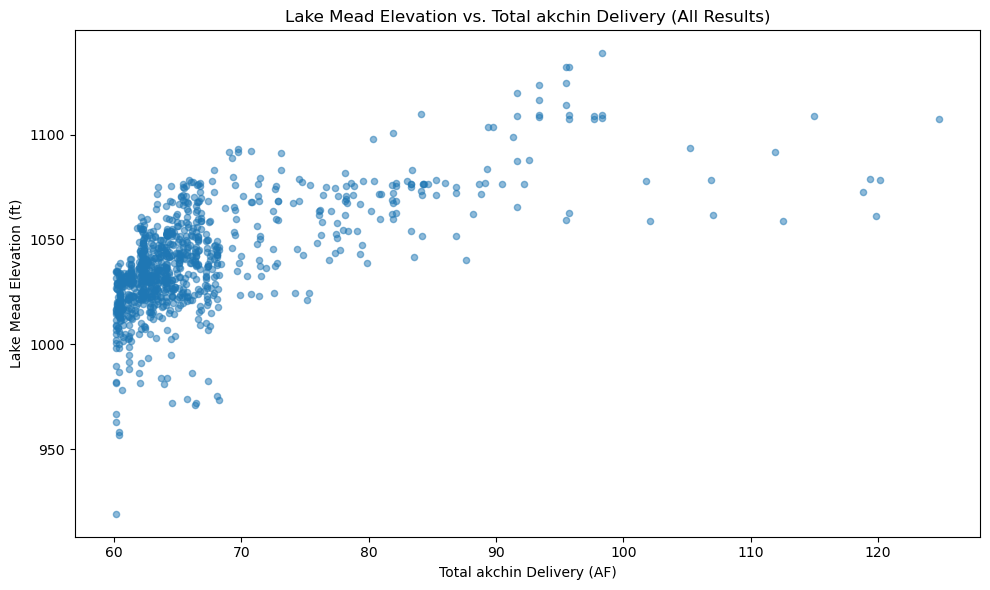

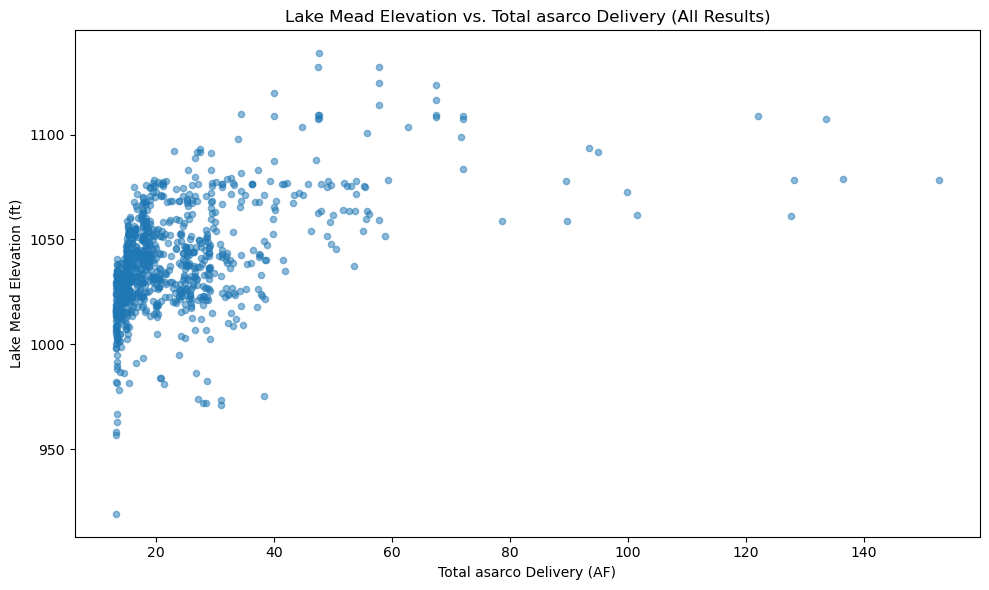

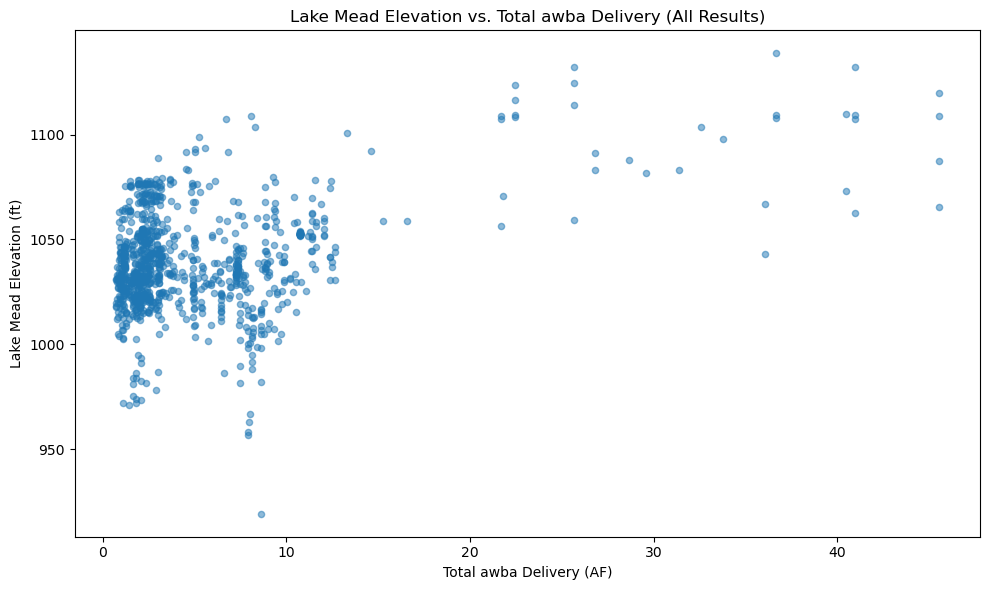

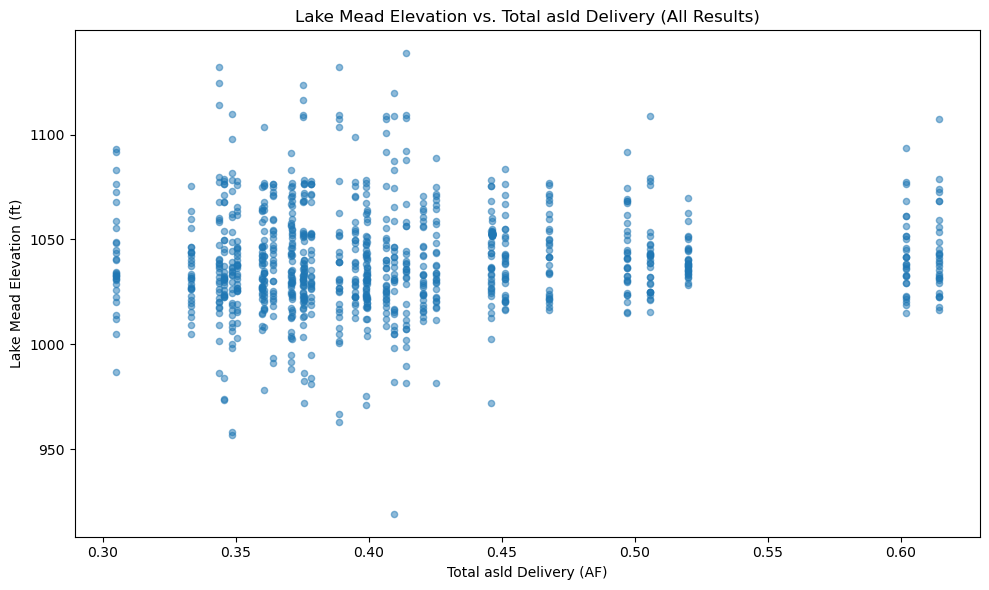

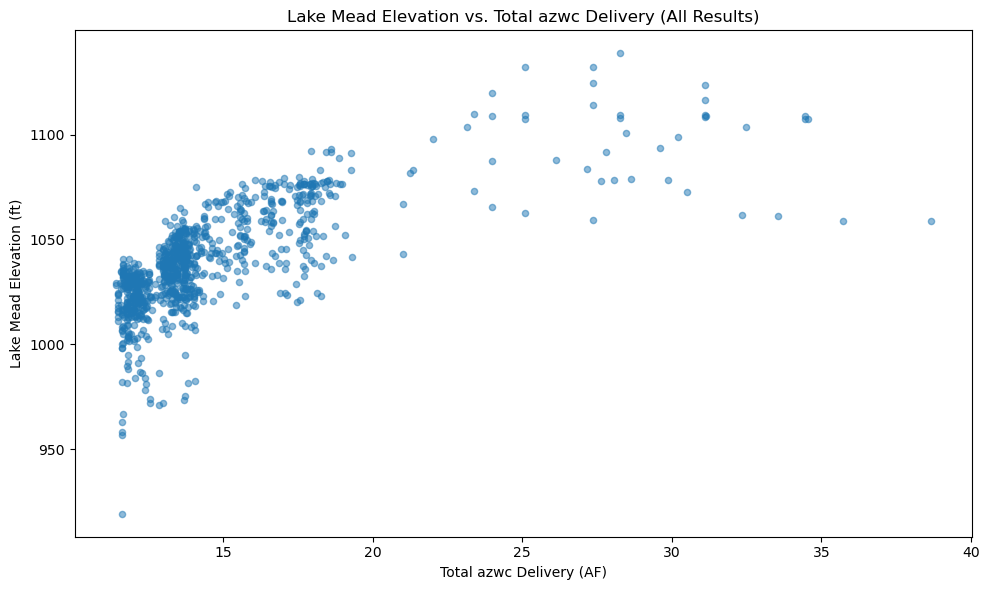

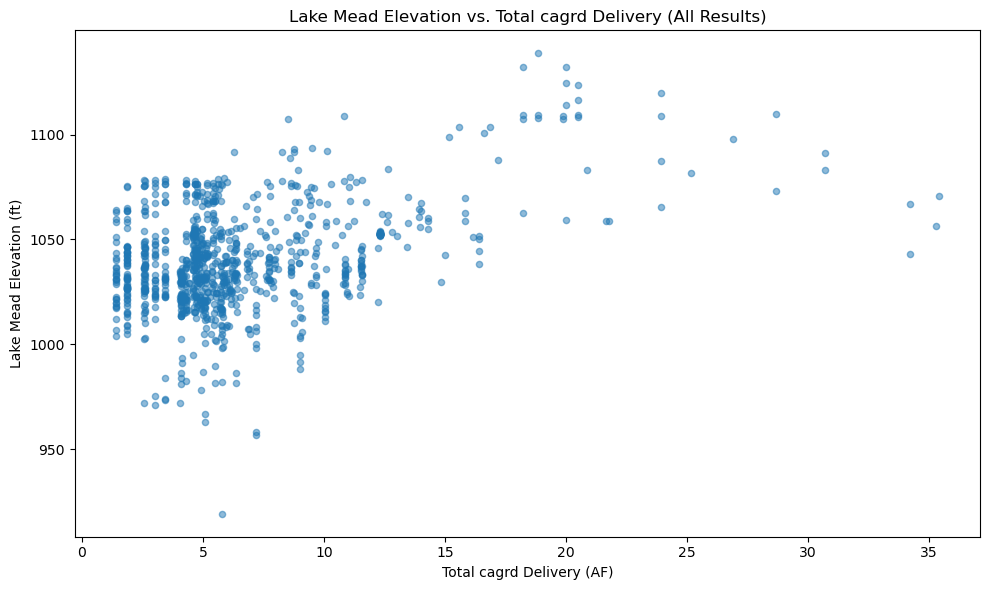

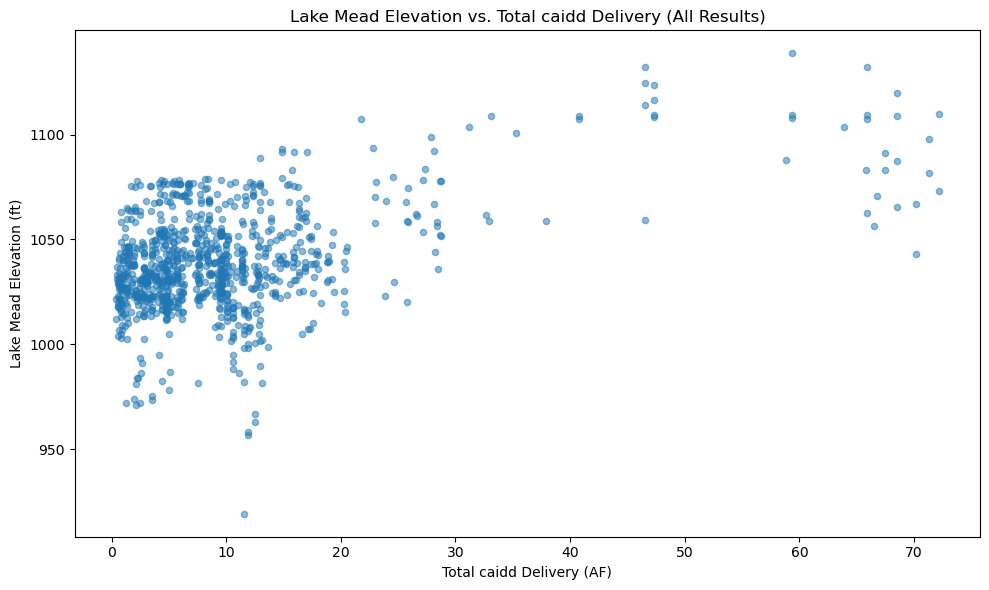

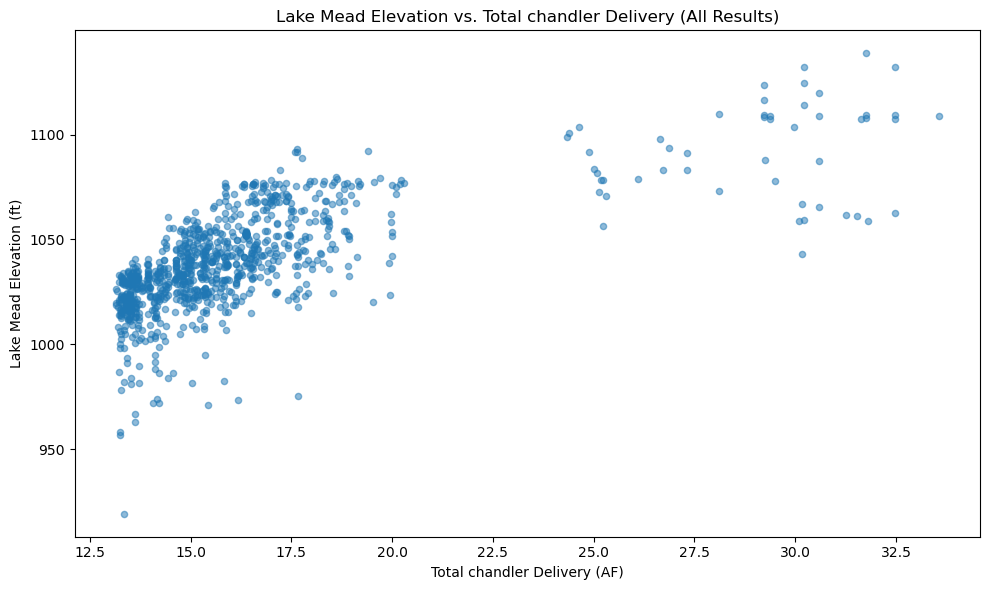

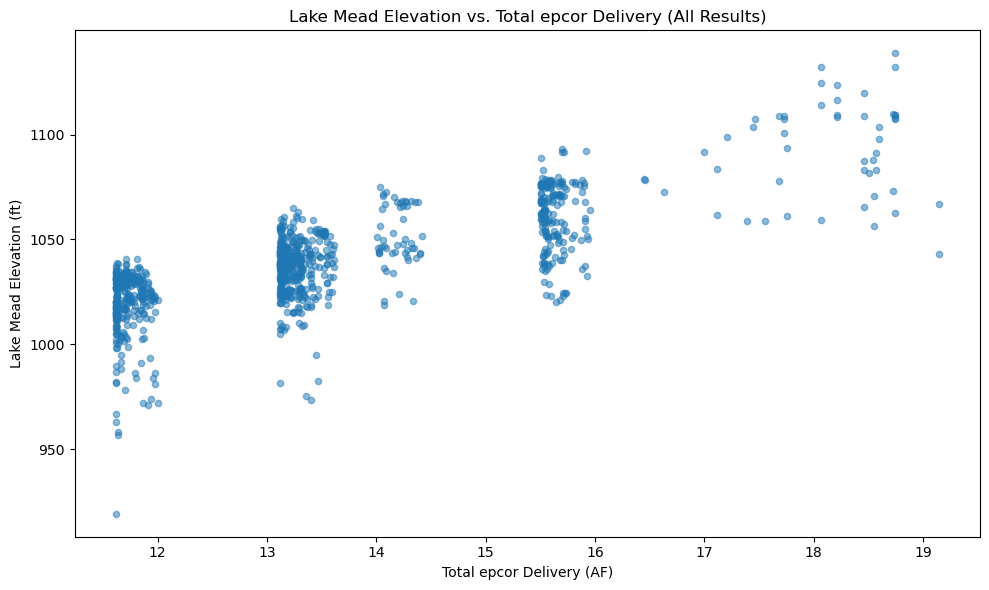

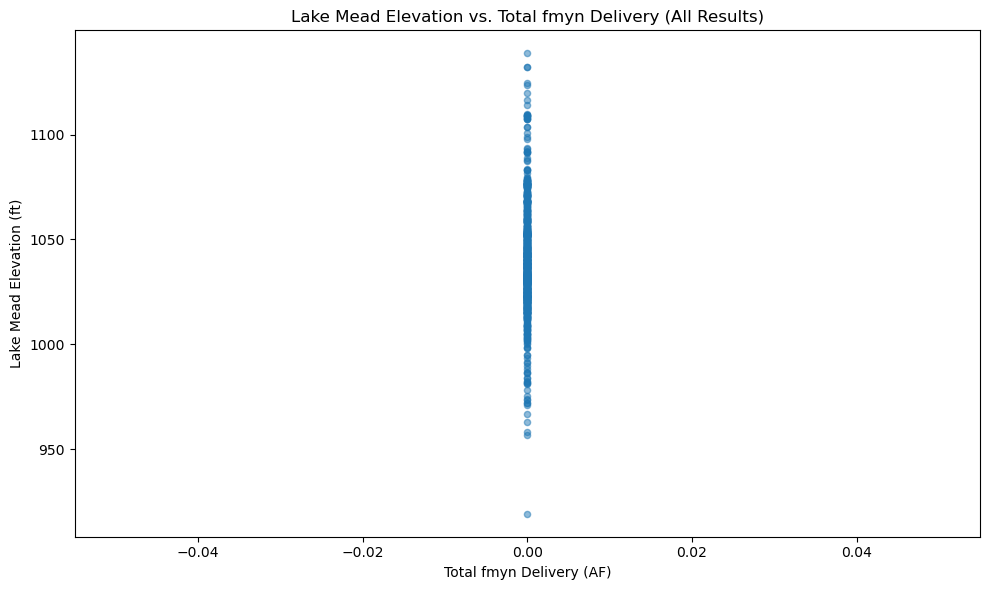

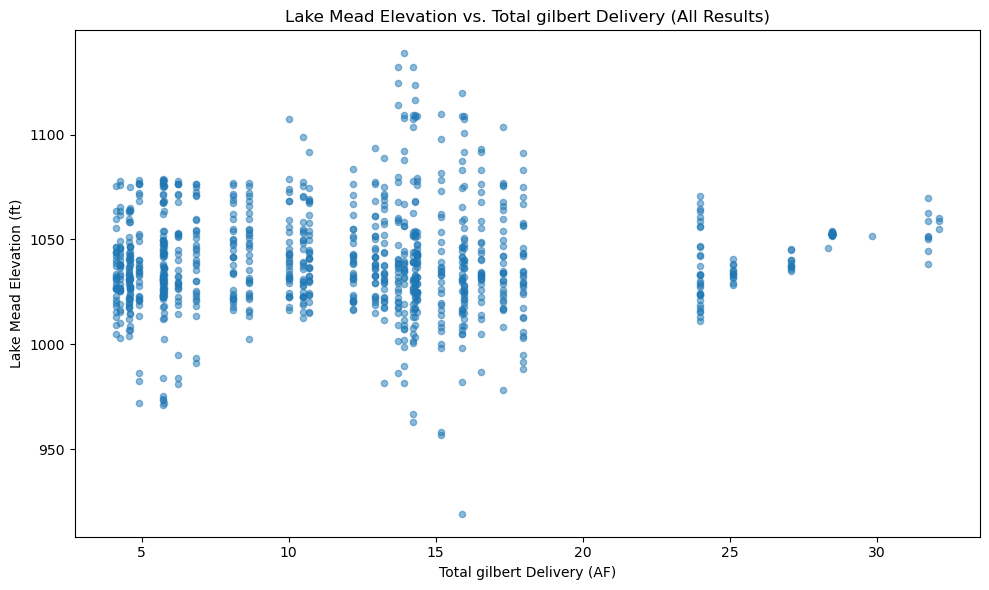

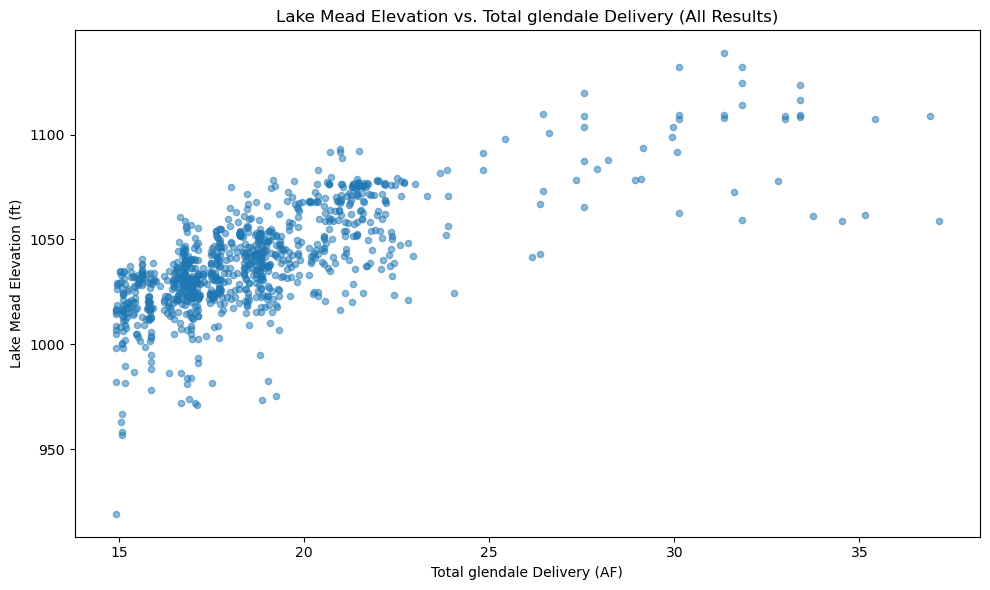

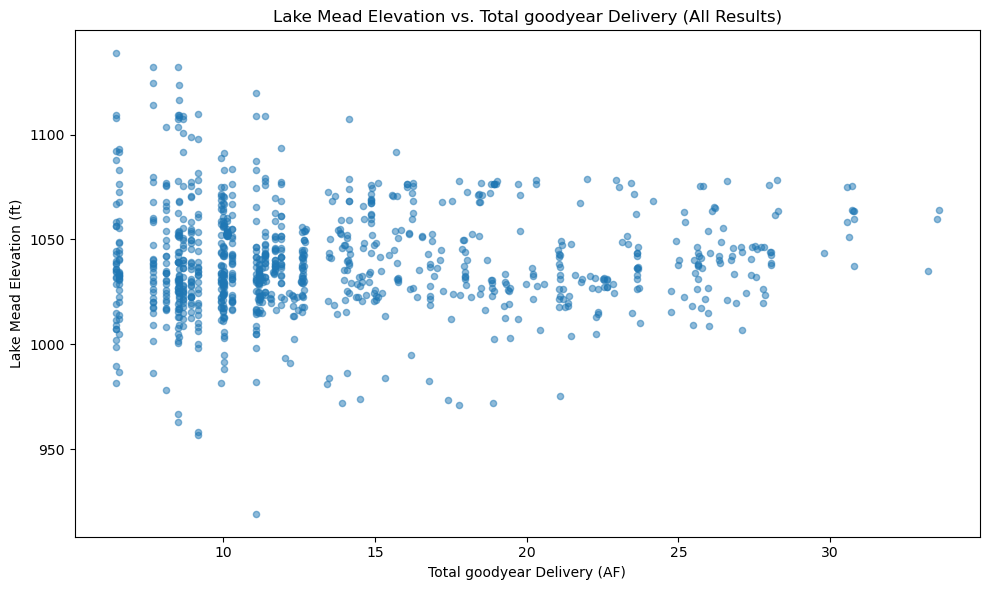

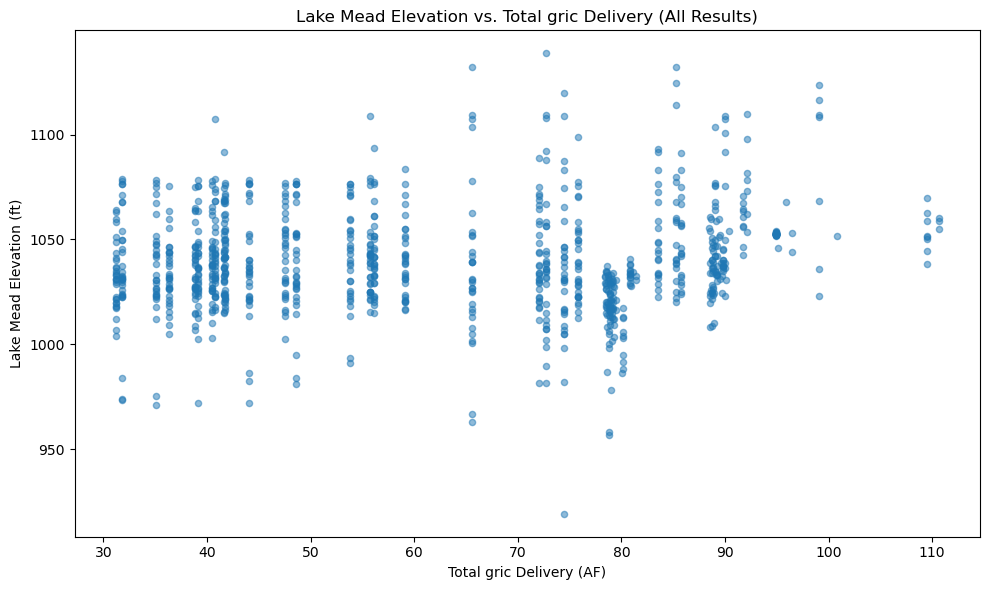

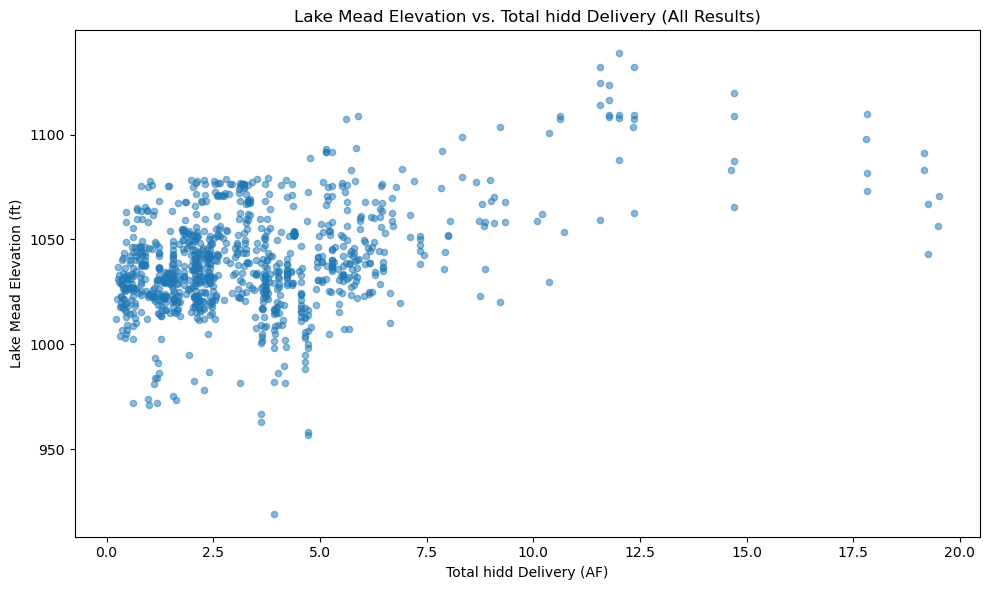

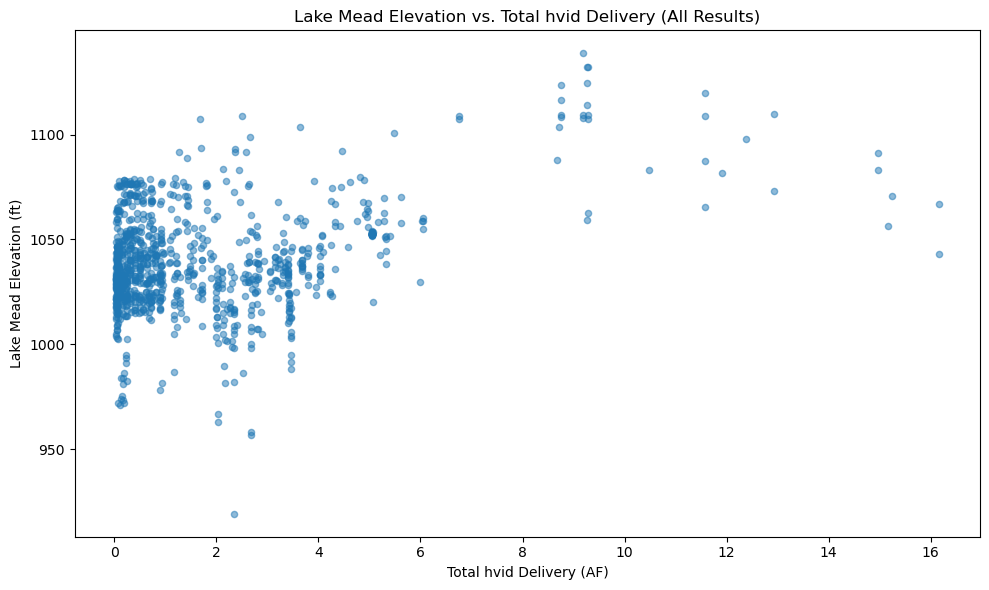

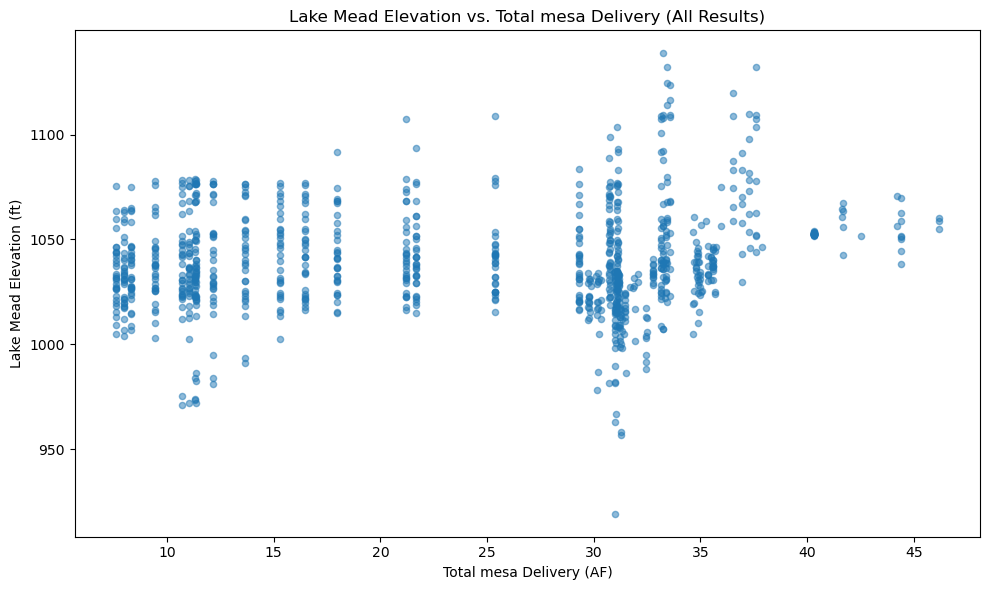

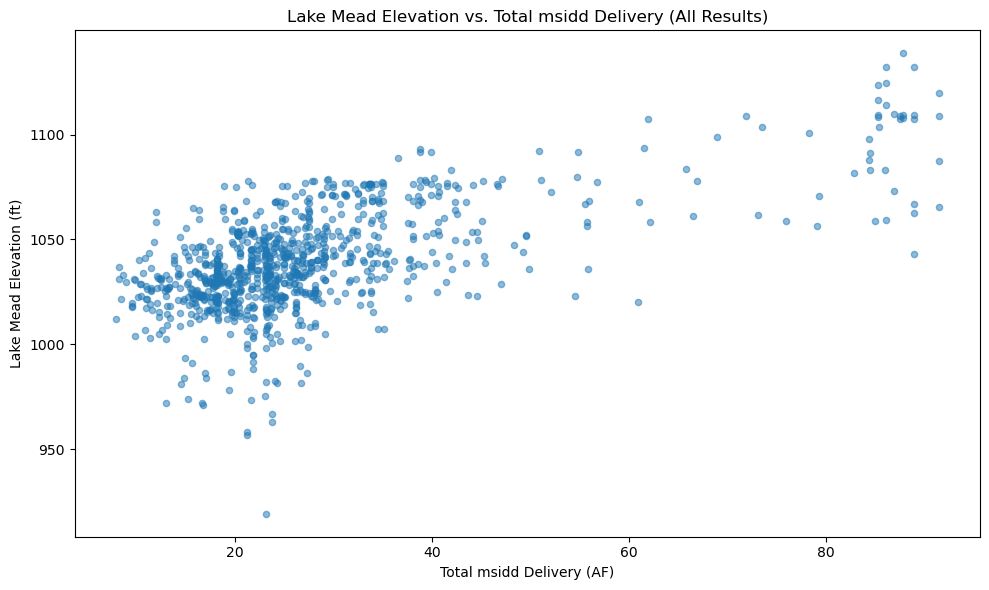

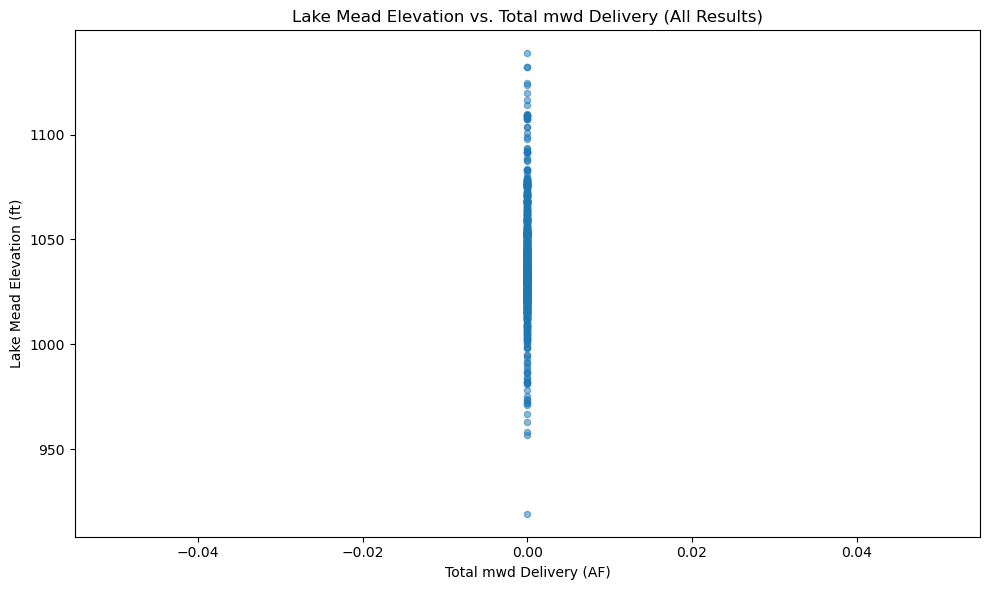

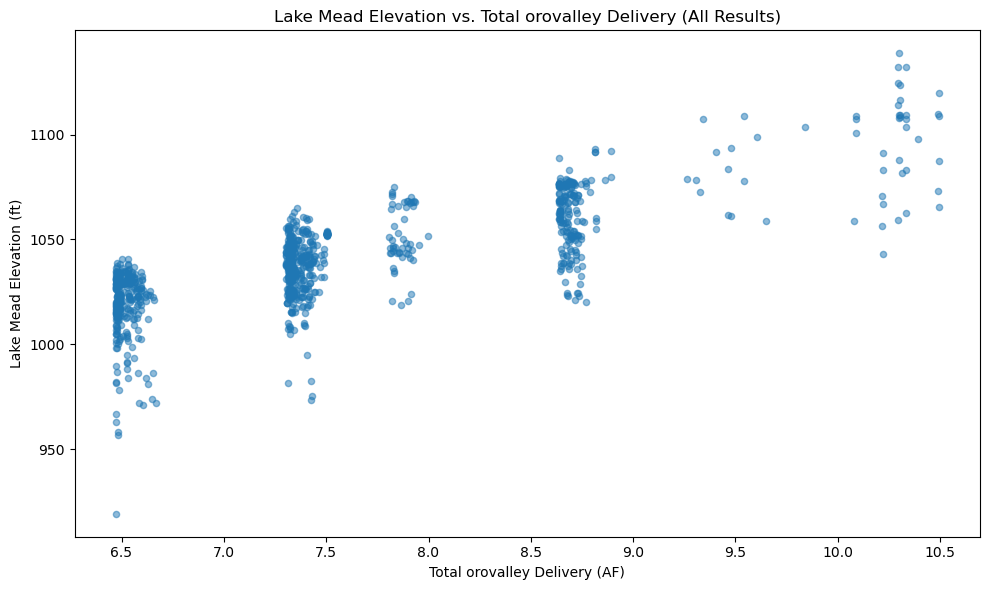

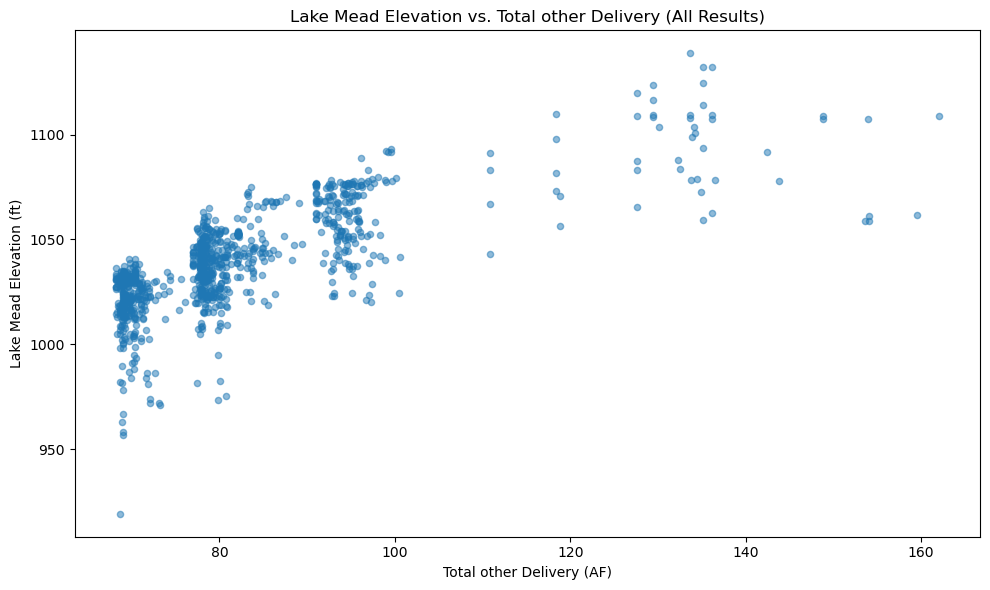

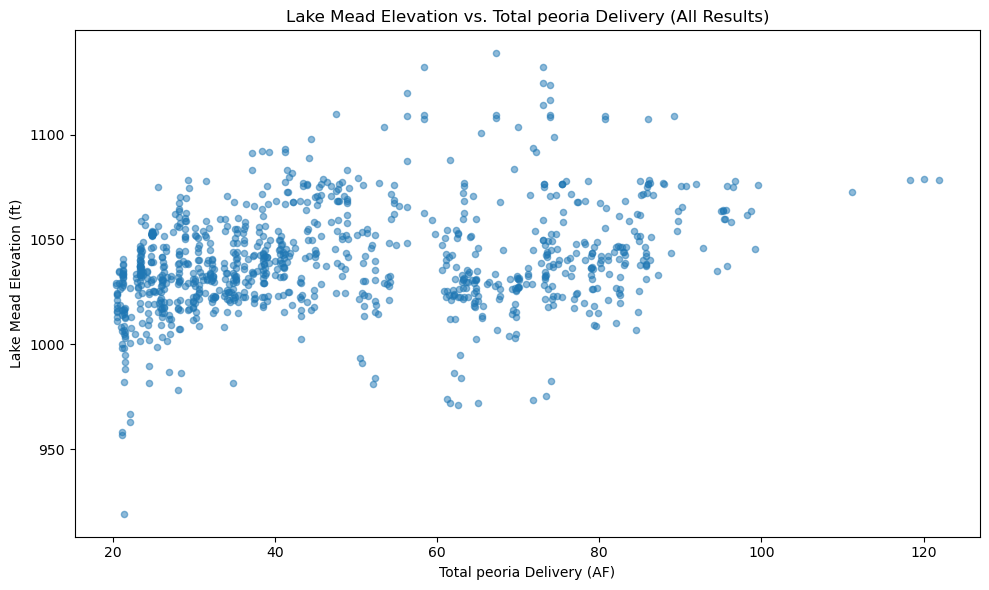

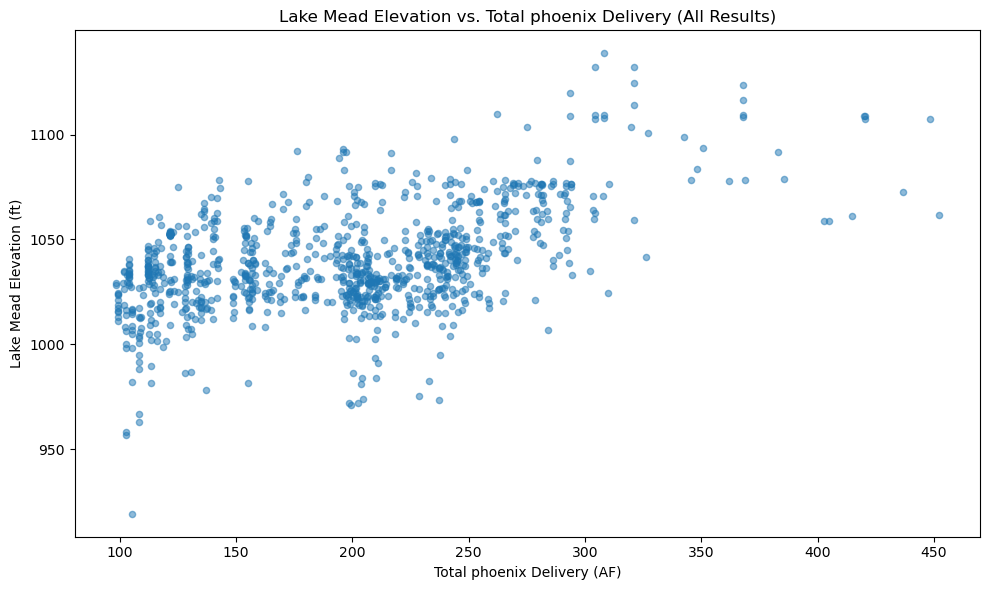

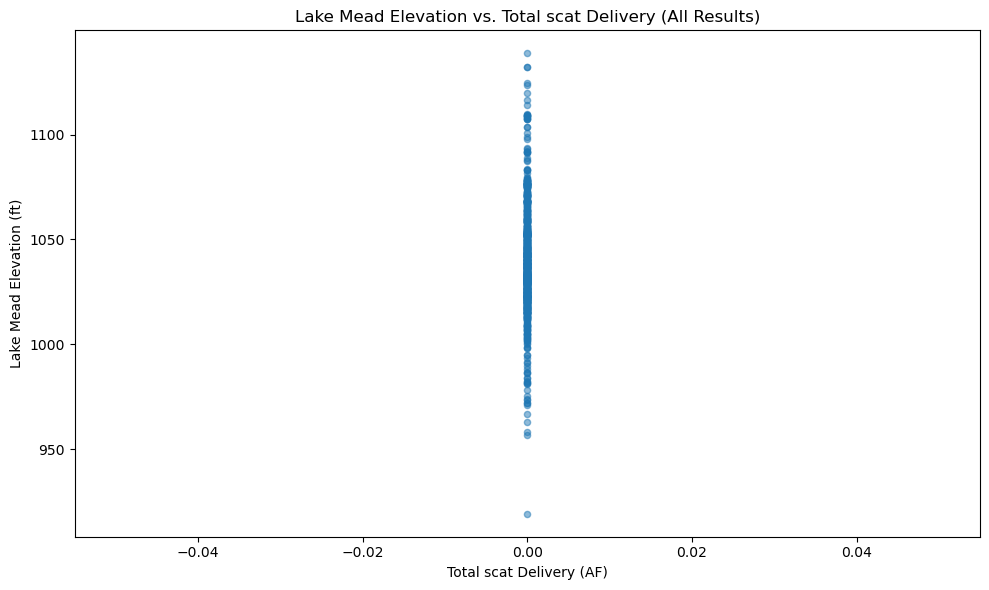

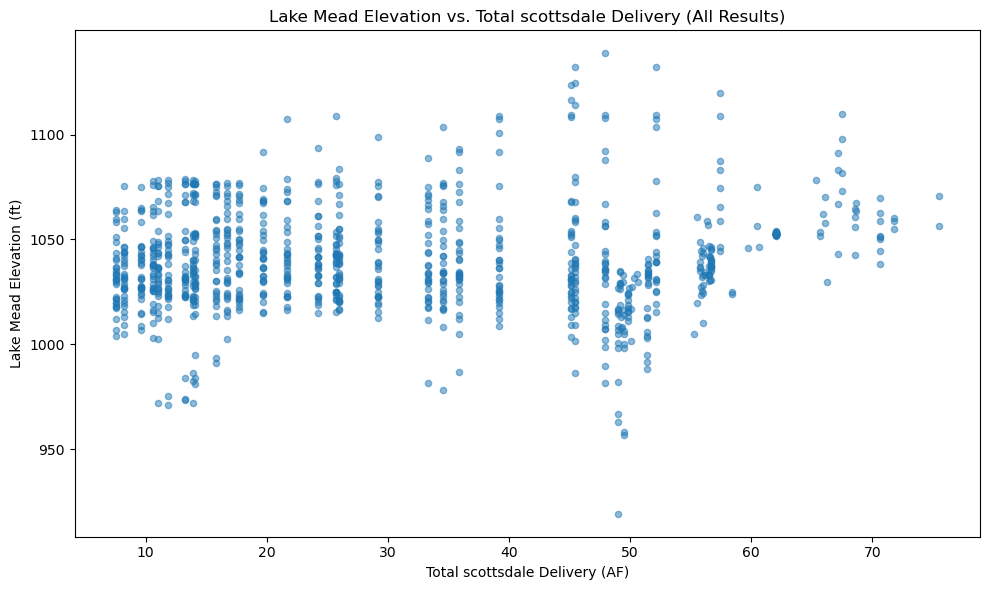

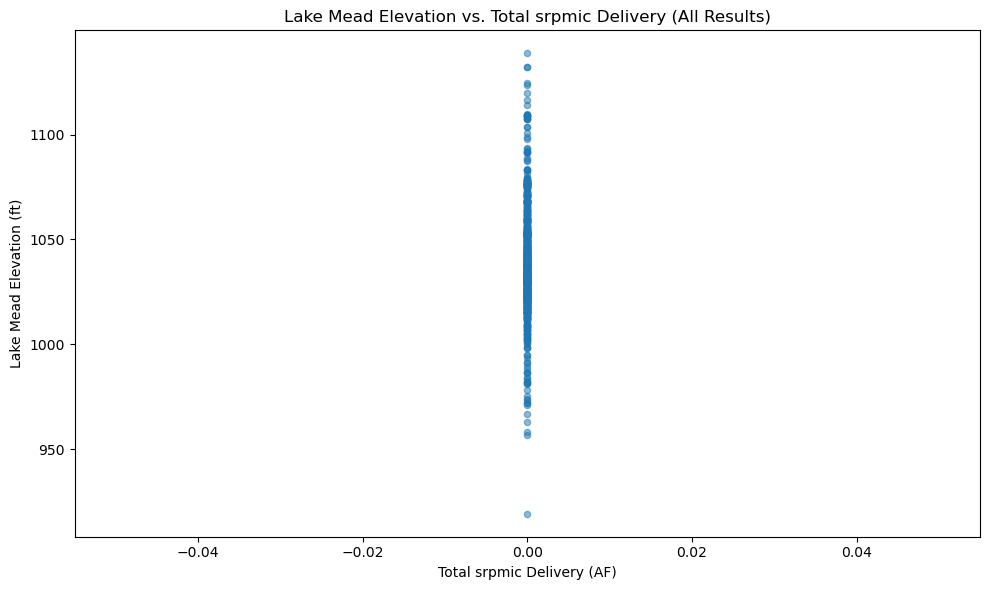

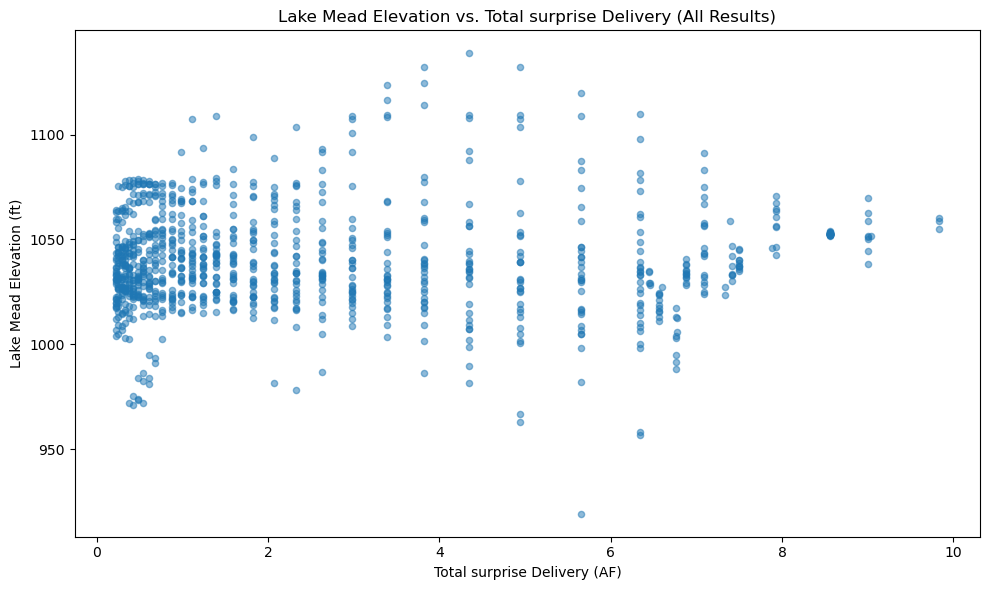

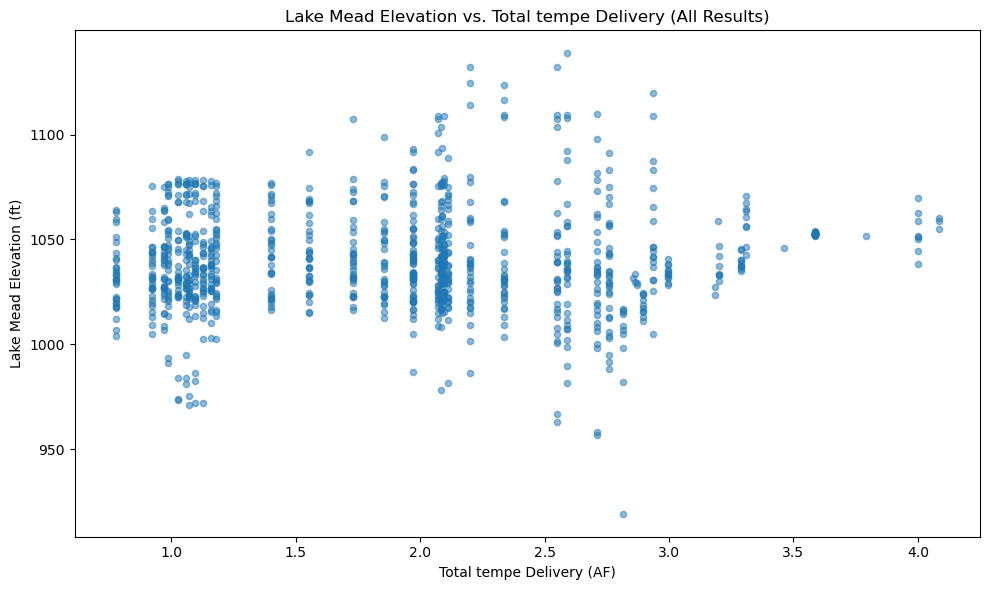

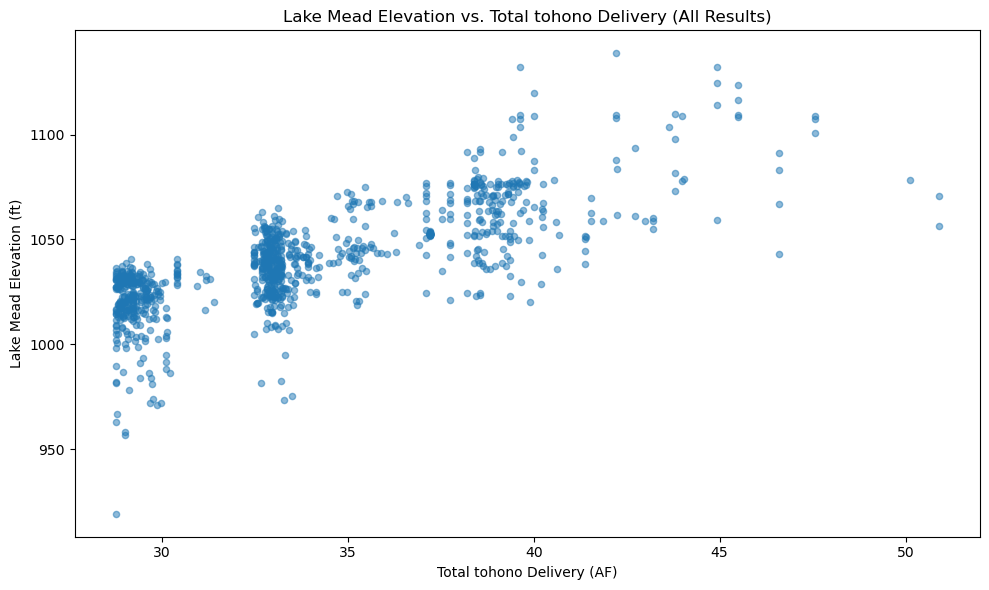

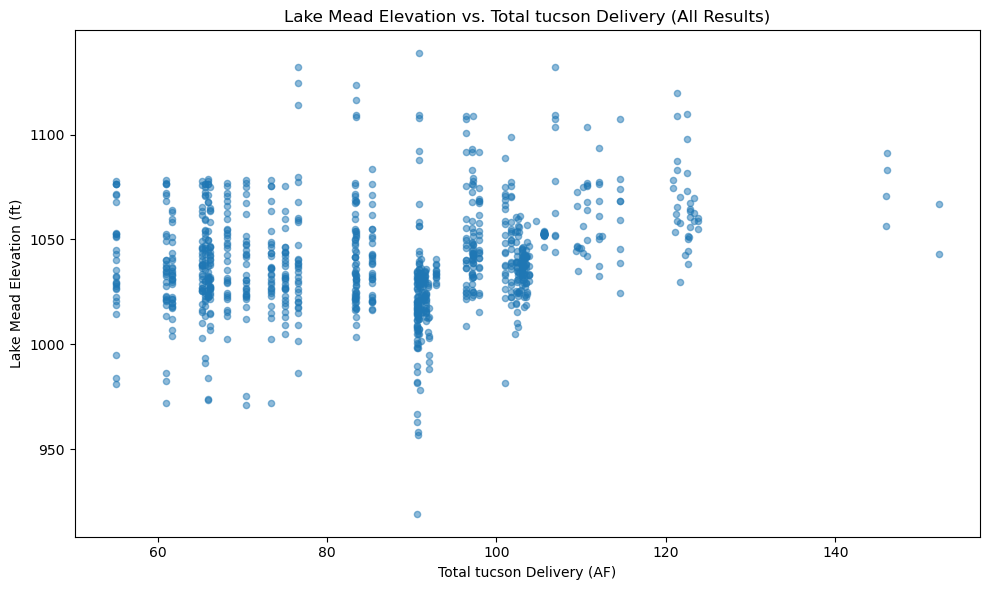

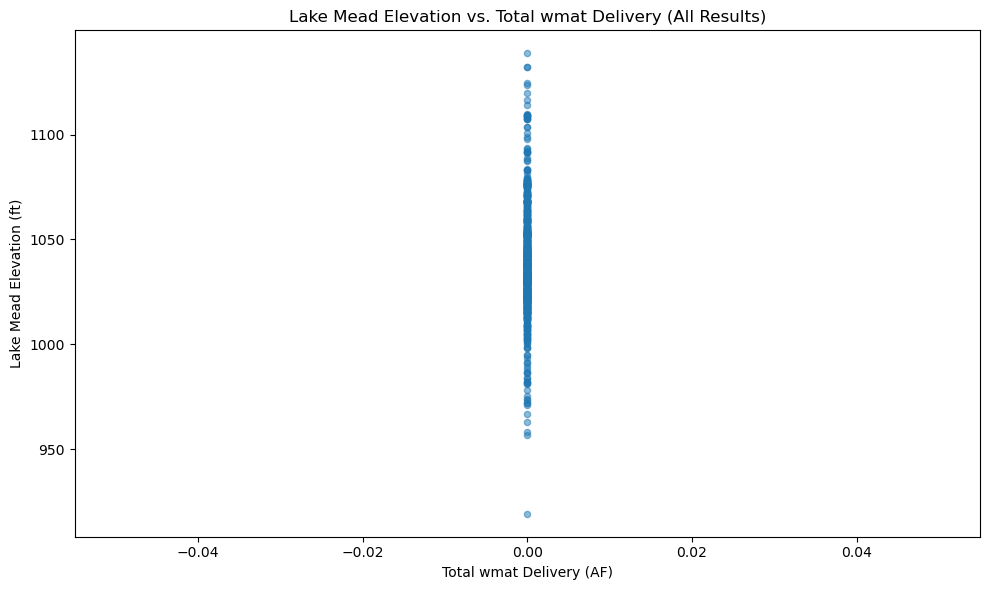

In [12]:
districts =['akchin','asarco','awba','asld','azwc','cagrd','caidd','chandler','epcor','fmyn','gilbert','glendale','goodyear','gric','hidd','hvid','mesa','msidd','mwd','orovalley','other','peoria','phoenix','scat','scottsdale','srpmic','surprise','tempe','tohono','tucson','wmat']

# Prepare a dictionary to collect points for each district
district_points = {district: {'delivery': [], 'mead': []} for district in districts}

for i in range(1, 32):
    output_file = f'Jeff_results/{i}/results.hdf5'
    datDaily = get_results_sensitivity_number_outside_model(output_file, '')
    inputData = pd.read_csv('calfews_src/data/input/cap-data-crss-1.csv', index_col=0, parse_dates=True)
    datDaily.index = inputData.index
    datYearly = datDaily.resample('Y').sum()
    datFOY = datDaily.resample('Y').first()

    for district in districts:
        totalDelivery = (
            datYearly[district + '_PTR'] + datYearly[district + '_MUI'] + datYearly[district + '_FED'] + datYearly[district + '_NIA']+datYearly[district + '_EXCESS']
        )
        # Store the points for this district
        district_points[district]['delivery'].extend(totalDelivery.values)
        district_points[district]['mead'].extend(datFOY['mead_elevation'].values)

# Now plot one scatterplot per district, with all points from all result files
for district in districts:
    plt.figure(figsize=(10, 6))
    plt.scatter(district_points[district]['delivery'], district_points[district]['mead'], alpha=0.5, s=20)
    plt.xlabel(f'Total {district} Delivery (AF)')
    plt.ylabel('Lake Mead Elevation (ft)')
    plt.title(f'Lake Mead Elevation vs. Total {district} Delivery (All Results)')
    plt.tight_layout()
    plt.show()

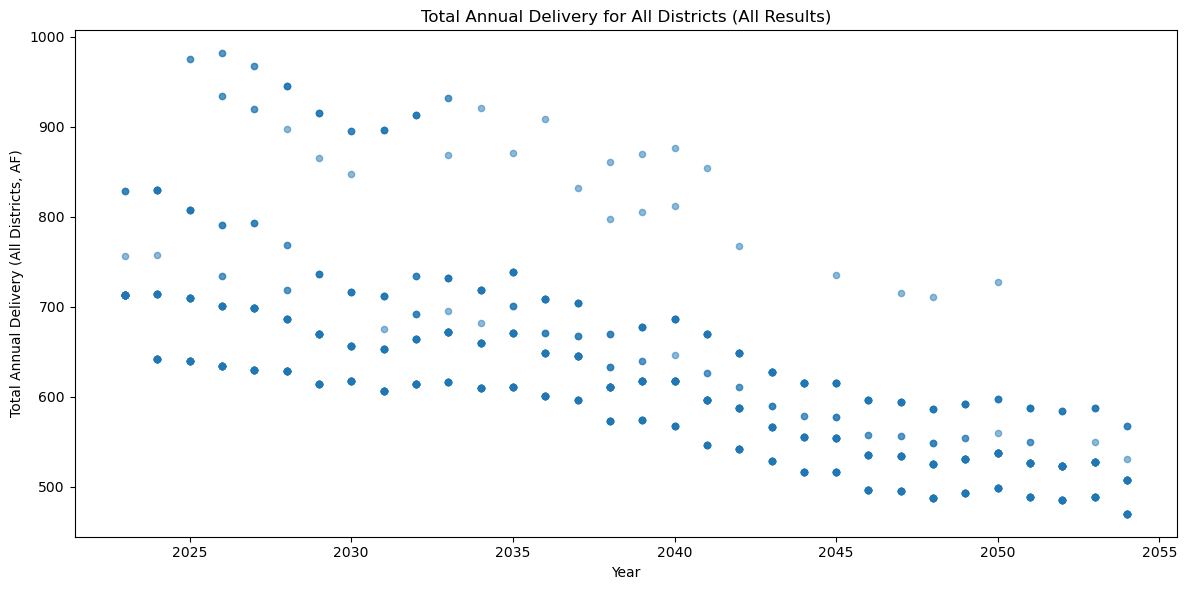

In [14]:
districts = ['akchin','asarco','awba','asld','azwc','cagrd','caidd','chandler','epcor','fmyn','gilbert','glendale','goodyear','gric','hidd','hvid','mesa','msidd','mwd','orovalley','other','peoria','phoenix','scat','scottsdale','srpmic','surprise','tempe','tohono','tucson','wmat']

years_all = []
total_deliveries_all = []

for i in range(1, 32):
    output_file = f'Jeff_results/{i}/results.hdf5'
    datDaily = get_results_sensitivity_number_outside_model(output_file, '')
    inputData = pd.read_csv('calfews_src/data/input/cap-data-crss-1.csv', index_col=0, parse_dates=True)
    datDaily.index = inputData.index

    datYearly = datDaily.resample('Y').sum()

    # Calculate total delivery for all districts for each year
    total_delivery = pd.Series(0, index=datYearly.index)
    for district in districts:
        total_delivery += (
            datYearly[district + '_PTR'] +
            datYearly[district + '_MUI'] +
            datYearly[district + '_FED'] +
            datYearly[district + '_NIA']
        )
    # Store the years and total deliveries
    years_all.extend(datYearly.index.year)
    total_deliveries_all.extend(total_delivery.values)

# Plot: x = year, y = total delivery (all districts)
plt.figure(figsize=(12, 6))
plt.scatter(years_all, total_deliveries_all, alpha=0.5, s=20)
plt.xlabel('Year')
plt.ylabel('Total Annual Delivery (All Districts, AF)')
plt.title('Total Annual Delivery for All Districts (All Results)')
plt.tight_layout()
plt.show()

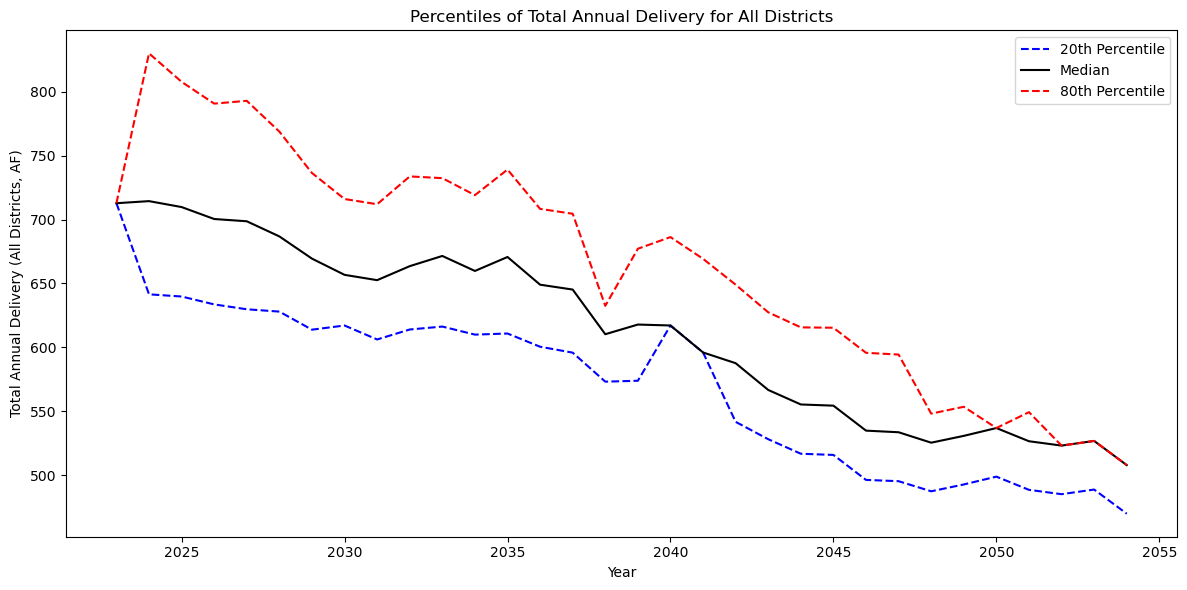

In [13]:
districts = ['akchin','asarco','awba','asld','azwc','cagrd','caidd','chandler','epcor','fmyn','gilbert','glendale','goodyear','gric','hidd','hvid','mesa','msidd','mwd','orovalley','other','peoria','phoenix','scat','scottsdale','srpmic','surprise','tempe','tohono','tucson','wmat']

# Dictionary to collect deliveries per year
deliveries_by_year = {}

for i in range(1, 32):
    output_file = f'Jeff_results/{i}/results.hdf5'
    datDaily = get_results_sensitivity_number_outside_model(output_file, '')
    inputData = pd.read_csv('calfews_src/data/input/cap-data-crss-1.csv', index_col=0, parse_dates=True)
    datDaily.index = inputData.index

    datYearly = datDaily.resample('Y').sum()

    # Calculate total delivery for all districts for each year
    total_delivery = pd.Series(0, index=datYearly.index)
    for district in districts:
        total_delivery += (
            datYearly[district + '_PTR'] +
            datYearly[district + '_MUI'] +
            datYearly[district + '_FED'] +
            datYearly[district + '_NIA']
        )
    for year, value in zip(datYearly.index.year, total_delivery.values):
        deliveries_by_year.setdefault(year, []).append(value)

# Prepare lists for plotting
years_sorted = sorted(deliveries_by_year.keys())
p20 = []
p50 = []
p80 = []

for year in years_sorted:
    vals = deliveries_by_year[year]
    p20.append(np.percentile(vals, 20))
    p50.append(np.percentile(vals, 50))
    p80.append(np.percentile(vals, 80))

plt.figure(figsize=(12, 6))
plt.plot(years_sorted, p20, label='20th Percentile', color='blue', linestyle='--')
plt.plot(years_sorted, p50, label='Median', color='black', linestyle='-')
plt.plot(years_sorted, p80, label='80th Percentile', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Annual Delivery (All Districts, AF)')
plt.title('Percentiles of Total Annual Delivery for All Districts')
plt.legend()
plt.tight_layout()
plt.show()